In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

In [2]:
data = data = pd.read_csv('./data/learningSet.csv')

In [3]:
data.shape

(95412, 481)

In [4]:
data

ODATEDW OSOURCE  TCODE STATE    ZIP MAILCODE PVASTATE   DOB NOEXCH  \
0         8901     GRI      0    IL  61081                    3712      0   
1         9401     BOA      1    CA  91326                    5202      0   
2         9001     AMH      1    NC  27017                       0      0   
3         8701     BRY      0    CA  95953                    2801      0   
4         8601              0    FL  33176                    2001      0   
...        ...     ...    ...   ...    ...      ...      ...   ...    ...   
95407     9601     ASE      1    AK  99504                       0      0   
95408     9601     DCD      1    TX  77379                    5001      0   
95409     9501     MBC      1    MI  48910                    3801      0   
95410     8601     PRV      0    CA  91320                    4005      0   
95411     8801     MCC      2    NC  28409                    1801      0   

      RECINHSE  ... TARGET_D HPHONE_D RFA_2R RFA_2F RFA_2A MDMAUD_R  MDMAUD_F  \
0               ...      0.0        0      L      4      E        X         X   
1               ...      0.0        0      L      2      G        X         X   
2               ...      0.0        1      L      4      E        X         X   
3               ...      0.0        1      L      4      E        X         X   
4            X  ...      0.0        1      L      2      F        X         X   
...        ...  ...      ...      ...    ...    ...    ...      ...       ...   
95407           ...      0.0        0      L      1      G        X         X   
95408           ...      0.0        1      L      1      F        X         X   
95409           ...      0.0        1      L      3      E        X         X   
95410        X  ...     18.0        1      L      4      F        X         X   
95411        X  ...      0.0        1      L      1      G        C         1   

      MDMAUD_A CLUSTER2 GEOCODE2  
0            X     39.0        C  
1            X      1.0        A  
2            X     60.0        C  
3            X     41.0        C  
4            X     26.0        A  
...        ...      ...      ...  
95407        X     12.0        C  
95408        X      2.0        A  
95409        X     34.0        B  
95410        X     11.0        A  
95411        C     12.0        C  

[95412 rows x 481 columns]

In [5]:
data.describe()

ODATEDW         TCODE           DOB           AGE       NUMCHLD  \
count  95412.000000  95412.000000  95412.000000  71747.000000  12386.000000   
mean    9141.363256     54.223117   2723.602933     61.611649      1.527773   
std      343.454752    953.844476   2132.241295     16.664199      0.806861   
min     8306.000000      0.000000      0.000000      1.000000      1.000000   
25%     8801.000000      0.000000    201.000000     48.000000      1.000000   
50%     9201.000000      1.000000   2610.000000     62.000000      1.000000   
75%     9501.000000      2.000000   4601.000000     75.000000      2.000000   
max     9701.000000  72002.000000   9710.000000     98.000000      7.000000   

             INCOME       WEALTH1           HIT       MBCRAFT      MBGARDEN  \
count  74126.000000  50680.000000  95412.000000  42558.000000  42558.000000   
mean       3.886248      5.345699      3.321438      0.152075      0.059166   
std        1.854960      2.742490      9.306899      0.470023      0.262078   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      3.000000      0.000000      0.000000      0.000000   
50%        4.000000      6.000000      0.000000      0.000000      0.000000   
75%        5.000000      8.000000      3.000000      0.000000      0.000000   
max        7.000000      9.000000    241.000000      6.000000      4.000000   

       ...      FISTDATE      NEXTDATE       TIMELAG       AVGGIFT  \
count  ...  95412.000000  85439.000000  85439.000000  95412.000000   
mean   ...   9135.651648   9151.022917      8.093739     13.347786   
std    ...    320.394019    294.257260      8.213242     10.769997   
min    ...      0.000000   7211.000000      0.000000      1.285714   
25%    ...   8810.000000   8903.000000      4.000000      8.384615   
50%    ...   9201.000000   9204.000000      6.000000     11.636364   
75%    ...   9409.000000   9409.000000     11.000000     15.477955   
max    ...   9603.000000   9702.000000   1088.000000   1000.000000   

            CONTROLN      TARGET_B      TARGET_D      HPHONE_D        RFA_2F  \
count   95412.000000  95412.000000  95412.000000  95412.000000  95412.000000   
mean    95778.176959      0.050759      0.793073      0.500618      1.910053   
std     55284.596094      0.219506      4.429725      0.500002      1.072749   
min         1.000000      0.000000      0.000000      0.000000      1.000000   
25%     47910.750000      0.000000      0.000000      0.000000      1.000000   
50%     95681.500000      0.000000      0.000000      1.000000      2.000000   
75%    143643.500000      0.000000      0.000000      1.000000      3.000000   
max    191779.000000      1.000000    200.000000      1.000000      4.000000   

           CLUSTER2  
count  95280.000000  
mean      31.533711  
std       18.764614  
min        1.000000  
25%       15.000000  
50%       32.000000  
75%       49.000000  
max       62.000000  

[8 rows x 407 columns]

In [6]:
# Identify categorical columns
categorical = data.select_dtypes(include=['object']).columns

# Print out the list of categorical columns
print(categorical)

Index(['OSOURCE', 'STATE', 'ZIP', 'MAILCODE', 'PVASTATE', 'NOEXCH', 'RECINHSE',
       'RECP3', 'RECPGVG', 'RECSWEEP', 'MDMAUD', 'DOMAIN', 'CLUSTER',
       'AGEFLAG', 'HOMEOWNR', 'CHILD03', 'CHILD07', 'CHILD12', 'CHILD18',
       'GENDER', 'DATASRCE', 'SOLP3', 'SOLIH', 'MAJOR', 'GEOCODE', 'COLLECT1',
       'VETERANS', 'BIBLE', 'CATLG', 'HOMEE', 'PETS', 'CDPLAY', 'STEREO',
       'PCOWNERS', 'PHOTO', 'CRAFTS', 'FISHER', 'GARDENIN', 'BOATS', 'WALKER',
       'KIDSTUFF', 'CARDS', 'PLATES', 'LIFESRC', 'PEPSTRFL', 'RFA_2', 'RFA_3',
       'RFA_4', 'RFA_5', 'RFA_6', 'RFA_7', 'RFA_8', 'RFA_9', 'RFA_10',
       'RFA_11', 'RFA_12', 'RFA_13', 'RFA_14', 'RFA_15', 'RFA_16', 'RFA_17',
       'RFA_18', 'RFA_19', 'RFA_20', 'RFA_21', 'RFA_22', 'RFA_23', 'RFA_24',
       'RFA_2R', 'RFA_2A', 'MDMAUD_R', 'MDMAUD_F', 'MDMAUD_A', 'GEOCODE2'],
      dtype='object')


In [7]:
# Check for null values only in the categorical columns
null_values_categorical = data[categorical].isnull().sum()

# Print out the null values count for each categorical column
print(null_values_categorical)

OSOURCE       0
STATE         0
ZIP           0
MAILCODE      0
PVASTATE      0
           ... 
RFA_2A        0
MDMAUD_R      0
MDMAUD_F      0
MDMAUD_A      0
GEOCODE2    132
Length: 74, dtype: int64


In [8]:
# Define the variables to exclude
exclude_variables = ['OSOURCE', 'ZIP CODE']

# Create a new empty list called drop_list
drop_list = []

# Append variables to drop_list if they are in categorical columns and not in the exclude list
for col in categorical:
    if col not in exclude_variables:
        drop_list.append(col)

# Print out the columns to be dropped
print(drop_list)

['STATE', 'ZIP', 'MAILCODE', 'PVASTATE', 'NOEXCH', 'RECINHSE', 'RECP3', 'RECPGVG', 'RECSWEEP', 'MDMAUD', 'DOMAIN', 'CLUSTER', 'AGEFLAG', 'HOMEOWNR', 'CHILD03', 'CHILD07', 'CHILD12', 'CHILD18', 'GENDER', 'DATASRCE', 'SOLP3', 'SOLIH', 'MAJOR', 'GEOCODE', 'COLLECT1', 'VETERANS', 'BIBLE', 'CATLG', 'HOMEE', 'PETS', 'CDPLAY', 'STEREO', 'PCOWNERS', 'PHOTO', 'CRAFTS', 'FISHER', 'GARDENIN', 'BOATS', 'WALKER', 'KIDSTUFF', 'CARDS', 'PLATES', 'LIFESRC', 'PEPSTRFL', 'RFA_2', 'RFA_3', 'RFA_4', 'RFA_5', 'RFA_6', 'RFA_7', 'RFA_8', 'RFA_9', 'RFA_10', 'RFA_11', 'RFA_12', 'RFA_13', 'RFA_14', 'RFA_15', 'RFA_16', 'RFA_17', 'RFA_18', 'RFA_19', 'RFA_20', 'RFA_21', 'RFA_22', 'RFA_23', 'RFA_24', 'RFA_2R', 'RFA_2A', 'MDMAUD_R', 'MDMAUD_F', 'MDMAUD_A', 'GEOCODE2']


In [9]:
# Calculate the percentage of null values for each categorical column
nulls_categorical = pd.DataFrame(null_values_categorical * 100 / len(data), columns=['percentage'])

# Sort the categorical columns by the percentage of null values in descending order
nulls_categorical = nulls_categorical.sort_values(by='percentage', ascending=False)

# Display the top 50 categorical columns with the highest percentage of null values
print(nulls_categorical.head(50))

          percentage
GEOCODE2    0.138347
RFA_12      0.000000
RFA_10      0.000000
RFA_9       0.000000
RFA_8       0.000000
RFA_7       0.000000
RFA_6       0.000000
RFA_5       0.000000
RFA_4       0.000000
RFA_3       0.000000
RFA_2       0.000000
PEPSTRFL    0.000000
LIFESRC     0.000000
PLATES      0.000000
CARDS       0.000000
KIDSTUFF    0.000000
WALKER      0.000000
RFA_11      0.000000
RFA_13      0.000000
STATE       0.000000
RFA_14      0.000000
MDMAUD_A    0.000000
MDMAUD_F    0.000000
MDMAUD_R    0.000000
RFA_2A      0.000000
RFA_2R      0.000000
RFA_24      0.000000
RFA_23      0.000000
RFA_22      0.000000
RFA_21      0.000000
RFA_20      0.000000
RFA_19      0.000000
RFA_18      0.000000
RFA_17      0.000000
RFA_16      0.000000
RFA_15      0.000000
BOATS       0.000000
OSOURCE     0.000000
FISHER      0.000000
CRAFTS      0.000000
CHILD07     0.000000
CHILD03     0.000000
HOMEOWNR    0.000000
AGEFLAG     0.000000
CLUSTER     0.000000
DOMAIN      0.000000
MDMAUD      0

In [10]:
# Check the shape of the dataframe after dropping columns
print("Shape of the dataframe after dropping columns:", data.shape)

Shape of the dataframe after dropping columns: (95412, 481)


In [11]:
data['GENDER'].value_counts()

GENDER
F    51277
M    39094
      2957
U     1715
J      365
C        2
A        2
Name: count, dtype: int64

In [12]:
data['GENDER'].value_counts()
data['GENDER'] = data['GENDER'].fillna('F')

In [13]:
# Replace all gender categories other than "M" and "F" with "other"
data['GENDER'] = data['GENDER'].apply(lambda x: 'other' if x not in ['M', 'F'] else x)

In [14]:
data['GENDER'].value_counts()

GENDER
F        51277
M        39094
other     5041
Name: count, dtype: int64

# lab Feature engineering

In [15]:
#select numerical columns
numerical = data.select_dtypes(include=['float64', 'int64'])

In [16]:
#check for nulls in numerical columns
numerical_nulls = numerical.isnull().sum()
print(numerical_nulls)

ODATEDW         0
TCODE           0
DOB             0
AGE         23665
NUMCHLD     83026
            ...  
TARGET_B        0
TARGET_D        0
HPHONE_D        0
RFA_2F          0
CLUSTER2      132
Length: 407, dtype: int64


In [17]:
# Calculate the median of the 'age' column
median_age = data['AGE'].median()

# Replace null values in the 'age' column with the median
data['AGE'].fillna(median_age, inplace=True)

In [18]:
data['AGE'].value_counts()

AGE
62.0    25136
50.0     1930
76.0     1885
72.0     1813
68.0     1809
        ...  
8.0         1
9.0         1
10.0        1
6.0         1
15.0        1
Name: count, Length: 96, dtype: int64

In [19]:
data['CLUSTER2'].value_counts()

CLUSTER2
13.0    3466
5.0     3154
57.0    2666
59.0    2653
15.0    2559
        ... 
30.0     647
46.0     644
29.0     569
40.0     369
6.0      211
Name: count, Length: 62, dtype: int64

In [20]:
data['NUMCHLD'].value_counts()

NUMCHLD
1.0    7792
2.0    3110
3.0    1101
4.0     316
5.0      59
6.0       7
7.0       1
Name: count, dtype: int64

In [21]:
data['GEOCODE2'].value_counts()

GEOCODE2
A    34484
B    28505
D    16580
C    15524
       187
Name: count, dtype: int64

In [22]:
# Replace all gender categories other than "M" and "F" with "other"
data['GEOCODE2'] = data['GEOCODE2'].apply(lambda x: 'E' if x not in ['A', 'B', 'C', 'D'] else x)

In [23]:
data['GEOCODE2'].value_counts()

GEOCODE2
A    34484
B    28505
D    16580
C    15524
E      319
Name: count, dtype: int64

In [24]:
data['WEALTH1'].value_counts()

WEALTH1
9.0    7585
8.0    6793
7.0    6198
6.0    5825
5.0    5280
4.0    4810
3.0    4237
2.0    4085
1.0    3454
0.0    2413
Name: count, dtype: int64

In [25]:
data['WEALTH1'].isnull().sum()

44732

In [26]:
data['WEALTH1'].value_counts()

WEALTH1
9.0    7585
8.0    6793
7.0    6198
6.0    5825
5.0    5280
4.0    4810
3.0    4237
2.0    4085
1.0    3454
0.0    2413
Name: count, dtype: int64

In [27]:
# Assuming 'data' is your DataFrame and 'WEALTH1' is the column you want to update
data['WEALTH1'].fillna(0.0, inplace=True)


In [28]:
data['WEALTH1'].isnull().sum()

0

In [29]:
data['DMA'].isnull().sum()

132

In [30]:
data['DMA'].value_counts()

DMA
803.0    7296
602.0    4632
807.0    3765
505.0    2839
819.0    2588
         ... 
569.0       1
554.0       1
584.0       1
552.0       1
516.0       1
Name: count, Length: 206, dtype: int64

In [31]:
# Calculate the median of the 'DMA' column
median_dma = data['DMA'].median()

# Replace null values in the 'DMA' column with the median
data['DMA'].fillna(median_dma, inplace=True)

In [32]:
data['DMA'].isnull().sum()

0

In [33]:
data['DMA'] = data['DMA'].astype(int)

In [34]:
data['DMA'].value_counts()

DMA
803    7296
602    4632
807    3765
505    2839
819    2588
       ... 
569       1
554       1
584       1
552       1
516       1
Name: count, Length: 206, dtype: int64

In [35]:
data['ADI'].isnull().sum()

132

In [36]:
data['ADI'].value_counts()

ADI
13.0     7296
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
651.0       1
103.0       1
601.0       1
161.0       1
147.0       1
Name: count, Length: 204, dtype: int64

In [37]:
# Calculate the mean of the 'ADI' column
median_adi = data['ADI'].median()

# Replace null values in the 'ADI' column with the median
data['ADI'].fillna(median_adi, inplace=True)

In [38]:
data['ADI'] = data['ADI'].astype(int)


In [39]:
data['ADI'].value_counts()

ADI
13     7296
51     4622
65     3765
57     2836
105    2617
       ... 
651       1
103       1
601       1
161       1
147       1
Name: count, Length: 204, dtype: int64

# EDA

In [40]:
# Calculate the percentage of null values for each numerical column
nulls_num = pd.DataFrame(numerical_nulls * 100 / len(data), columns=['percentage'])

# Sort the numerical columns by the percentage of null values in descending order
nulls_num = nulls_num.sort_values(by='percentage', ascending=False)

# Display the top 50 numerical columns with the highest percentage of null values
print(nulls_num.head(50))

          percentage
RDATE_5    99.990567
RAMNT_5    99.990567
RDATE_3    99.746363
RAMNT_3    99.746363
RDATE_4    99.705488
RAMNT_4    99.705488
RAMNT_6    99.186685
RDATE_6    99.186685
RDATE_15   92.388798
RAMNT_15   92.388798
RDATE_23   91.763091
RAMNT_23   91.763091
RAMNT_20   91.732696
RDATE_20   91.732696
RAMNT_7    90.677273
RDATE_7    90.677273
RDATE_17   90.146942
RAMNT_17   90.146942
RAMNT_21   90.029556
RDATE_21   90.029556
RDATE_10   89.035970
RAMNT_10   89.035970
RDATE_13   87.160944
RAMNT_13   87.160944
NUMCHLD    87.018404
RAMNT_11   84.551209
RDATE_11   84.551209
RDATE_19   83.359535
RAMNT_19   83.359535
RDATE_9    82.461326
RAMNT_9    82.461326
RAMNT_24   81.409047
RDATE_24   81.409047
RAMNT_18   79.270951
RDATE_18   79.270951
RDATE_22   78.123297
RAMNT_22   78.123297
RAMNT_8    77.495493
RDATE_8    77.495493
RAMNT_14   75.561774
RDATE_14   75.561774
RAMNT_12   73.064185
RDATE_12   73.064185
RDATE_16   71.707961
RAMNT_16   71.707961
ADATE_15   68.625540
ADATE_23   58

In [50]:
cols_to_keep = list(nulls_num[nulls_num['percentage'] < 10].index)
num_cols_to_keep = len(cols_to_keep)

# Display the number of columns to keep
print(f"Number of numerical columns to keep: {num_cols_to_keep}")


Number of numerical columns to keep: 326


In [51]:
data[cols_to_keep]

ADATE_12  ADATE_7  ADATE_6  ADATE_8  ADATE_4  ADATE_3  ADI     MSA  \
0        9508.0   9602.0   9603.0   9601.0   9604.0   9606.0  177     0.0   
1        9509.0   9602.0   9603.0   9601.0   9604.0   9606.0   13  4480.0   
2        9508.0   9602.0   9603.0   9601.0   9604.0   9606.0  281     0.0   
3        9508.0   9602.0   9603.0   9601.0   9604.0   9606.0   67  9340.0   
4        9508.0   9512.0   9603.0   9601.0   9604.0   9606.0  127  5000.0   
...         ...      ...      ...      ...      ...      ...  ...     ...   
95407       NaN   9601.0   9603.0   9512.0   9604.0   9606.0    0   380.0   
95408       NaN   9601.0      NaN   9601.0      NaN      NaN  201  3360.0   
95409    9509.0      NaN   9603.0   9601.0   9604.0   9606.0   61  4040.0   
95410    9508.0   9602.0   9603.0   9601.0   9609.0   9606.0   13  8735.0   
95411    9509.0   9602.0   9603.0   9601.0   9604.0   9606.0  355  9200.0   

       DMA  CLUSTER2  ...   IC1  RP4  RP3  RP2  RP1  HUPA7  HUPA6  HUPA5  \
0      682      39.0  ...   307   73   17    5    2      0      0      1   
1      803       1.0  ...  1088   94   91   91   91      0      0      0   
2      518      60.0  ...   251   44    9    2    0      6      3      2   
3      862      41.0  ...   386   34   17    8    1      5      0      4   
4      528      26.0  ...   240   83   74   58   25      0      0      0   
...    ...       ...  ...   ...  ...  ...  ...  ...    ...    ...    ...   
95407  743      12.0  ...   433   97   92   84   69      3     12     15   
95408  618       2.0  ...   806   79   44   26   16      5      0      1   
95409  551      34.0  ...   263   91   78   34    3      0      0      2   
95410  803      11.0  ...   552   91   90   88   88      0      0      0   
95411  550      12.0  ...   451   93   84   65   49      0      0      0   

       HUPA4  LFC6  
0         14    62  
1          4    64  
2         11    78  
3         42    33  
4          9    80  
...      ...   ...  
95407     14    69  
95408      7    48  
95409     31    77  
95410     12    70  
95411      9    66  

[95412 rows x 326 columns]

In [52]:
cols_to_keep = list(set(cols_to_keep))
print(sorted(cols_to_keep))

['AC1', 'AC2', 'ADATE_12', 'ADATE_2', 'ADATE_3', 'ADATE_4', 'ADATE_6', 'ADATE_7', 'ADATE_8', 'ADI', 'AFC1', 'AFC2', 'AFC3', 'AFC4', 'AFC5', 'AFC6', 'AGE901', 'AGE902', 'AGE903', 'AGE904', 'AGE905', 'AGE906', 'AGE907', 'AGEC1', 'AGEC2', 'AGEC3', 'AGEC4', 'AGEC5', 'AGEC6', 'AGEC7', 'ANC1', 'ANC10', 'ANC11', 'ANC12', 'ANC13', 'ANC14', 'ANC15', 'ANC2', 'ANC3', 'ANC4', 'ANC5', 'ANC6', 'ANC7', 'ANC8', 'ANC9', 'AVGGIFT', 'CARDGIFT', 'CARDPM12', 'CARDPROM', 'CHIL1', 'CHIL2', 'CHIL3', 'CHILC1', 'CHILC2', 'CHILC3', 'CHILC4', 'CHILC5', 'CLUSTER2', 'CONTROLN', 'DMA', 'DOB', 'DW1', 'DW2', 'DW3', 'DW4', 'DW5', 'DW6', 'DW7', 'DW8', 'DW9', 'EC1', 'EC2', 'EC3', 'EC4', 'EC5', 'EC6', 'EC7', 'EC8', 'EIC1', 'EIC10', 'EIC11', 'EIC12', 'EIC13', 'EIC14', 'EIC15', 'EIC16', 'EIC2', 'EIC3', 'EIC4', 'EIC5', 'EIC6', 'EIC7', 'EIC8', 'EIC9', 'ETH1', 'ETH10', 'ETH11', 'ETH12', 'ETH13', 'ETH14', 'ETH15', 'ETH16', 'ETH2', 'ETH3', 'ETH4', 'ETH5', 'ETH6', 'ETH7', 'ETH8', 'ETH9', 'ETHC1', 'ETHC2', 'ETHC3', 'ETHC4', 'ETHC5

In [61]:
# missing values in the DataFrame data for the selected columns cols_to_keep with the value 0.
data_no_nulls = data[cols_to_keep].fillna(0)
data_no_nulls

HC7  POP903  HHP2  LFC1  OCC9  IC23  OCC4  HHD9  SEC1  HHD11  ...  \
0       54     332   276    56     3     2    13     5     5     15  ...   
1       99     998   360    70     0    32    21     3    14      4  ...   
2       69    2669   254    65     5     1     6     5     1     17  ...   
3       45     219   283    69    42     5     6     3     0     12  ...   
4       33     761   323    61     2     3     6    17     2     23  ...   
...    ...     ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
95407   91   10037   271    81     1     2    10    10     3     15  ...   
95408   94     361   346    73     4    13    13     1     9      5  ...   
95409    0     205   268    69     0     0     5    14     6     20  ...   
95410   99     508   324    73     1     0    16     6     6     12  ...   
95411   99    1342   293    71     0     1    13     4     4      8  ...   

       ETHC4  ADI  RP2  TPE10   DOB  LFC7   IC2  SEC4  TARGET_B  EIC11  
0          0  177    5     14  3712    53   318    19         0      0  
1          0   13   91     24  5202    57  1096    24         0      3  
2          0  281    2     19     0    62   292    16         0      2  
3          0   67    8     13  2801    31   388    17         0      6  
4         21  127   58     24  2001    31   250    20         0      6  
...      ...  ...  ...    ...   ...   ...   ...   ...       ...    ...  
95407      3    0   84     18     0    57   481    19         0      3  
95408      2  201   26     25  5001    43   836    32         0      0  
95409      7   61   34     17  3801    24   264    27         0      0  
95410      0   13   88     18  4005    54   544    21         1      2  
95411      3  355   65     19  1801    60   474    19         0      2  

[95412 rows x 326 columns]

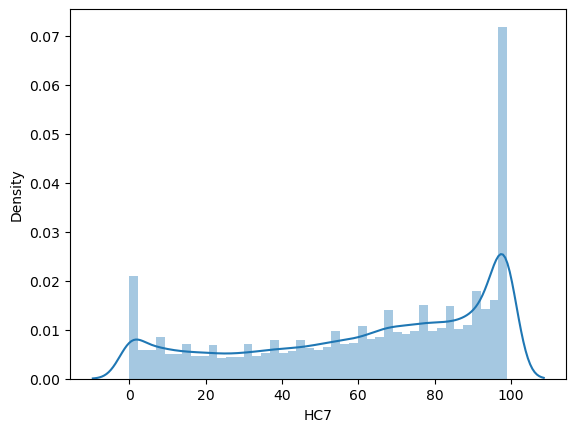

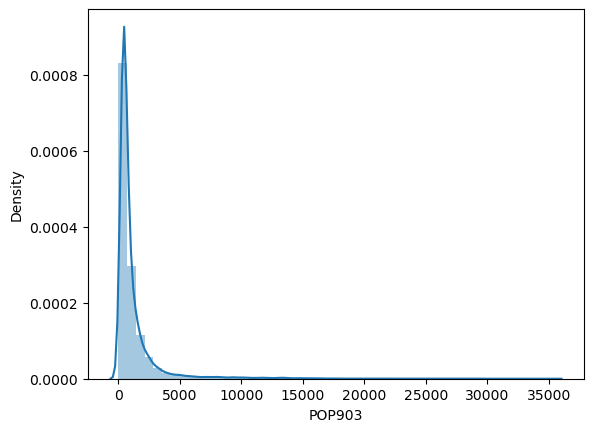

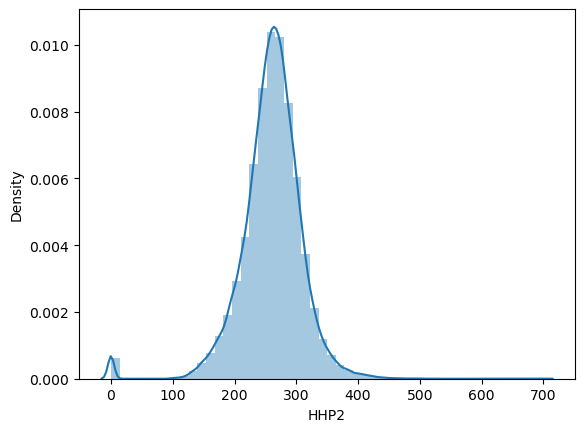

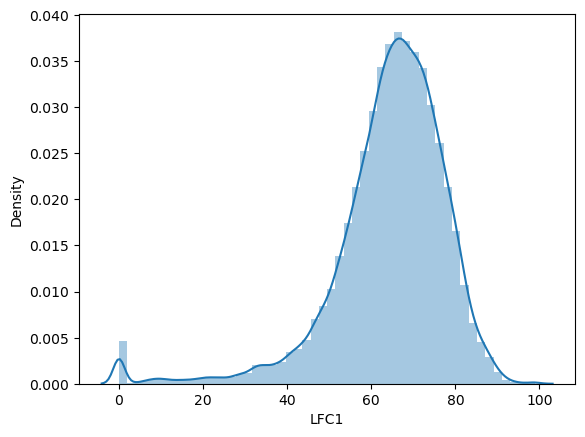

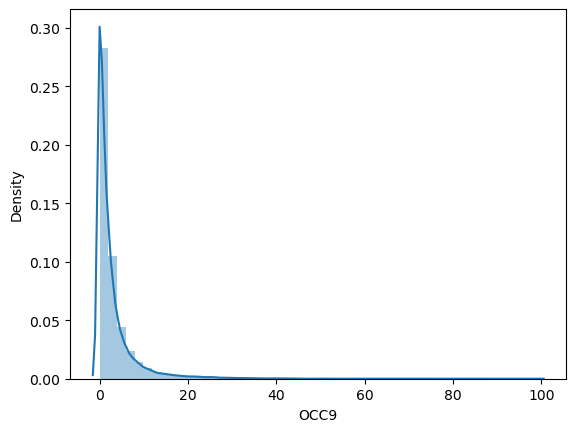

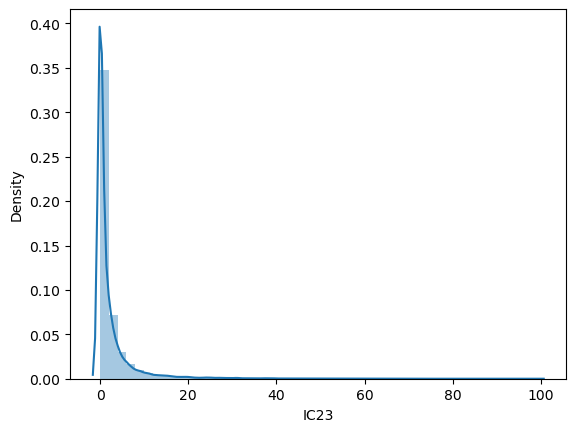

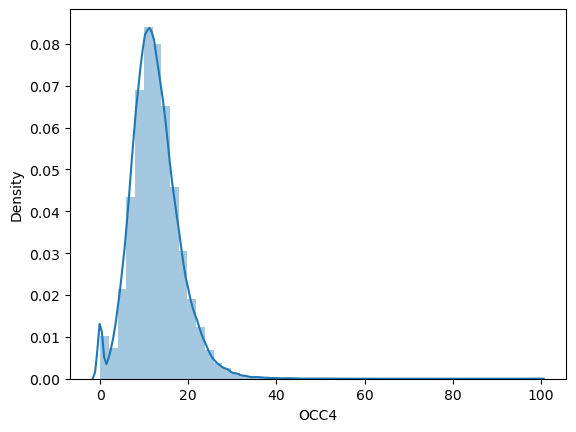

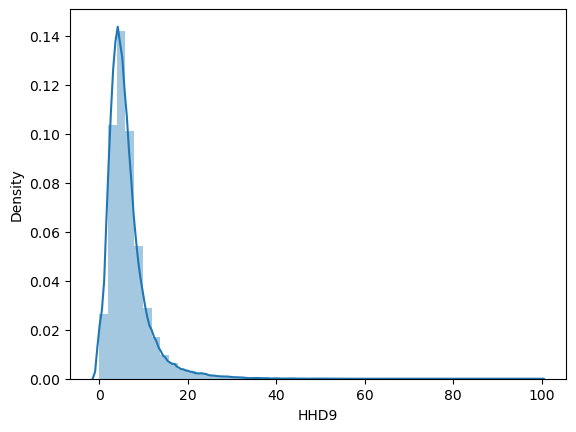

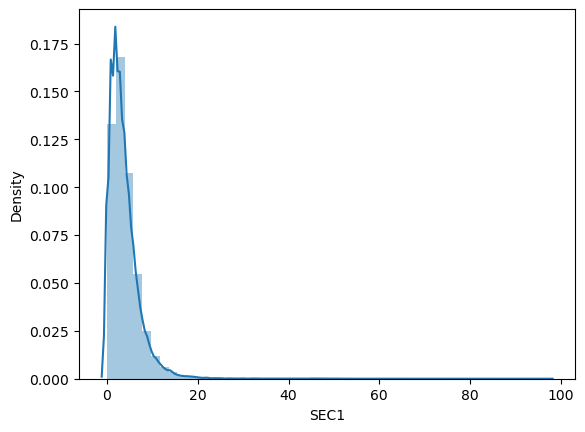

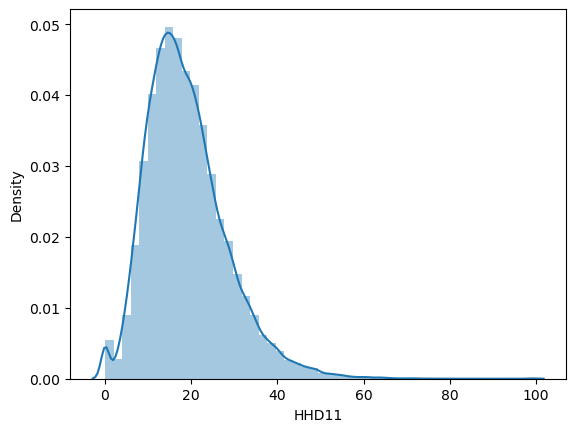

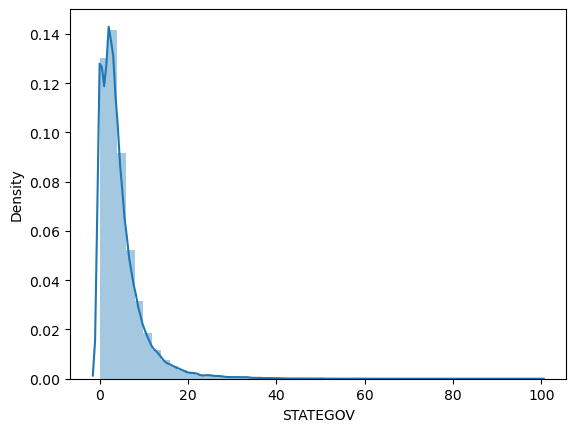

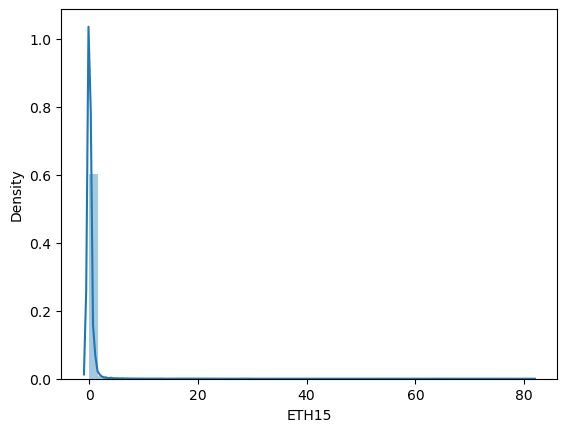

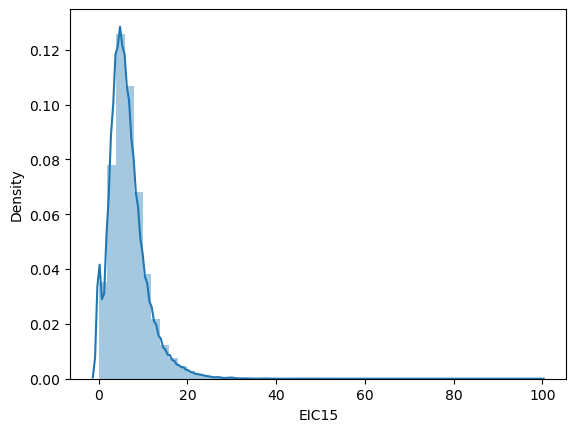

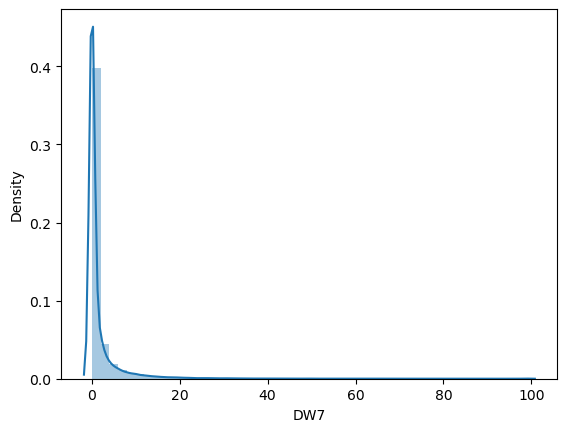

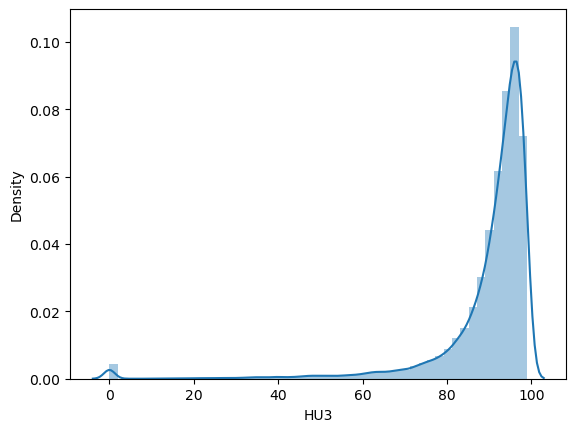

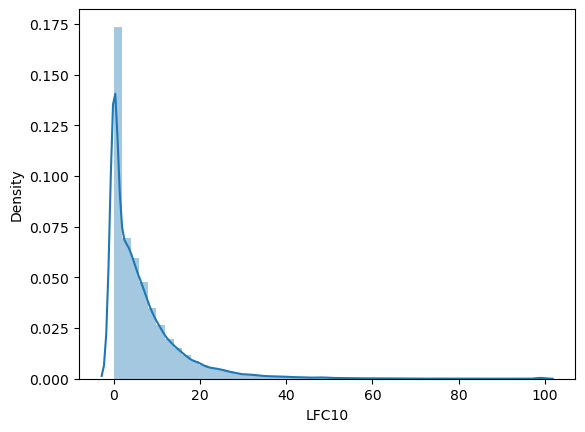

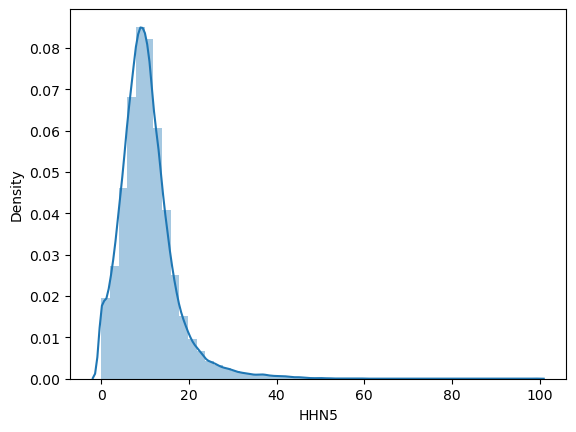

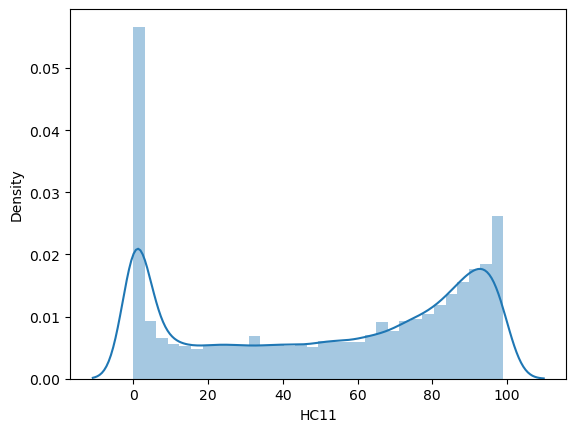

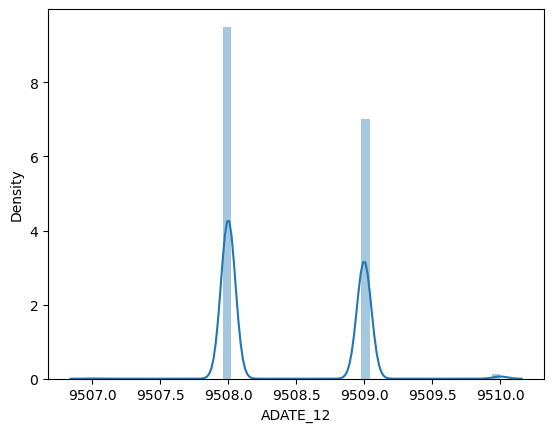

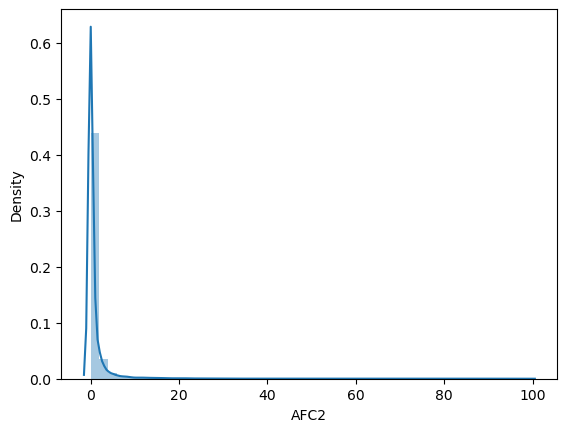

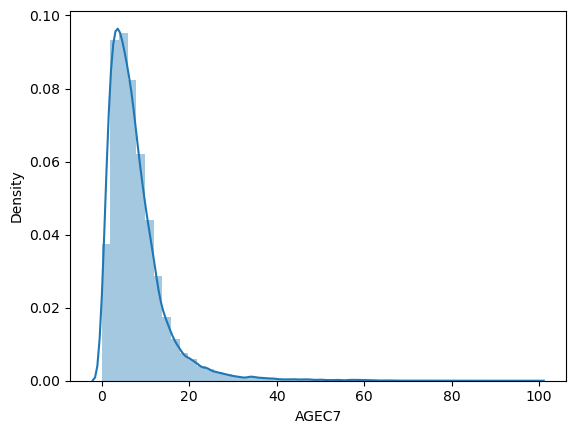

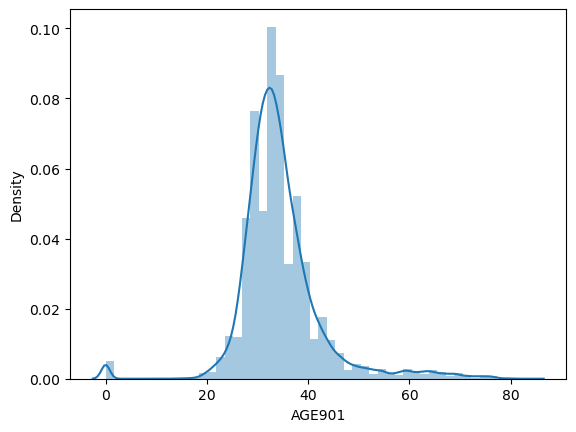

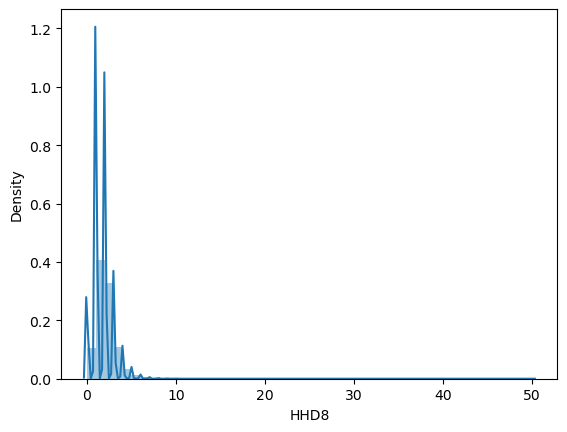

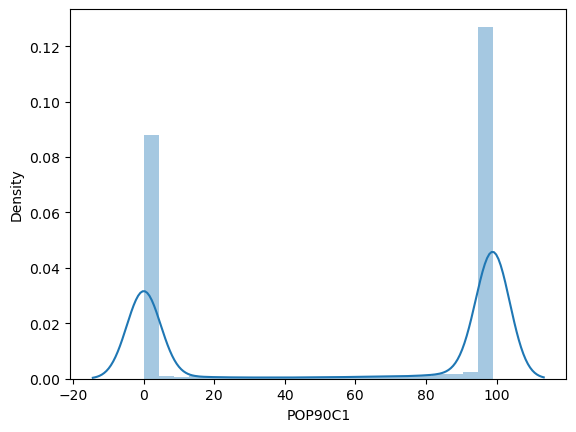

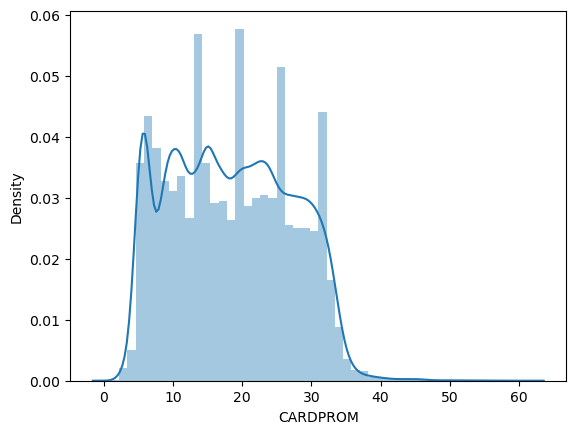

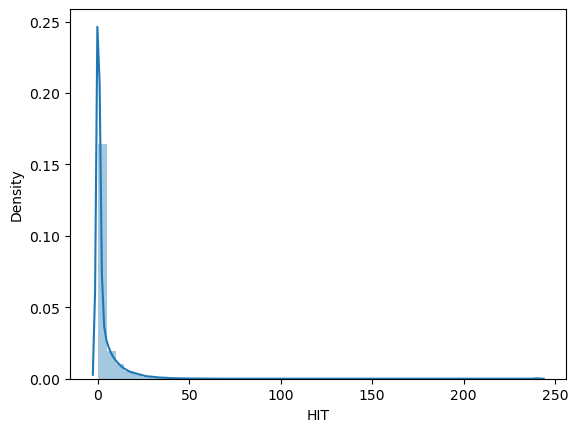

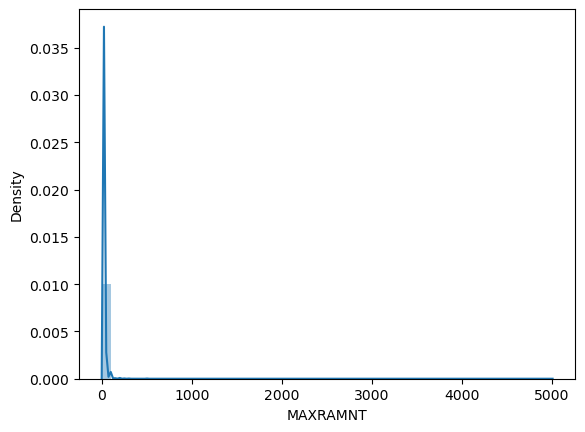

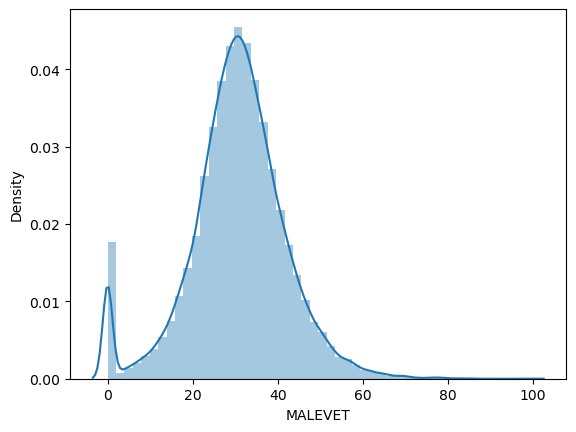

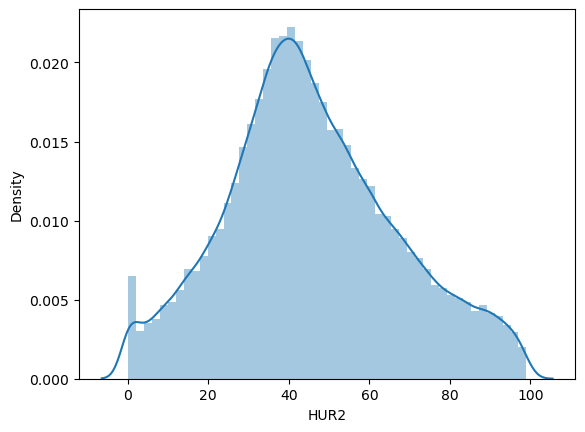

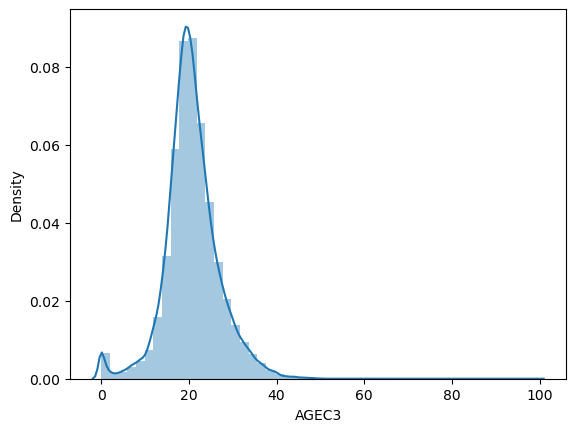

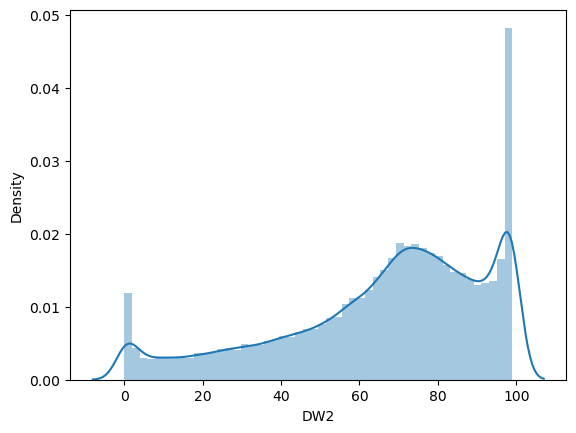

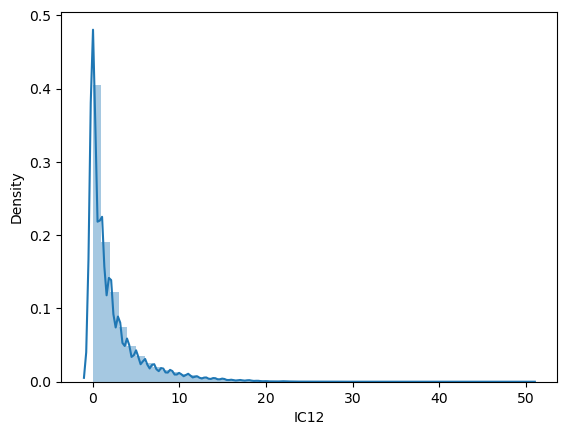

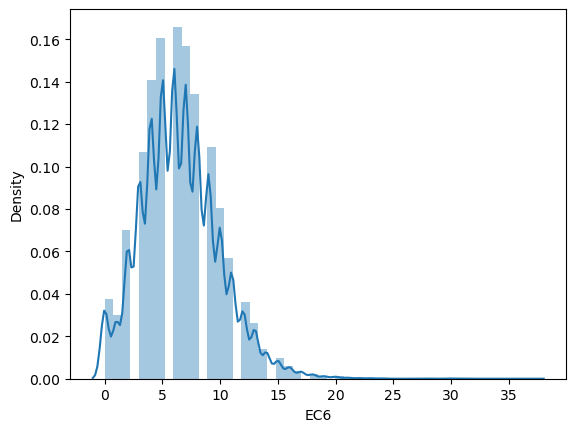

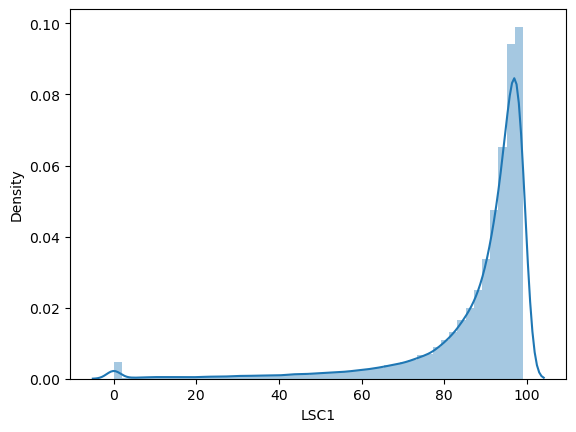

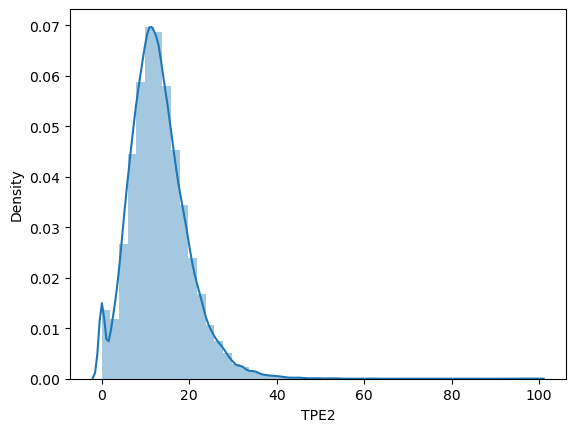

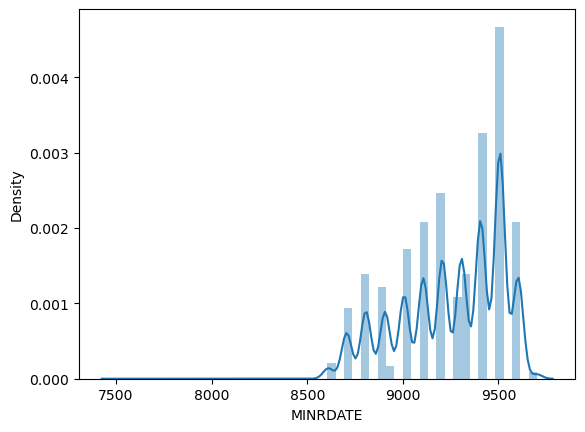

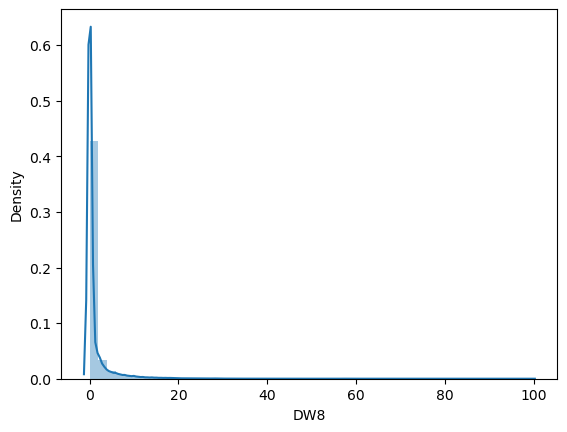

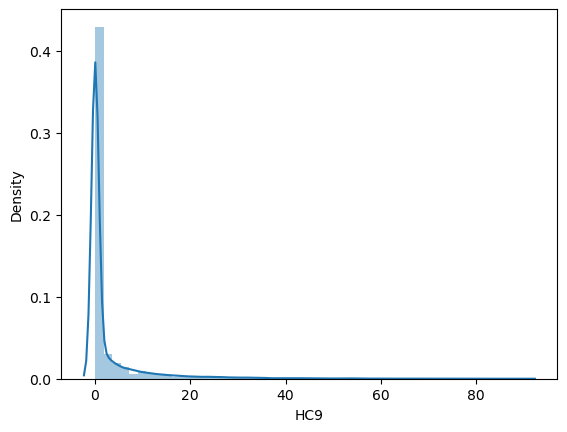

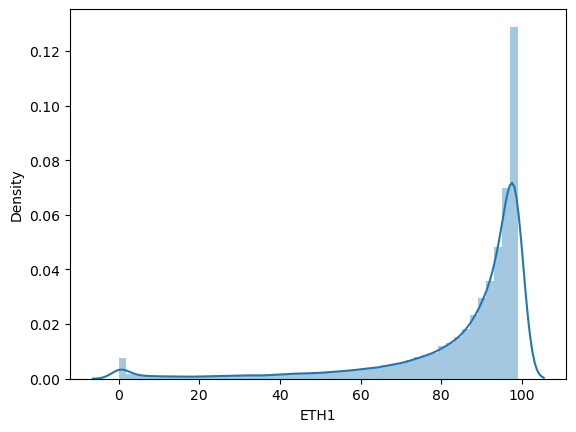

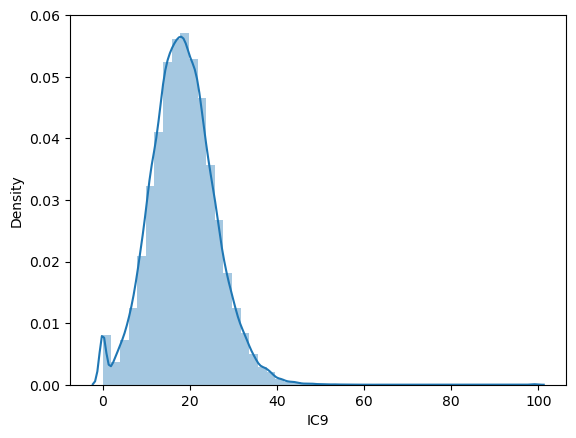

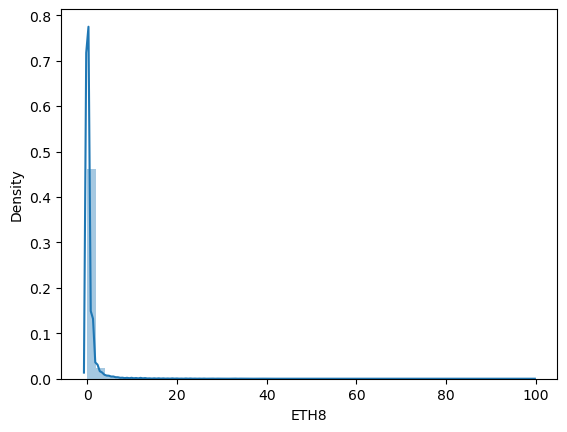

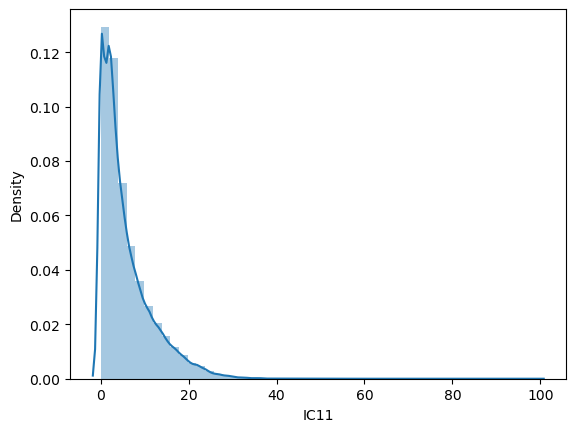

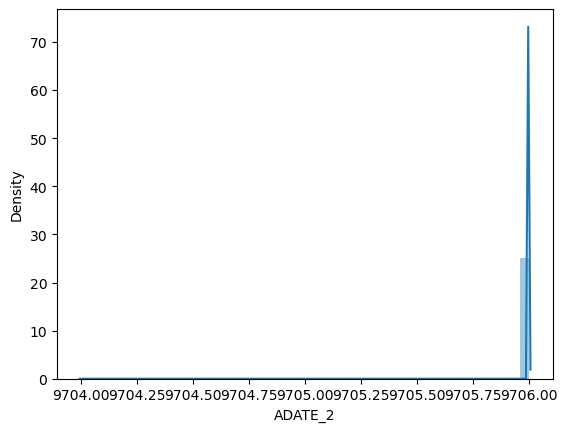

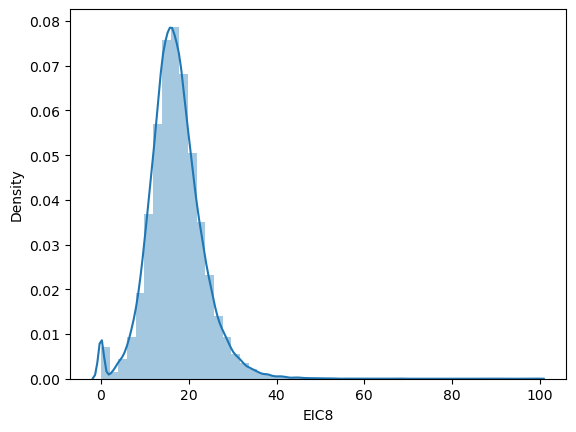

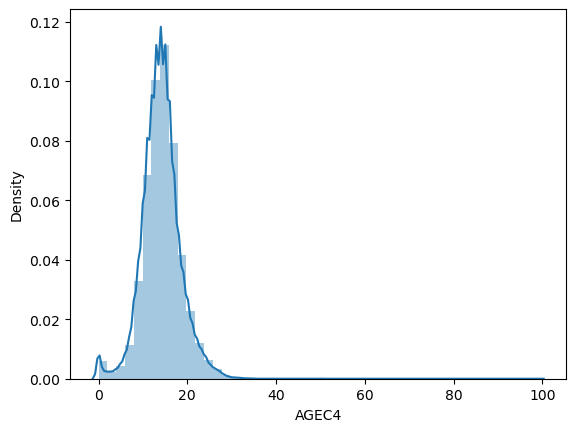

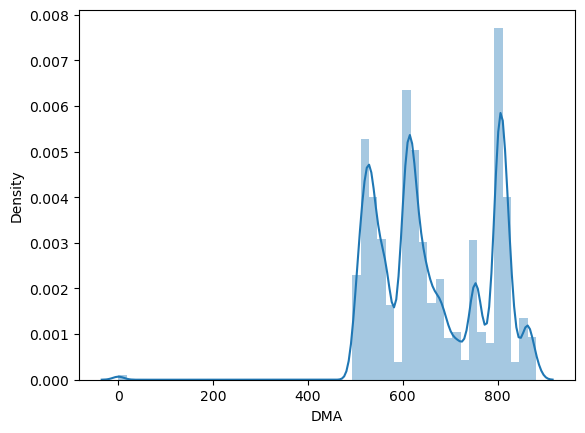

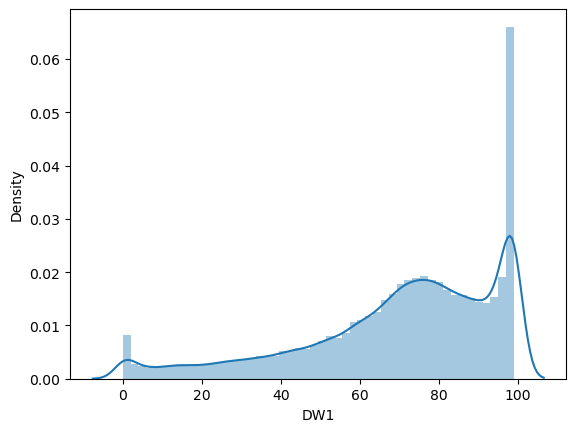

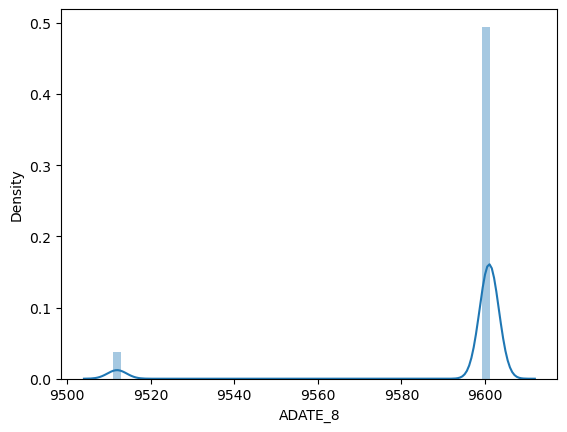

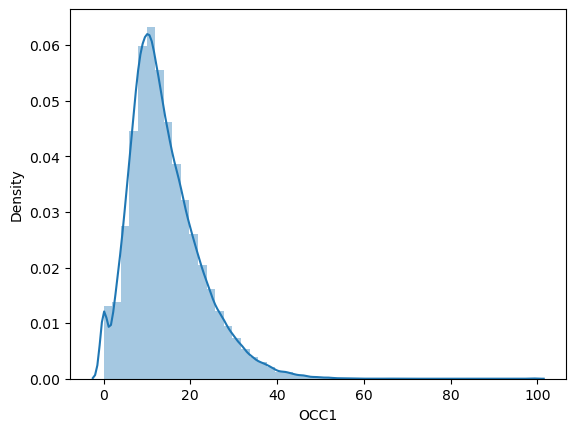

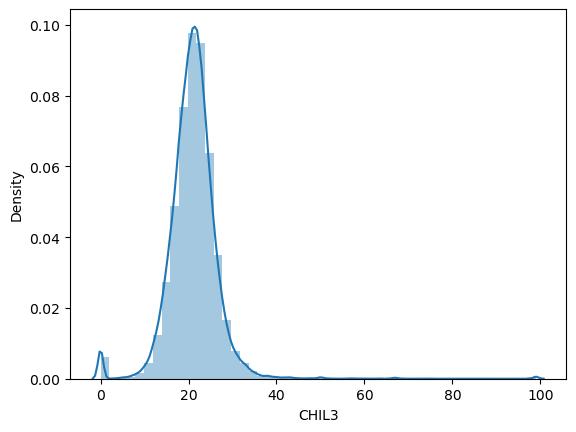

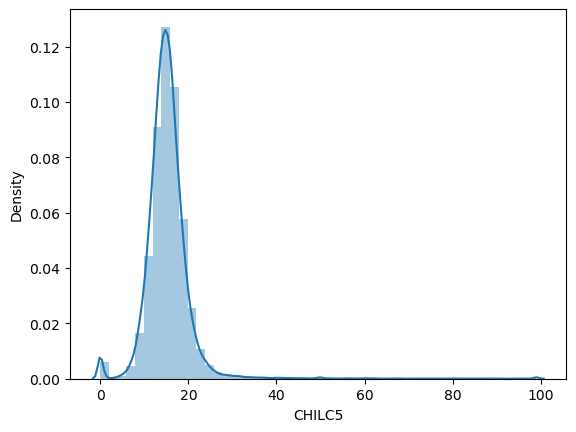

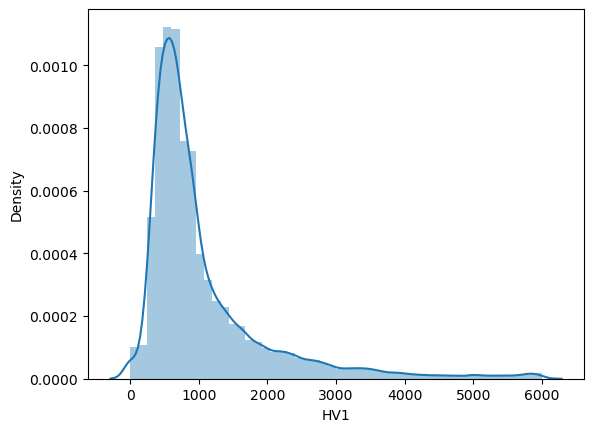

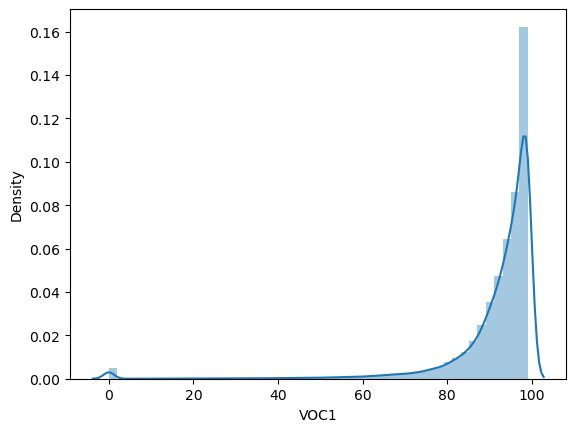

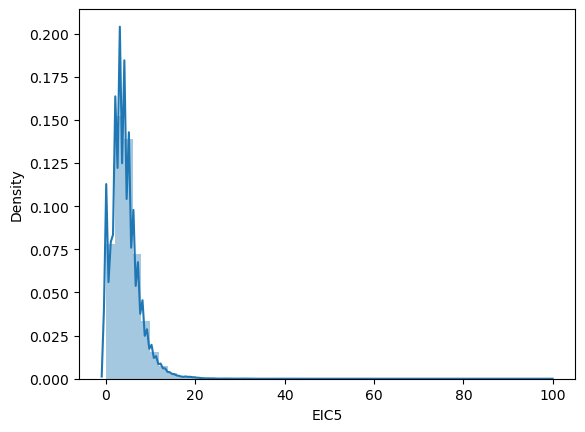

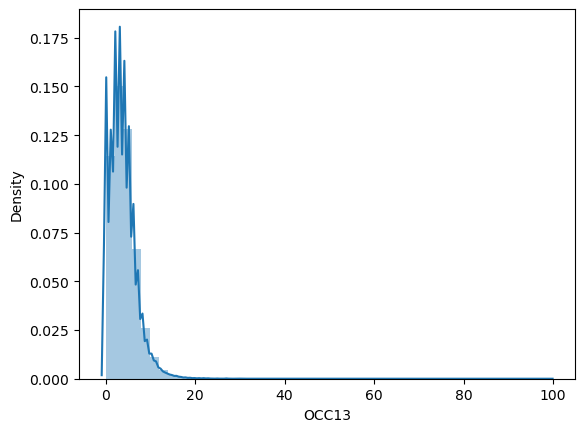

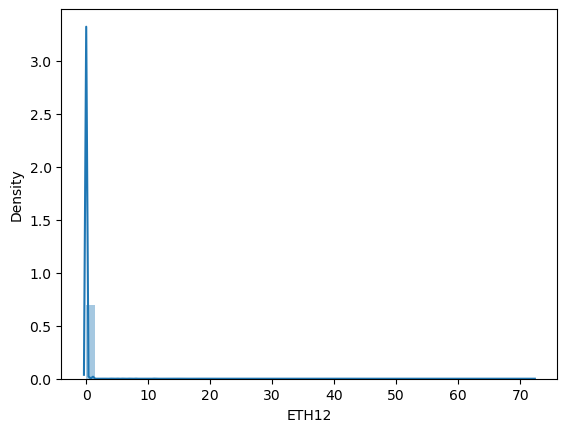

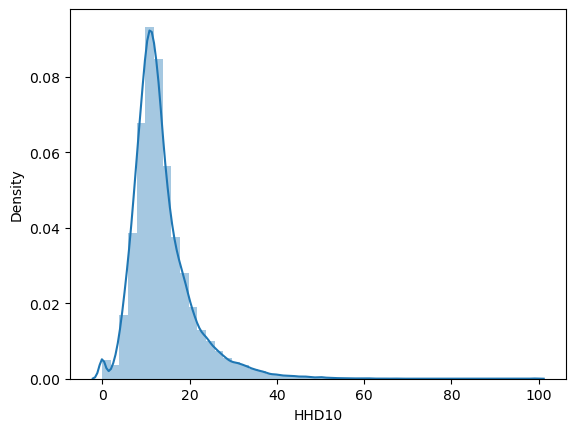

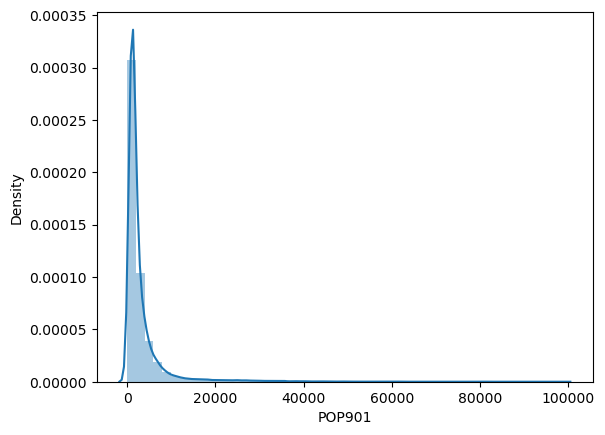

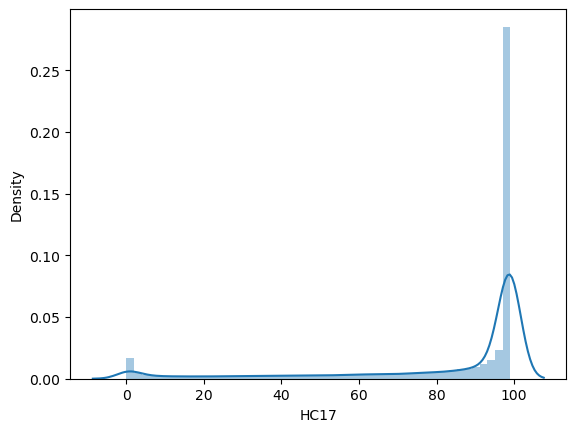

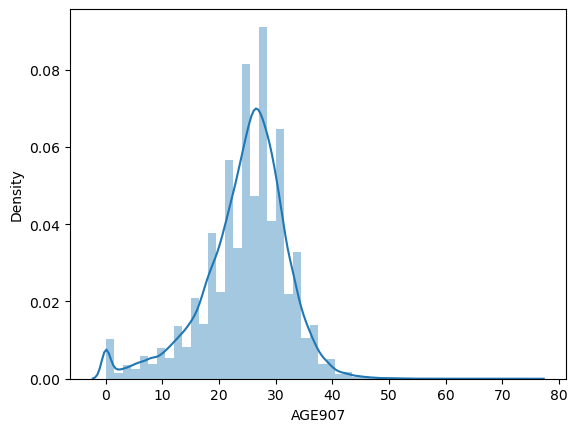

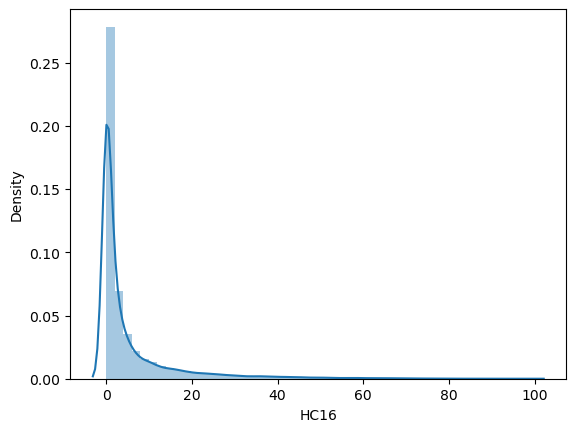

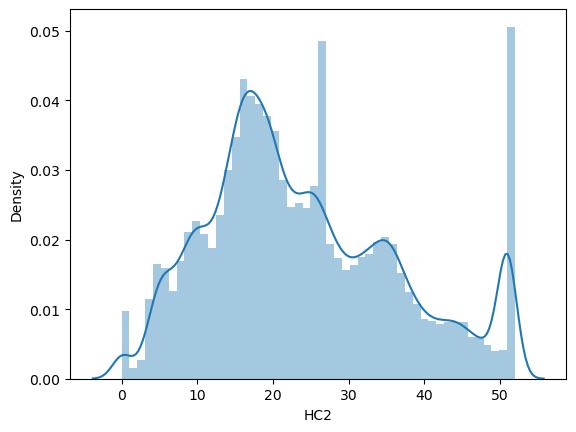

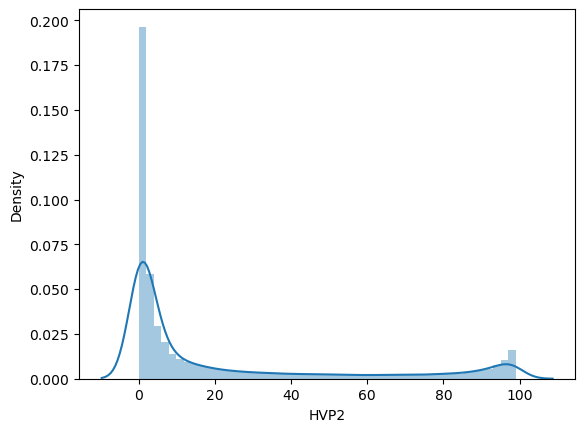

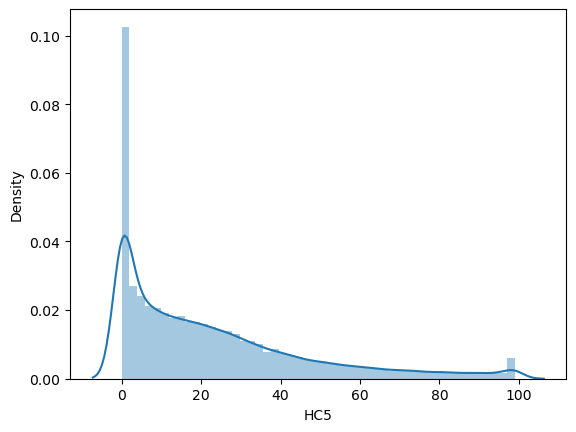

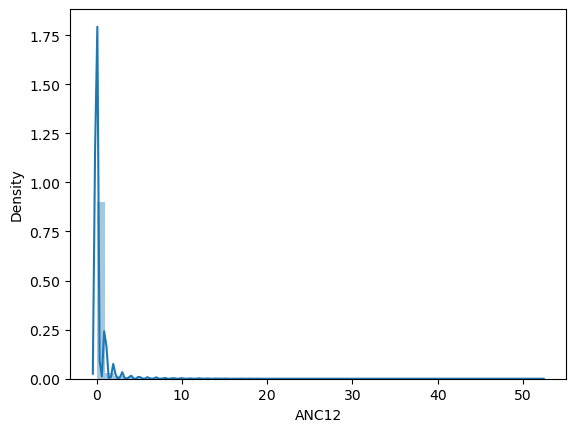

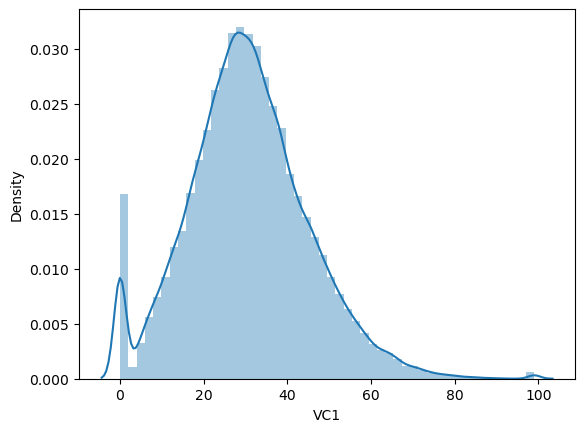

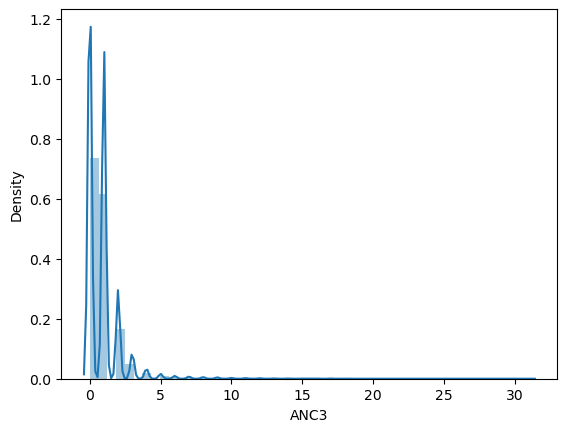

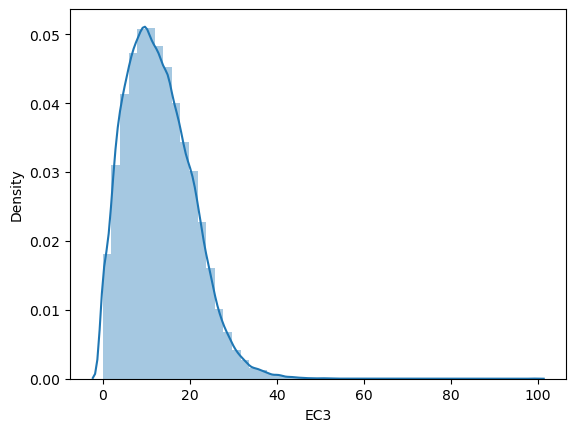

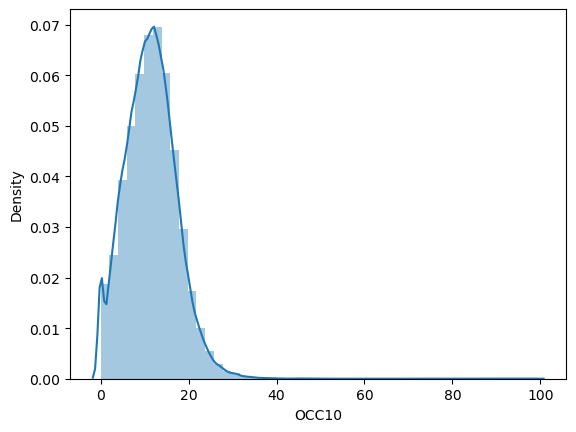

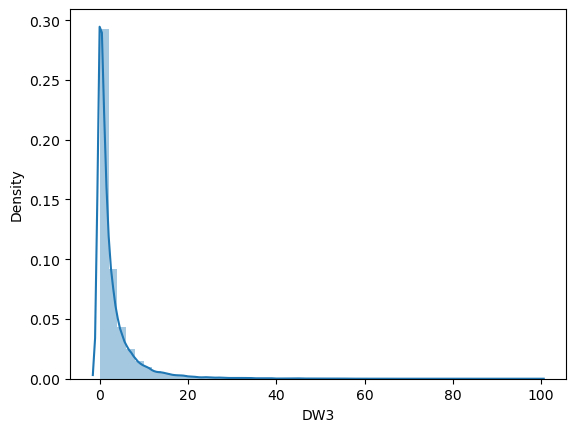

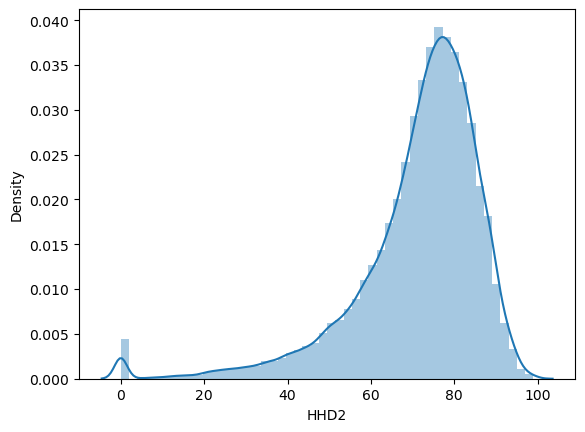

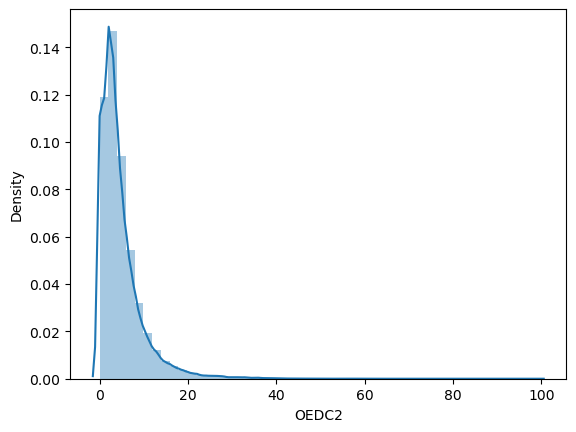

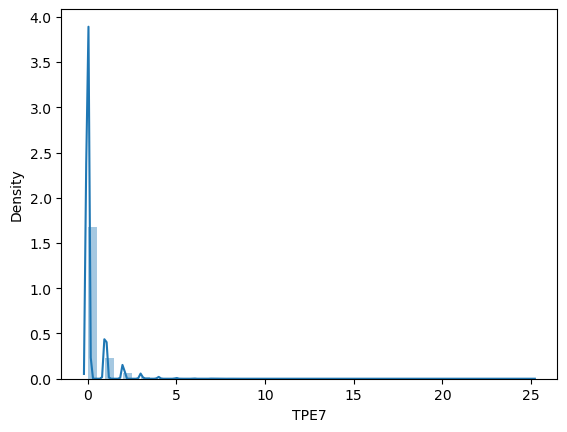

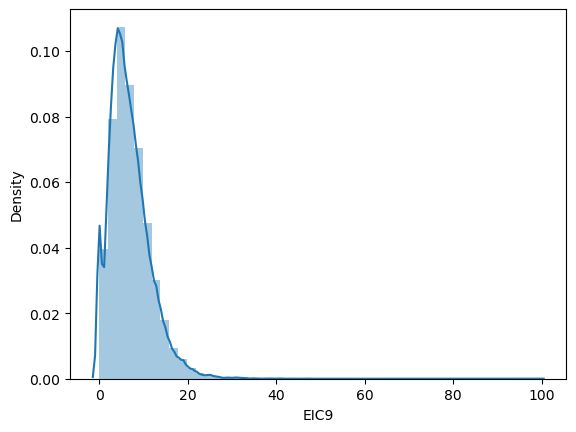

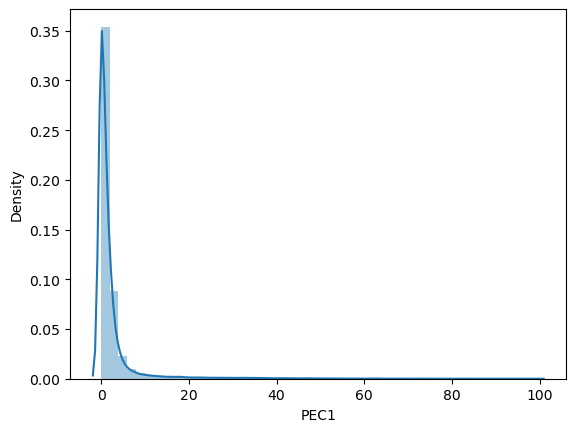

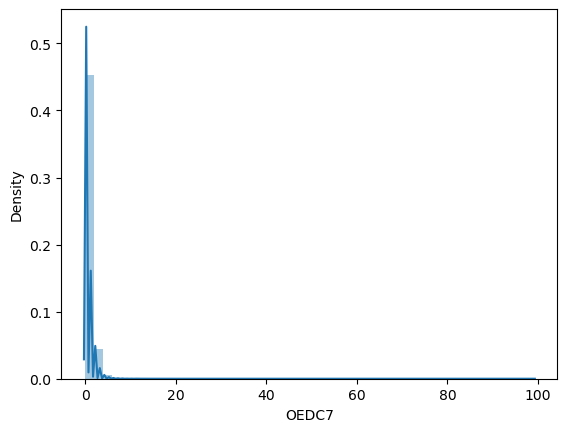

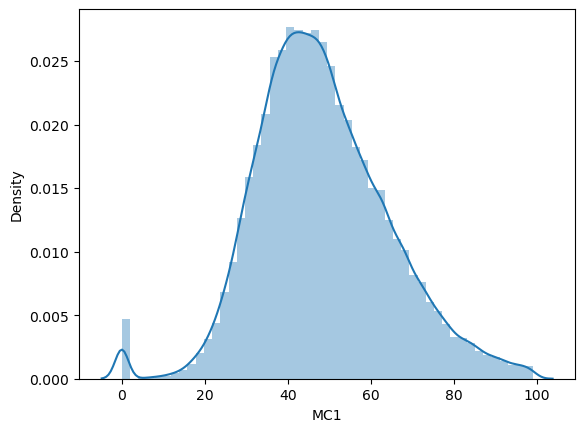

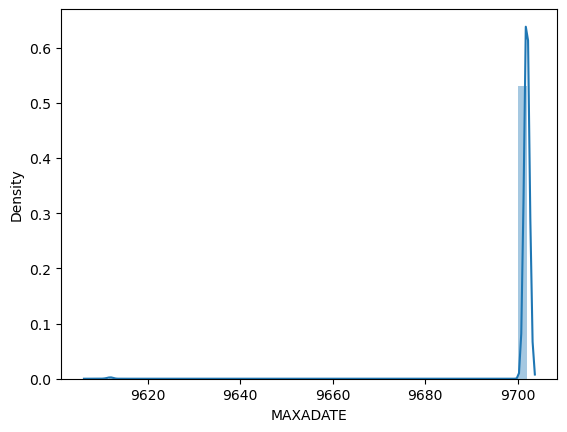

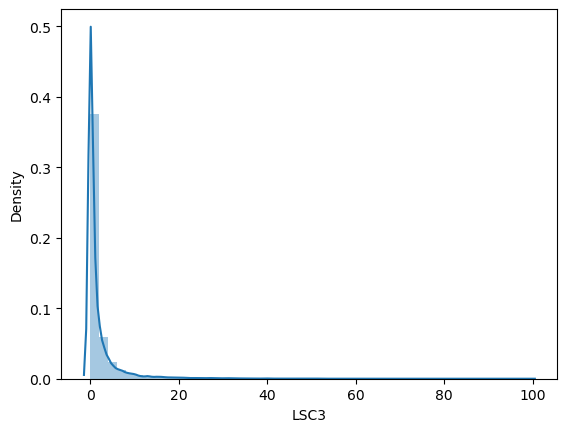

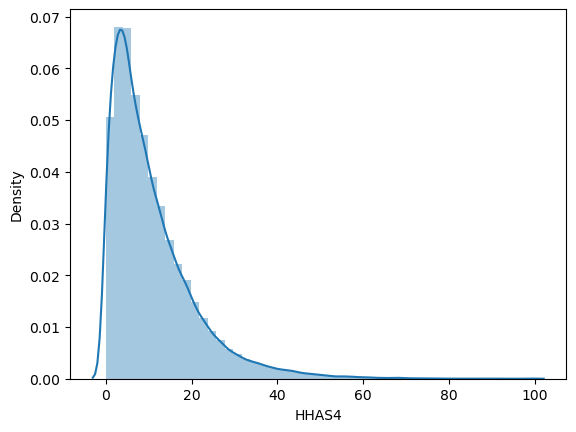

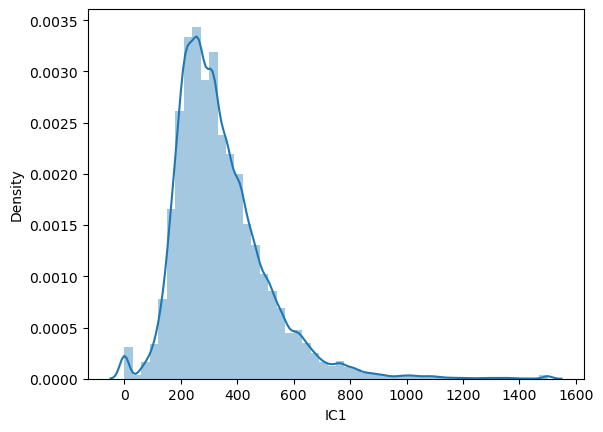

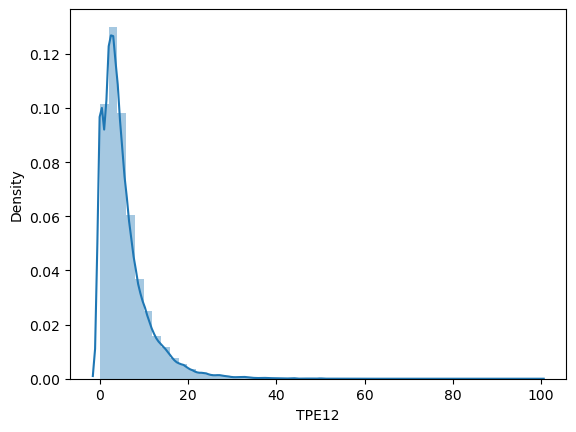

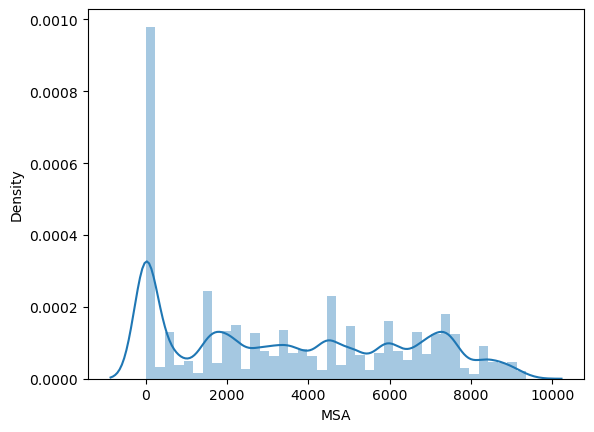

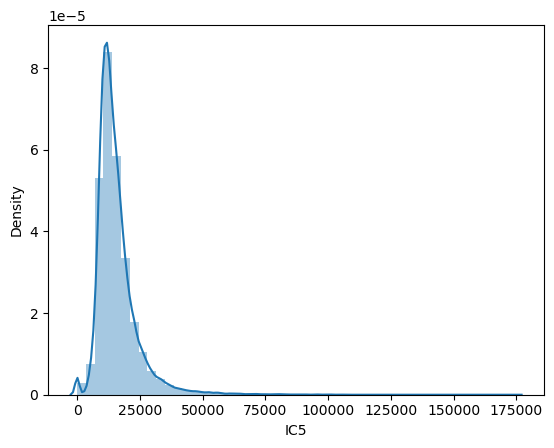

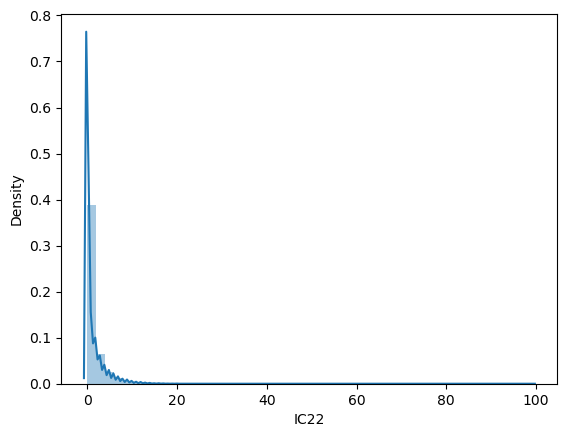

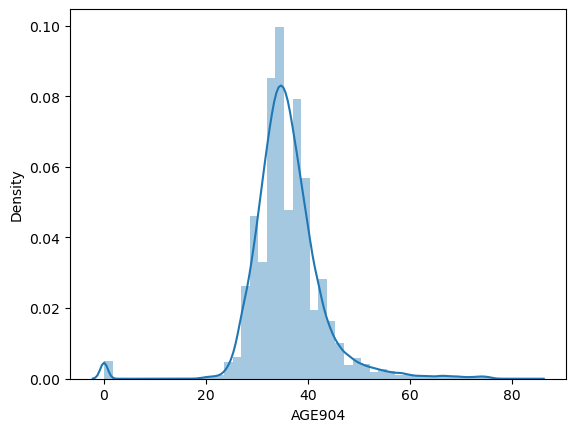

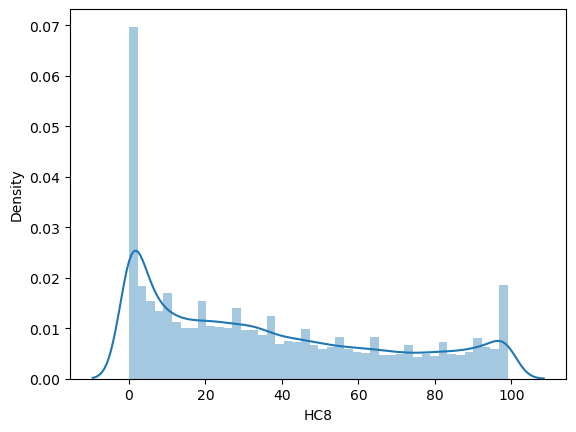

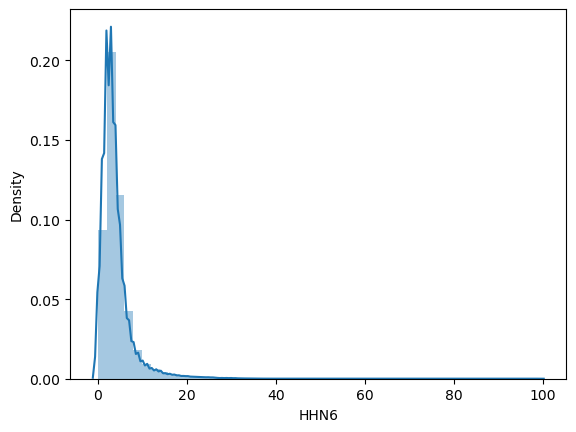

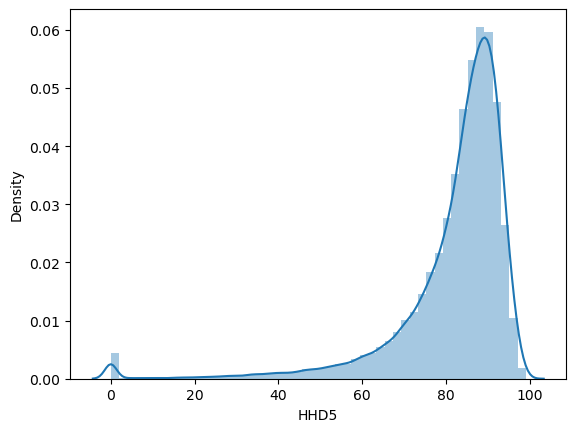

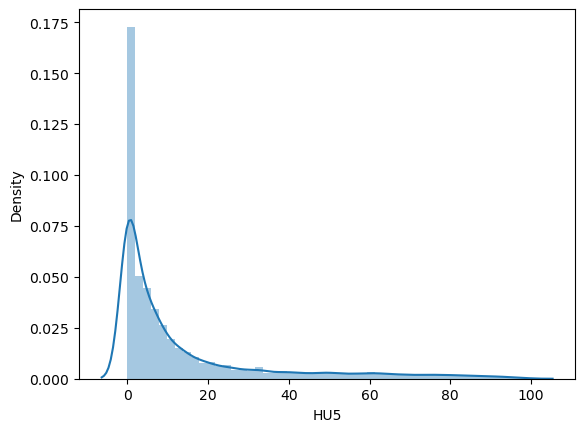

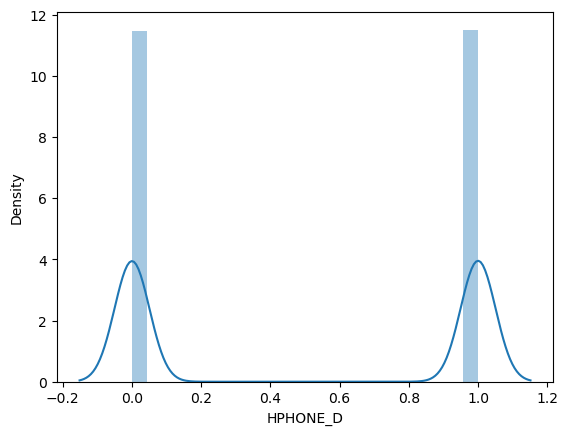

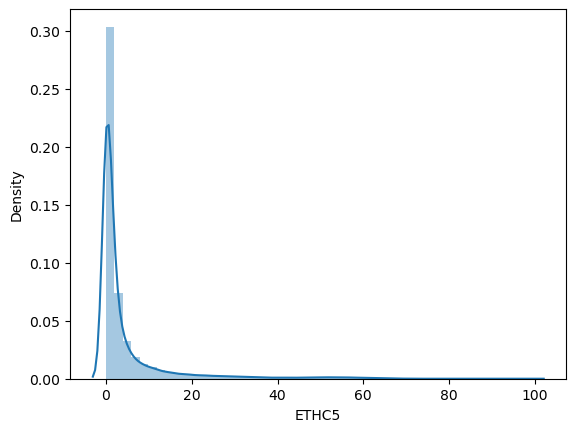

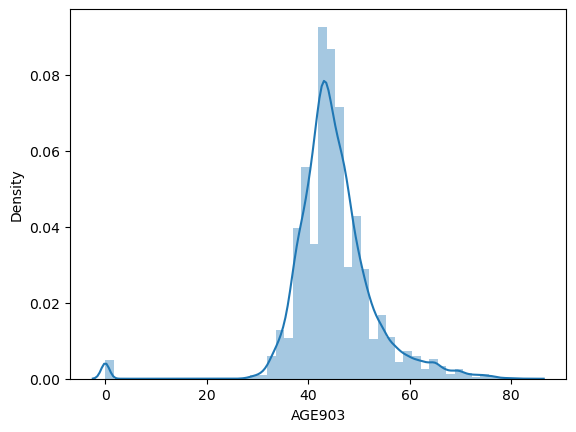

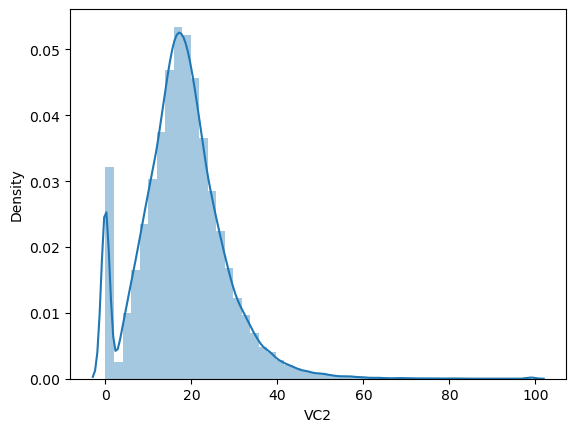

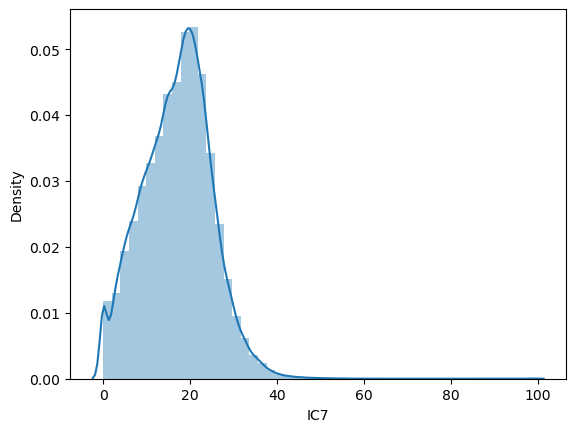

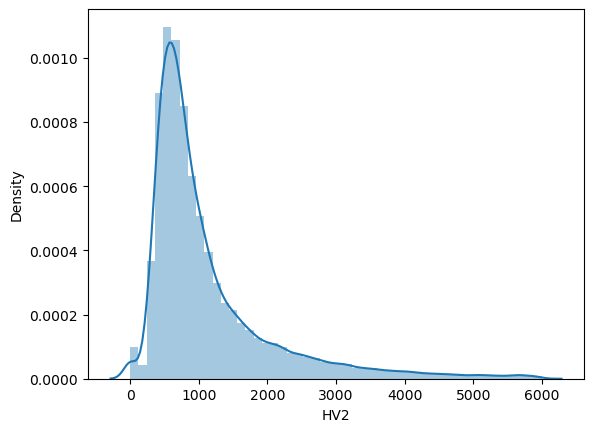

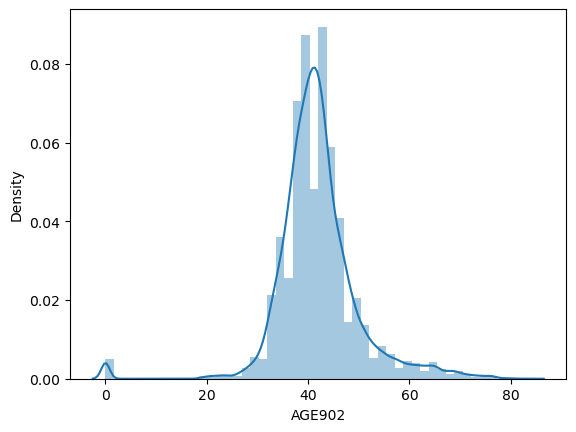

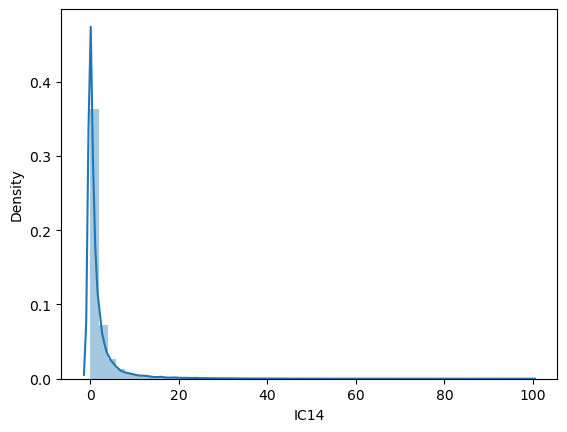

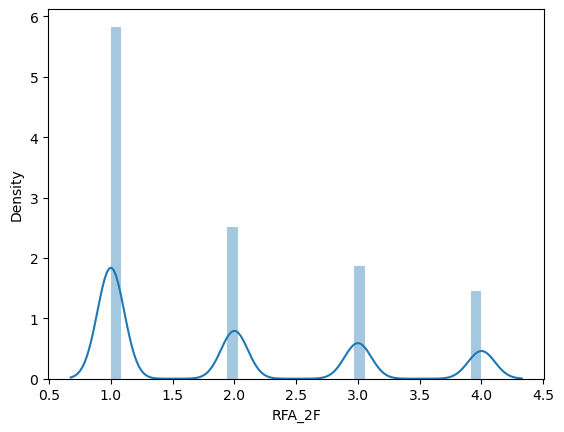

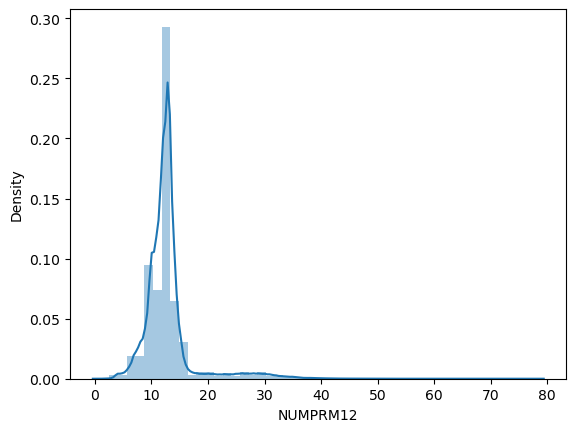

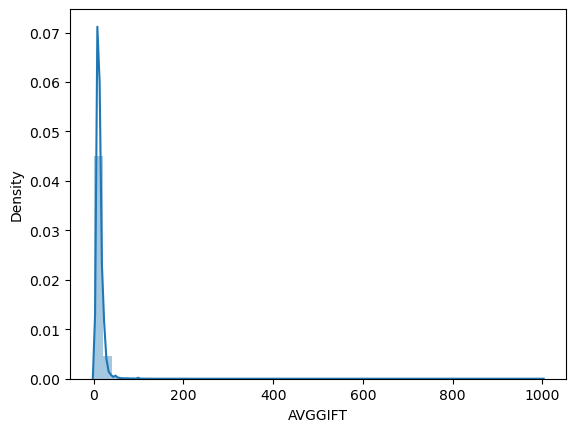

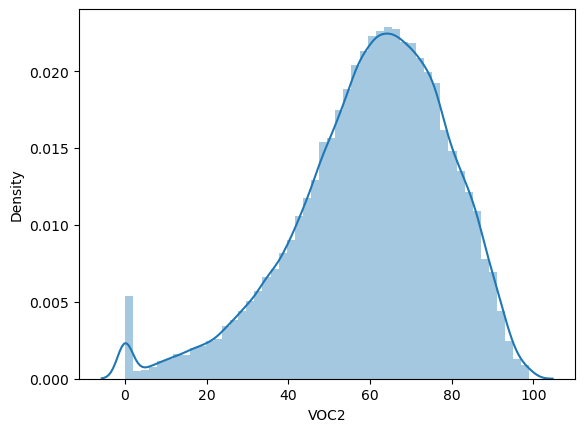

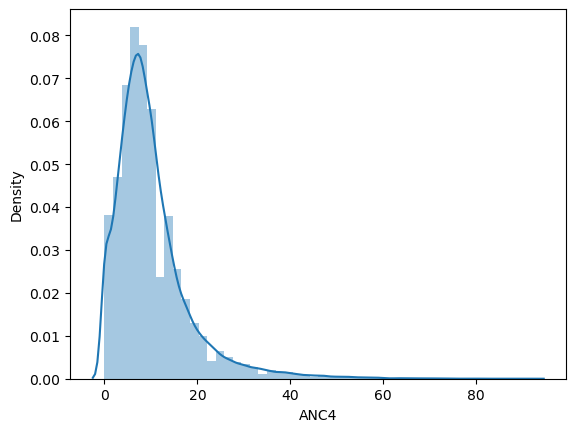

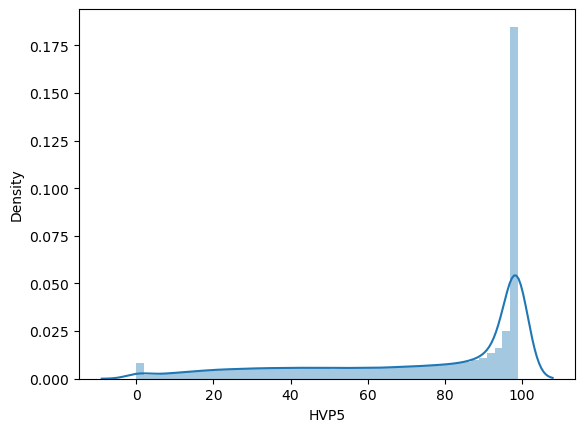

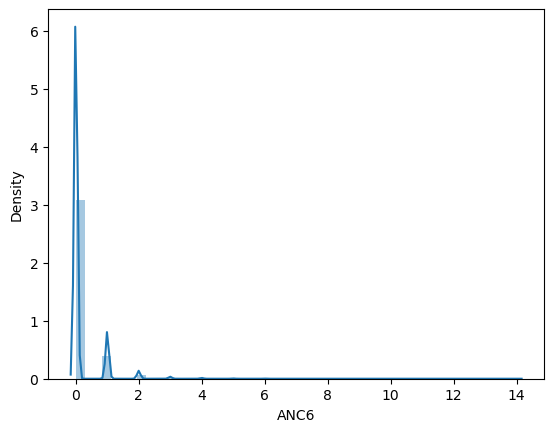

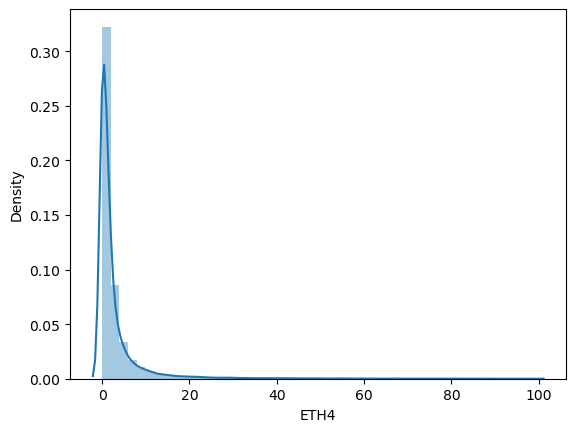

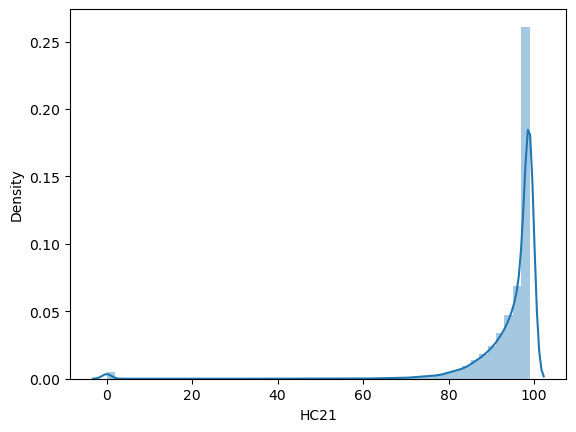

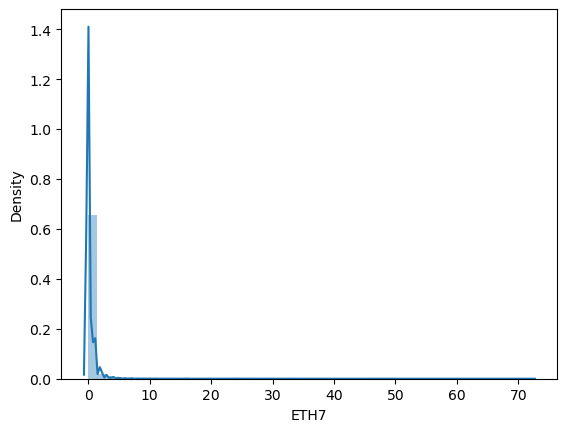

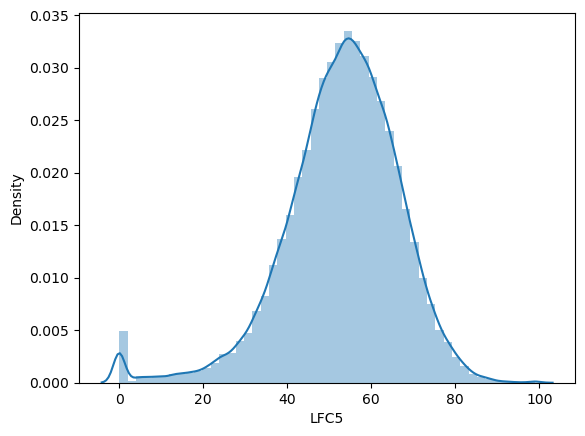

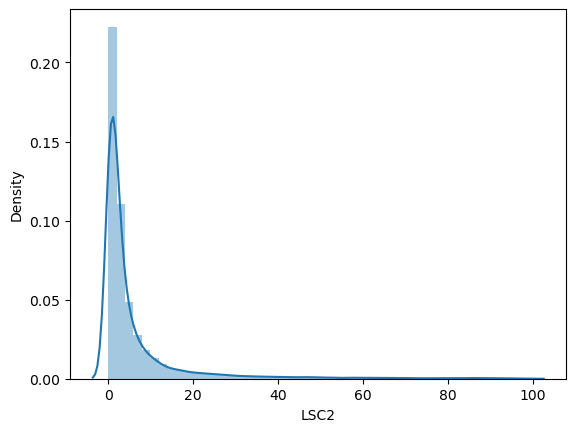

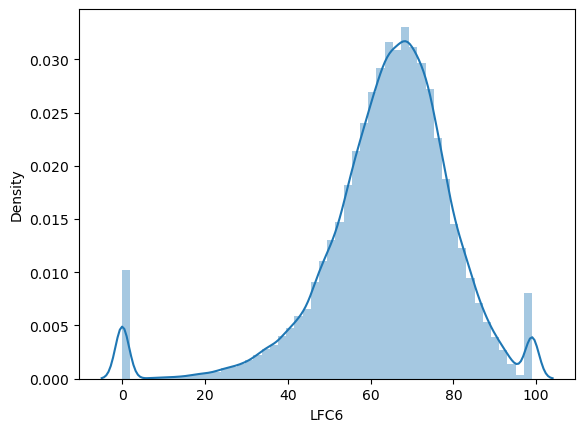

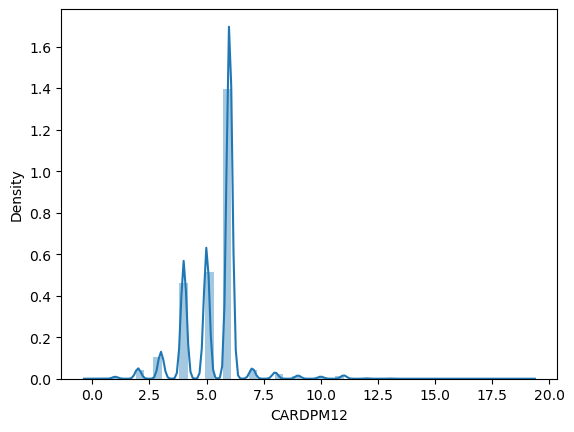

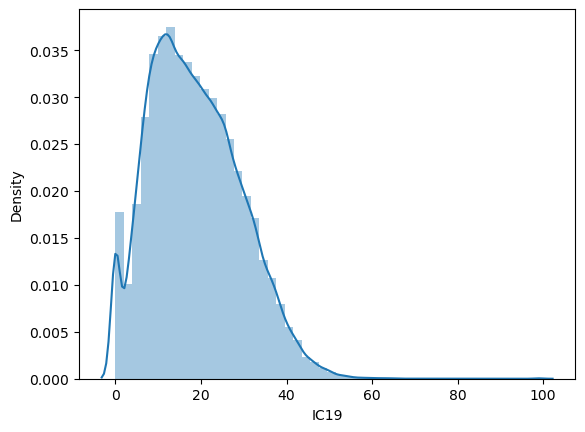

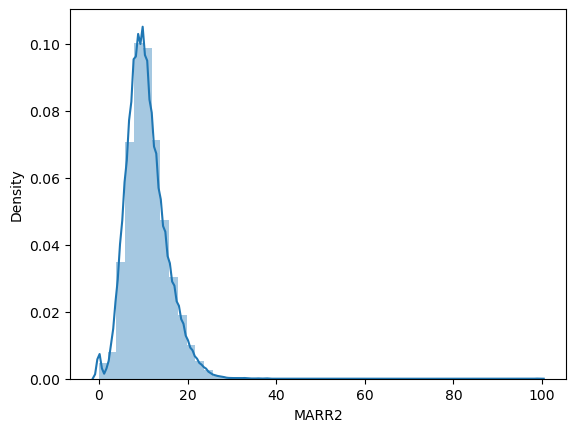

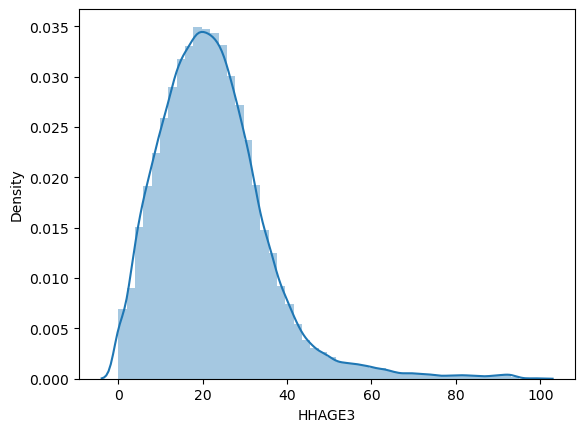

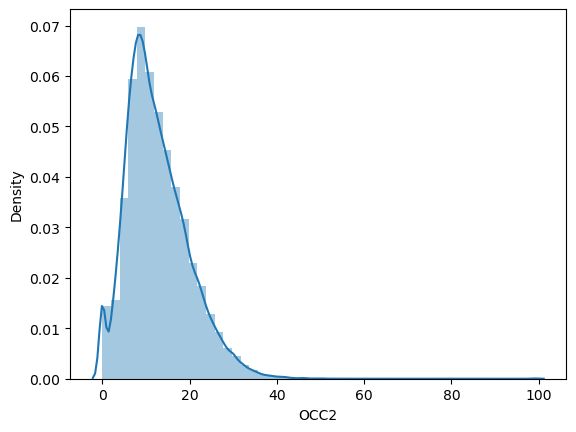

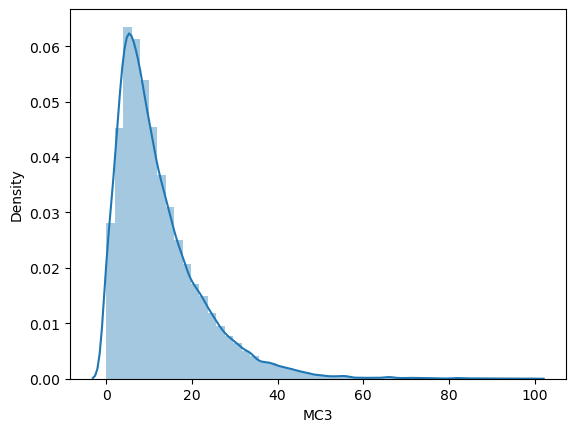

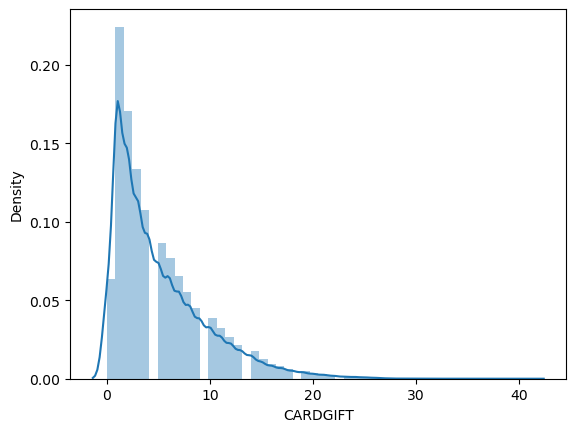

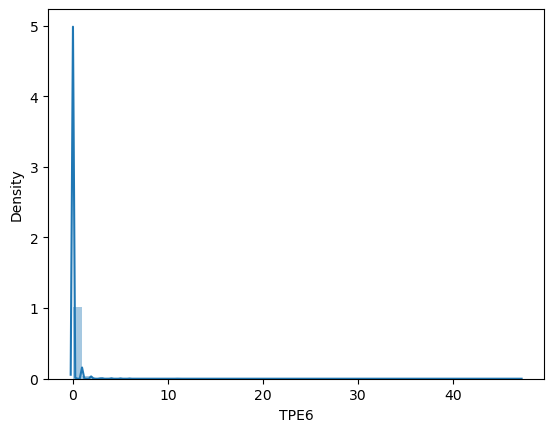

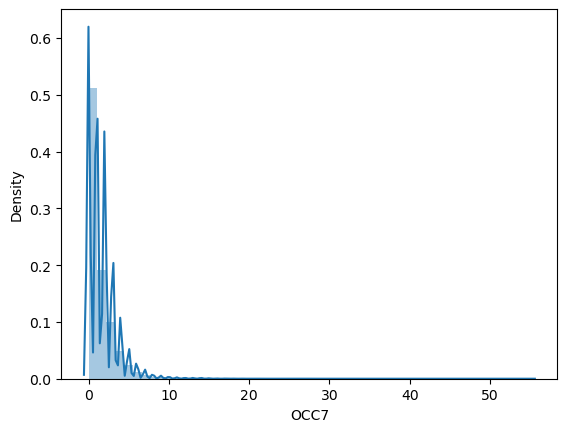

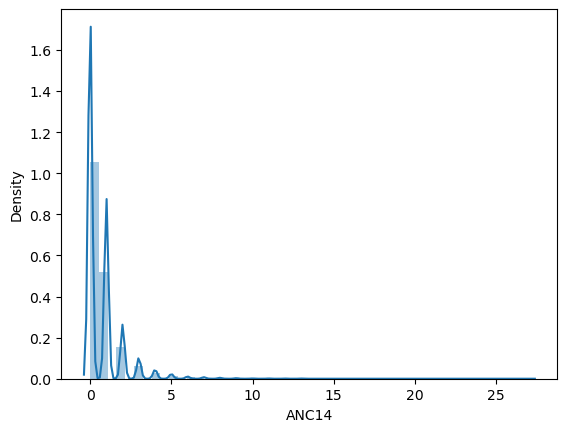

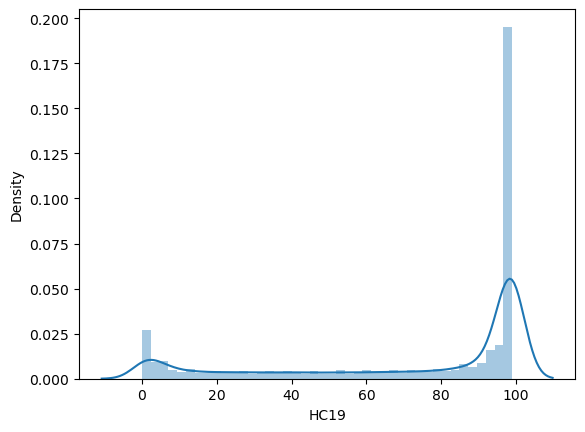

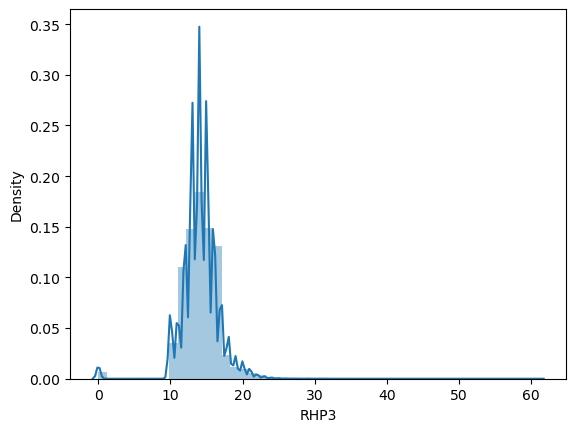

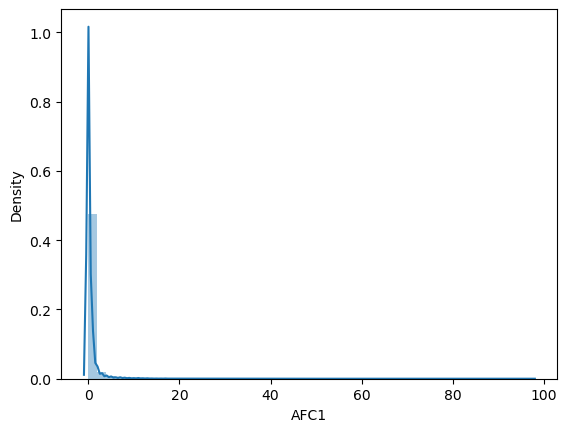

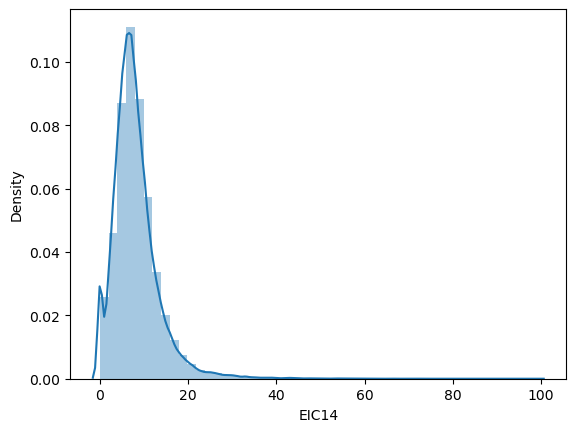

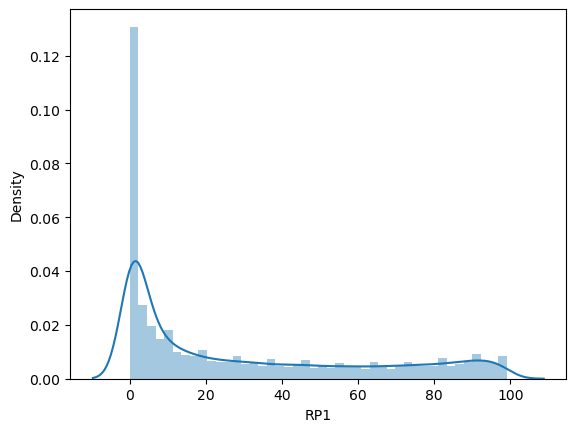

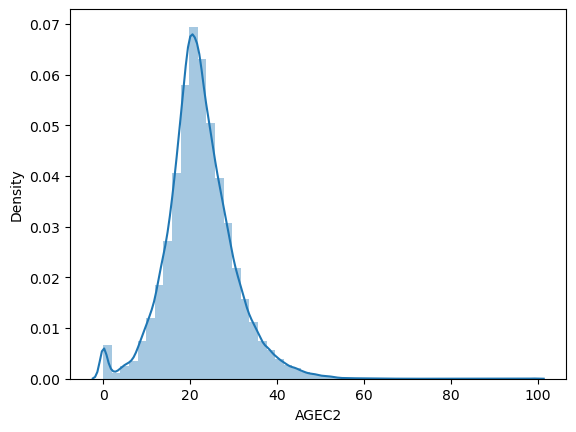

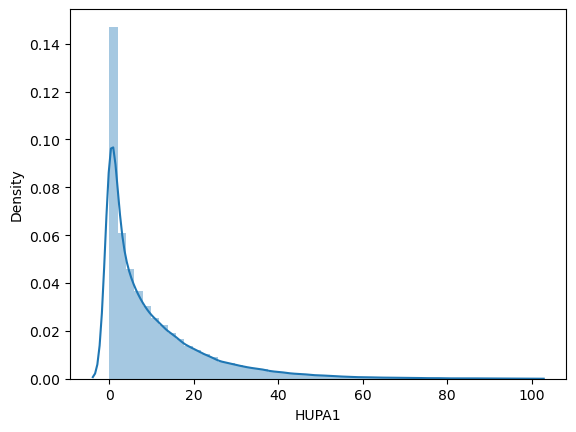

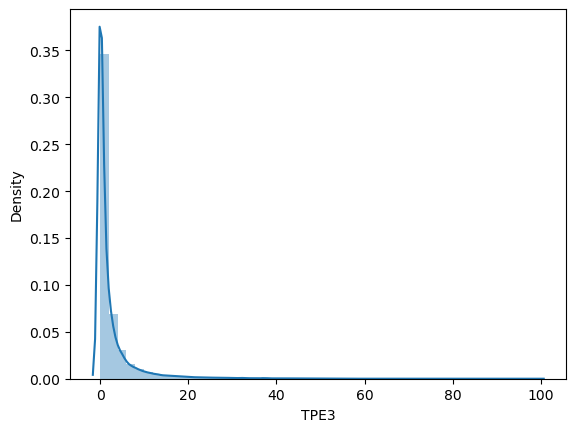

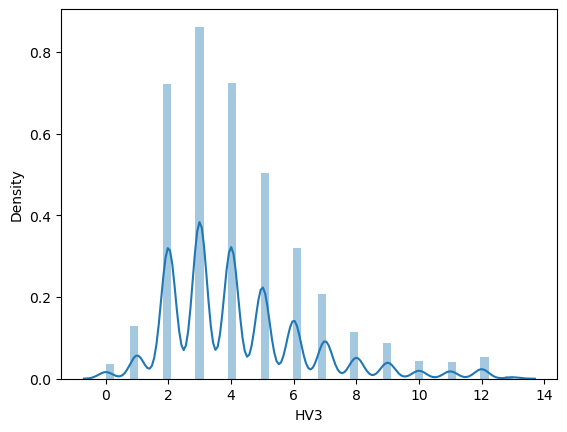

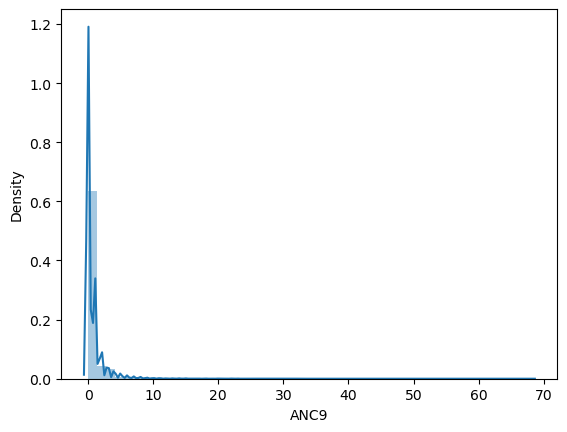

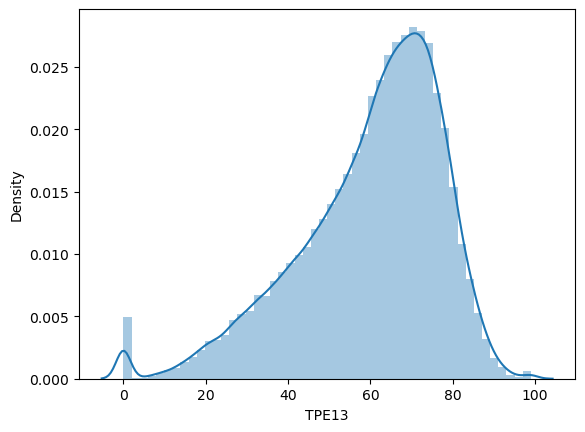

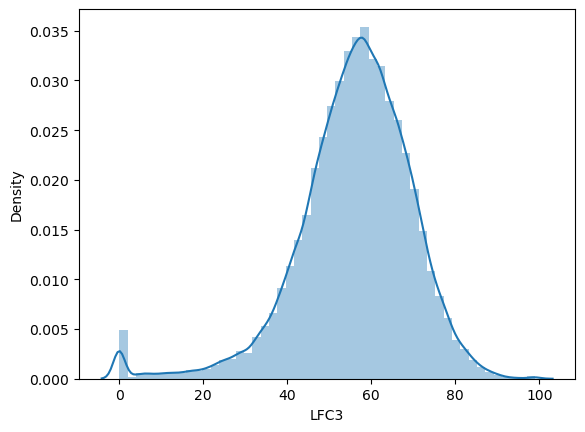

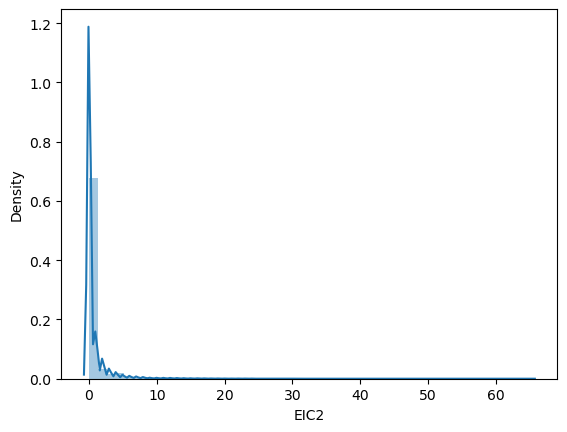

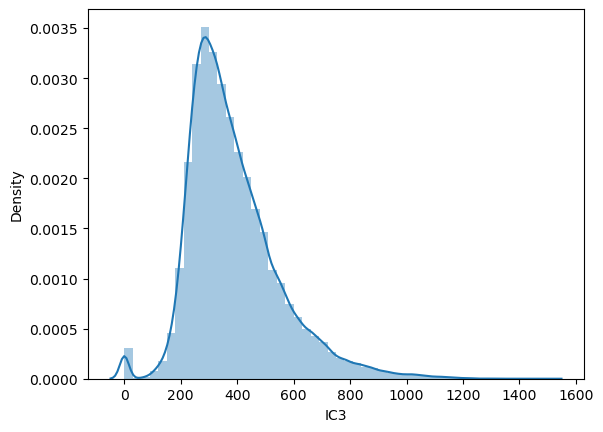

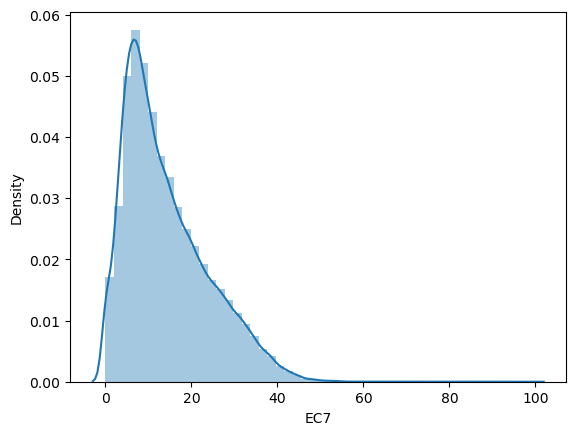

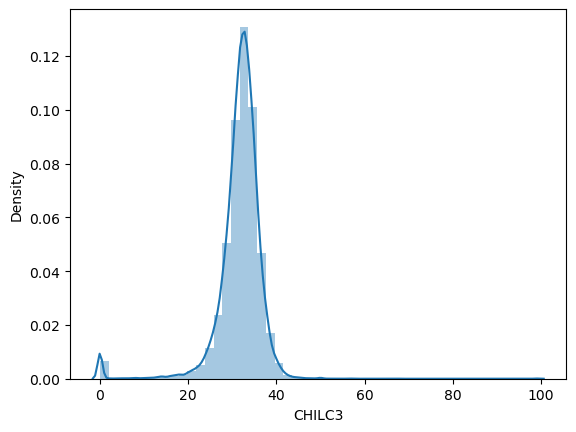

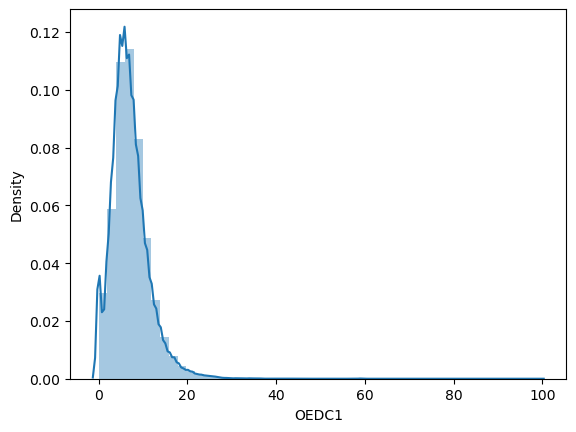

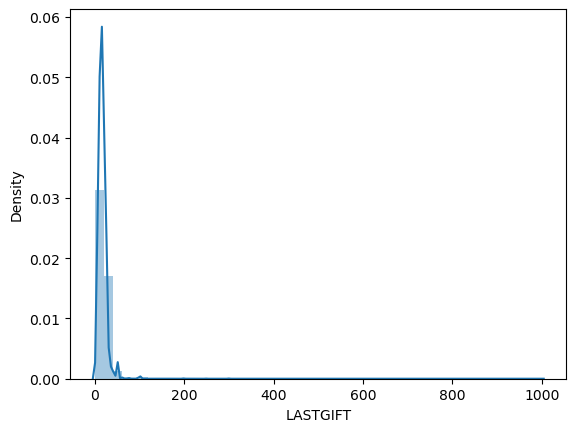

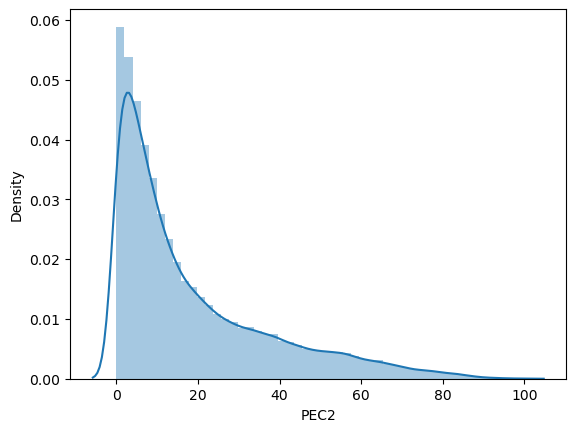

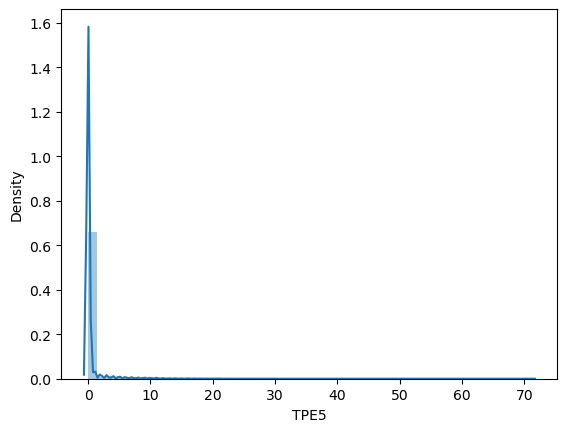

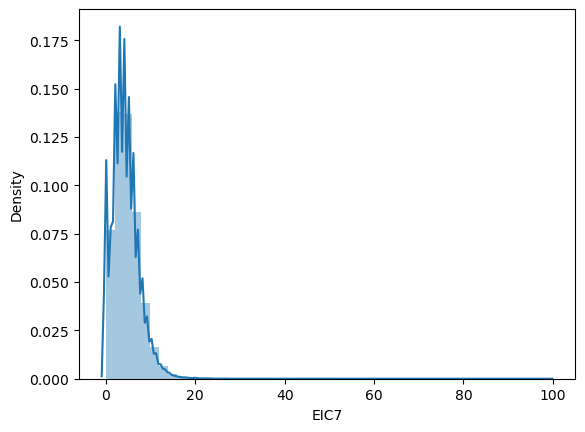

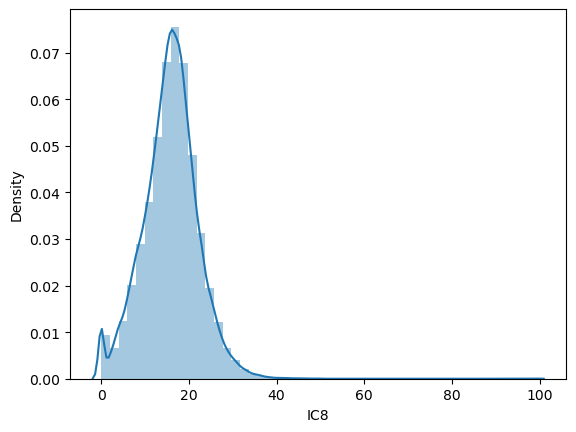

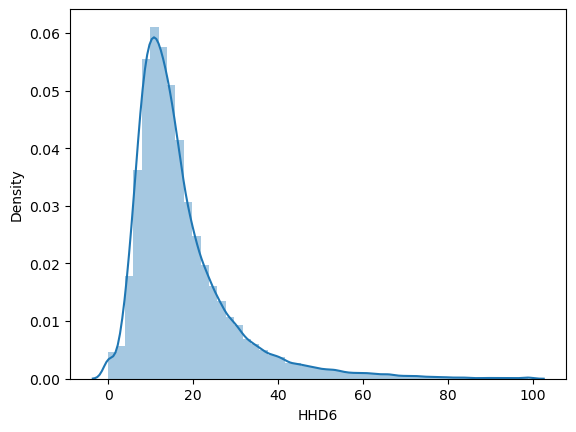

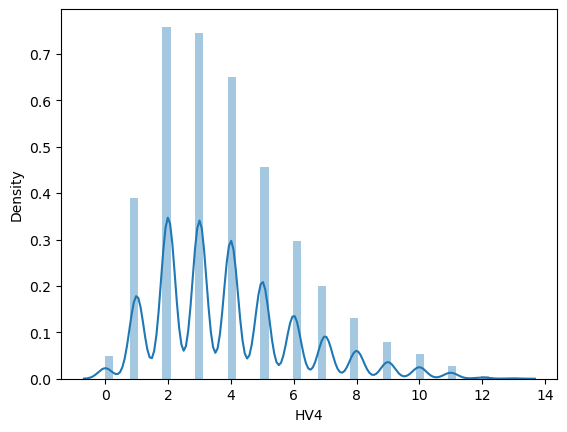

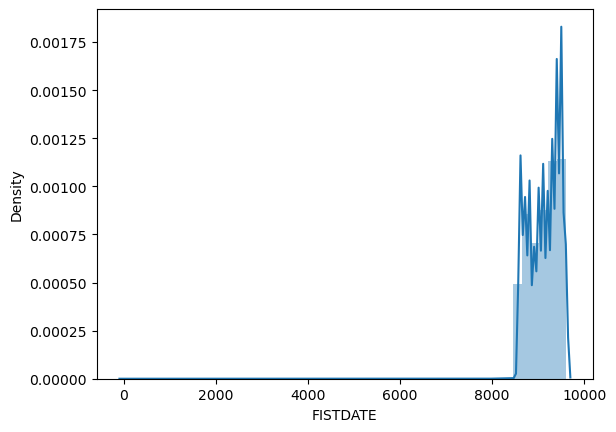

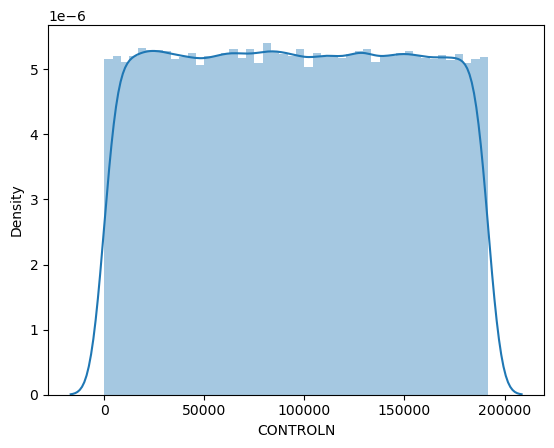

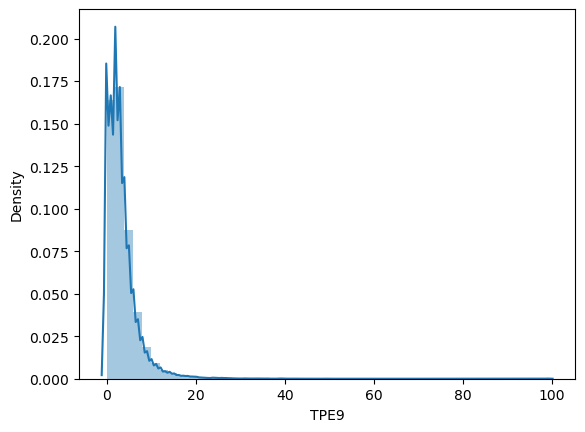

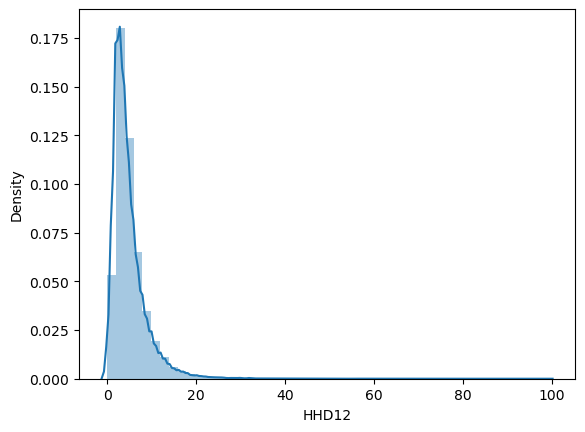

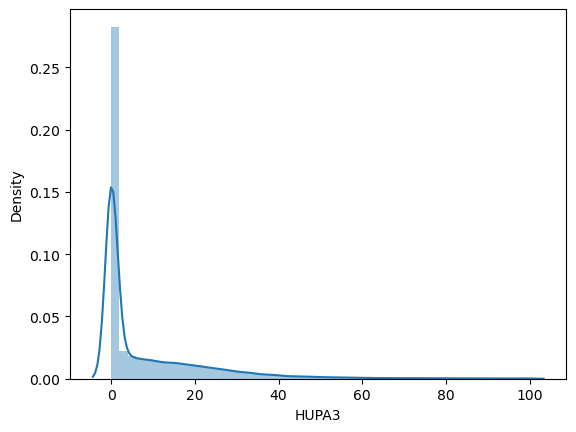

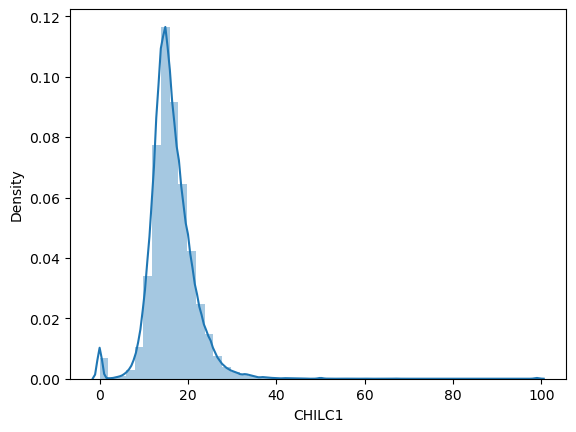

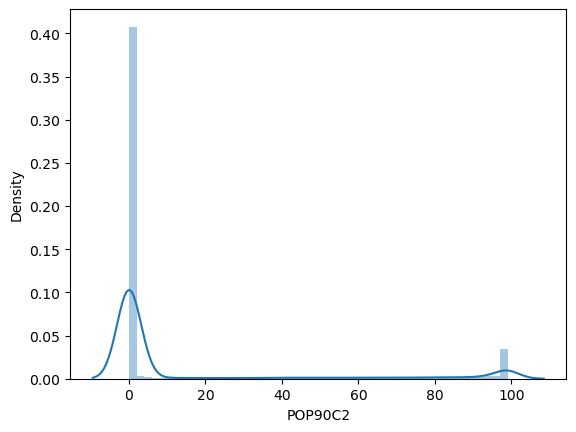

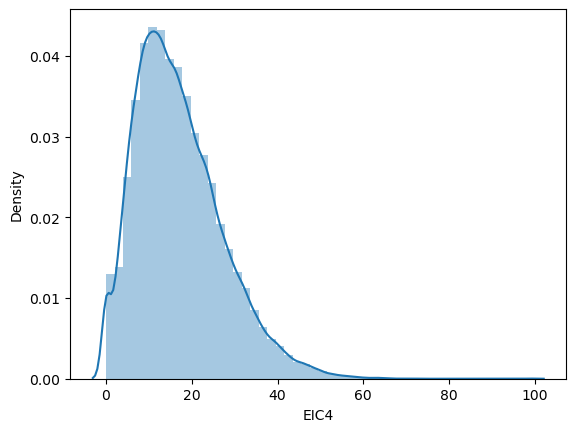

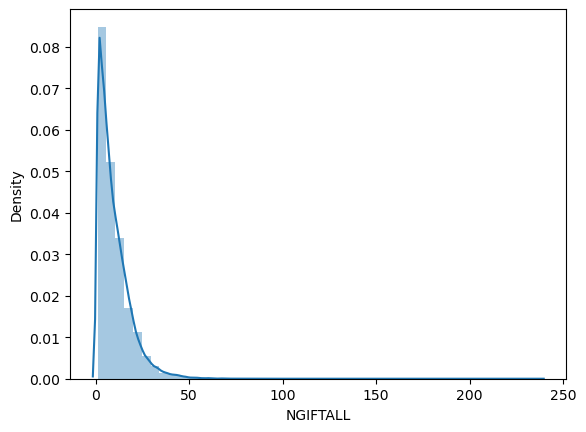

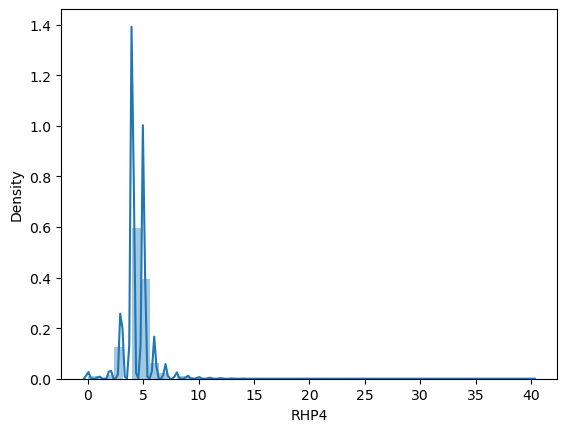

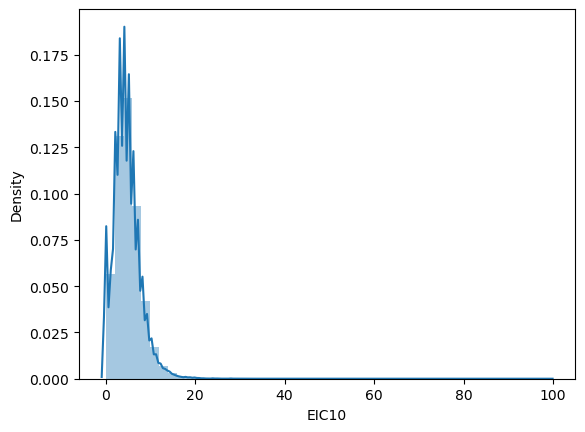

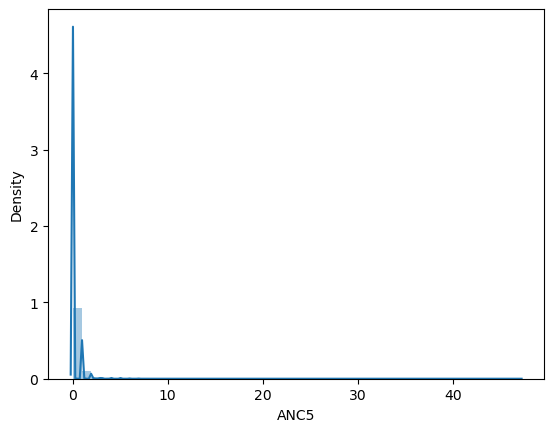

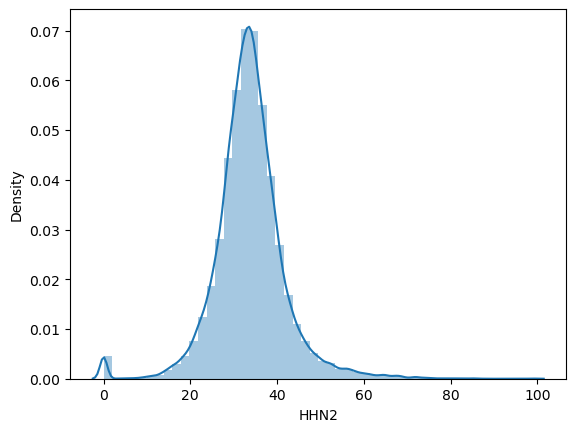

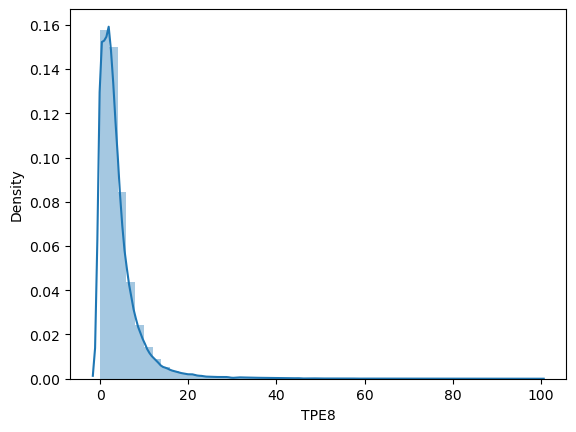

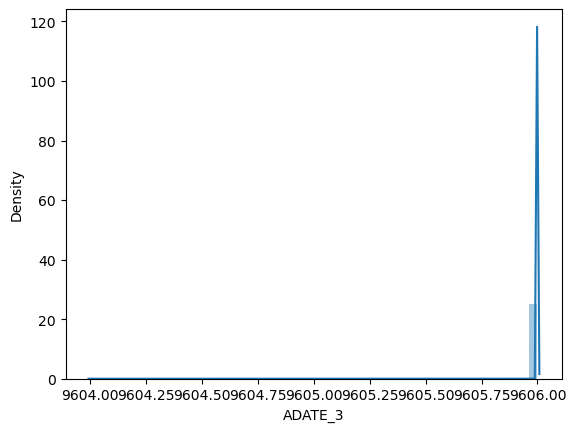

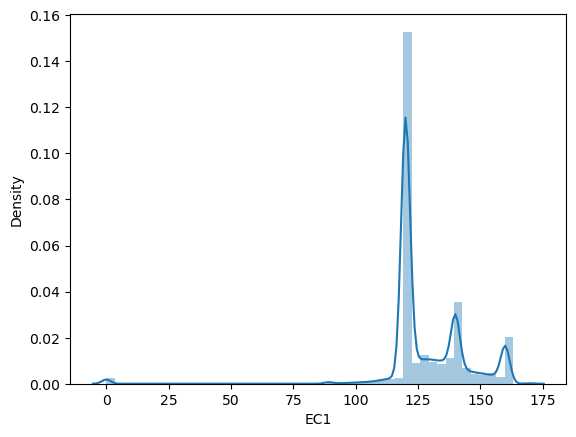

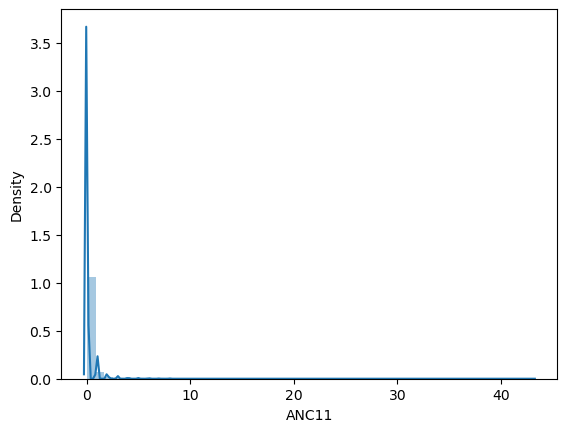

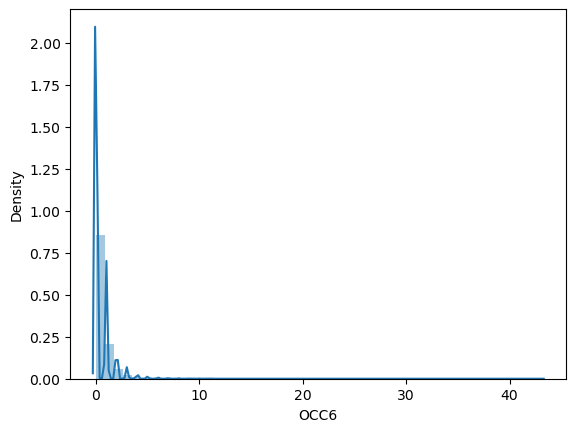

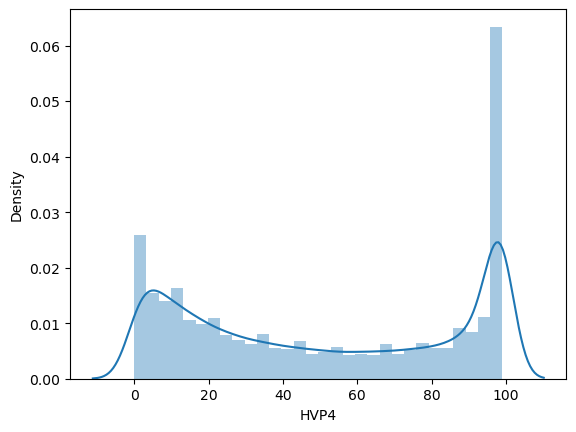

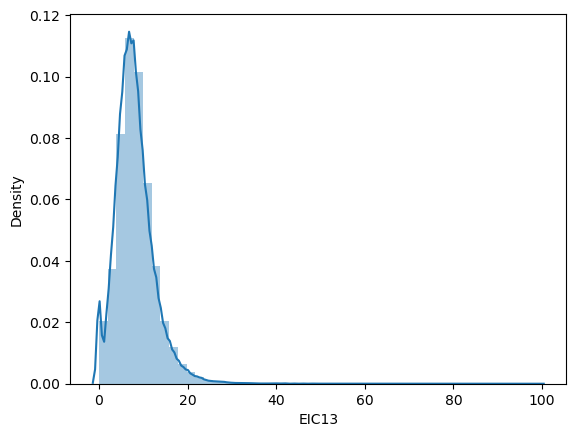

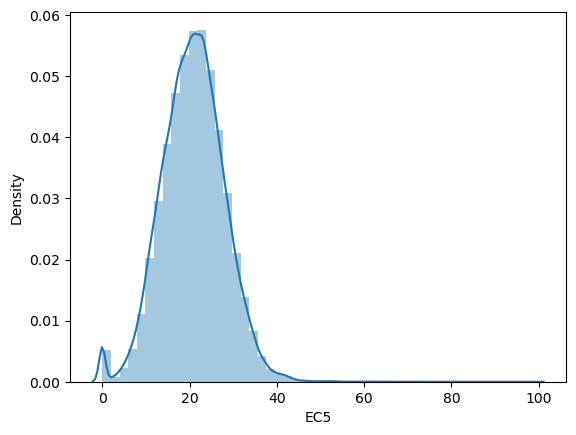

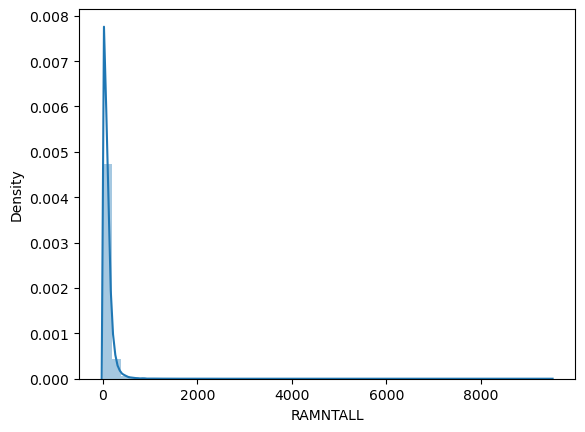

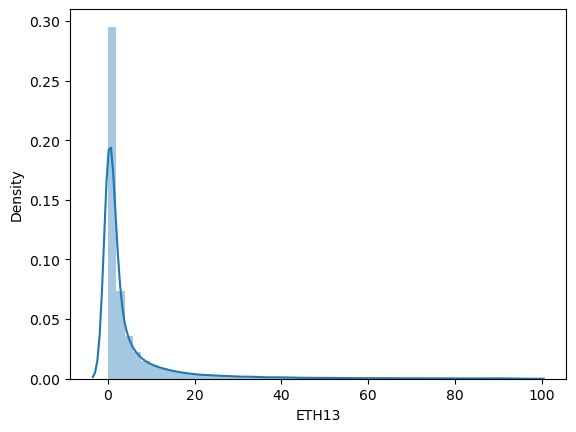

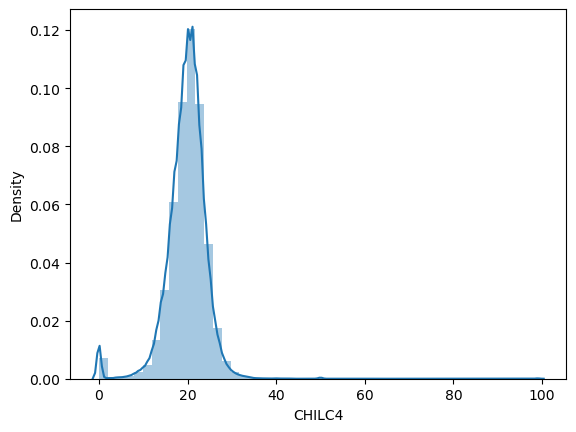

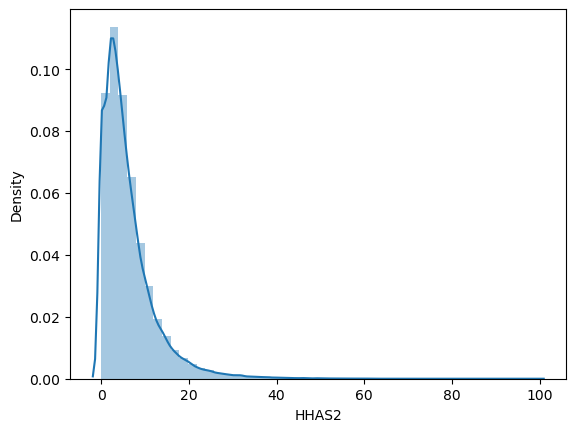

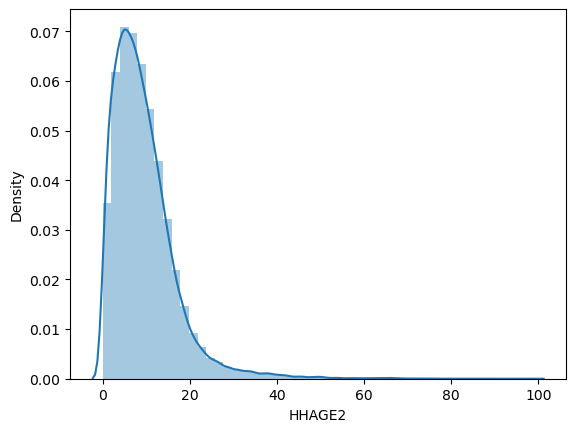

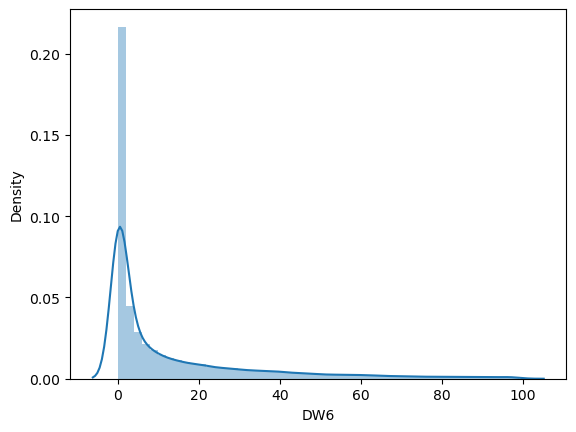

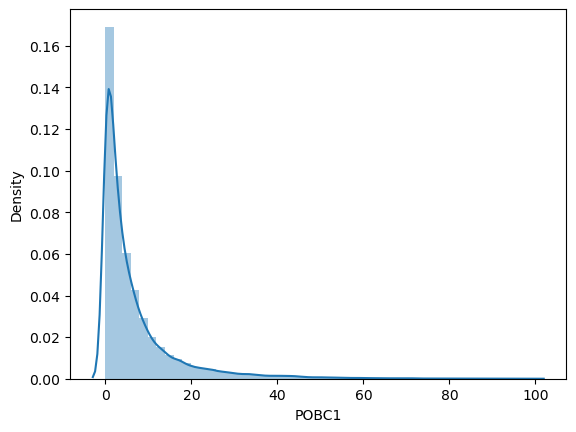

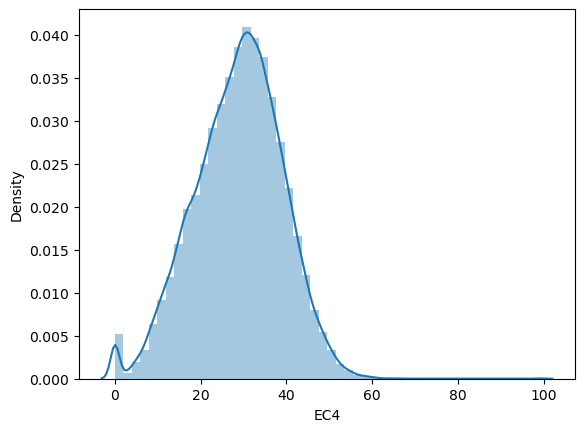

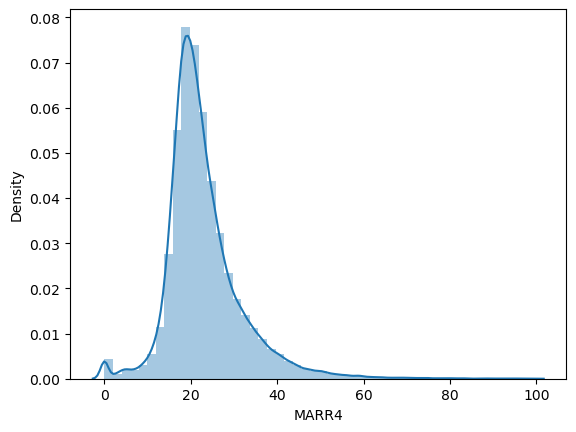

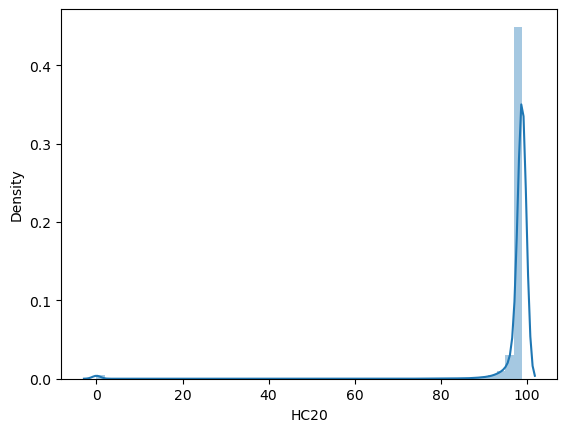

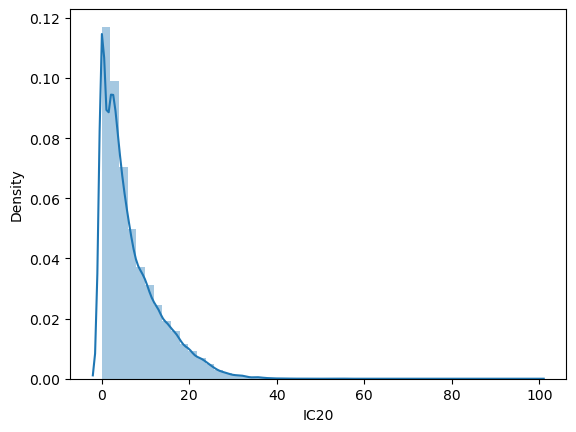

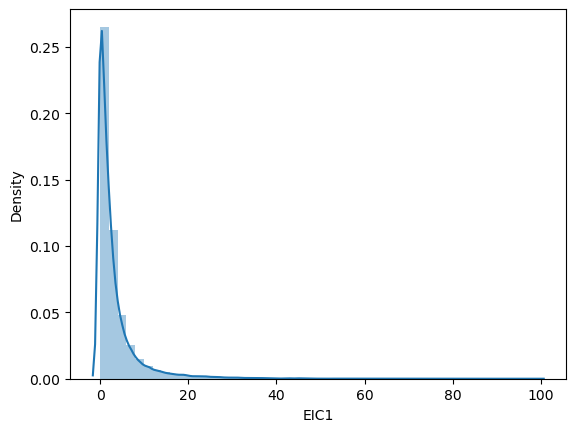

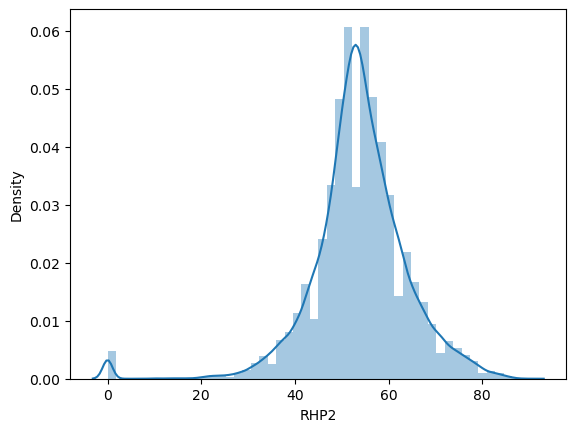

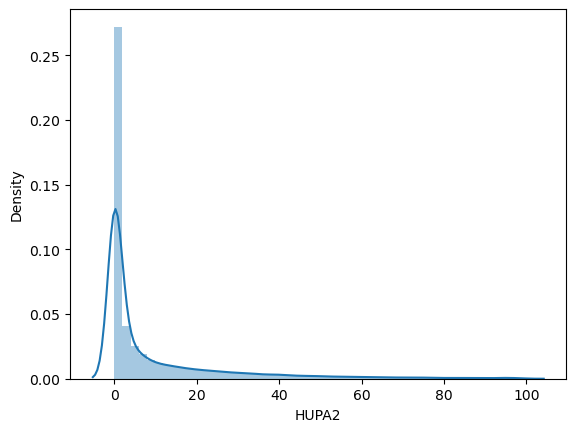

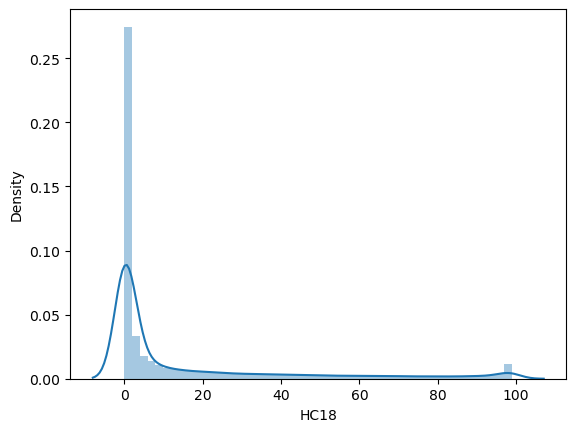

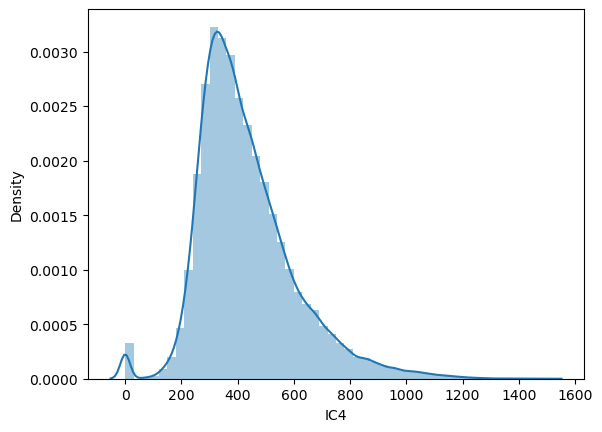

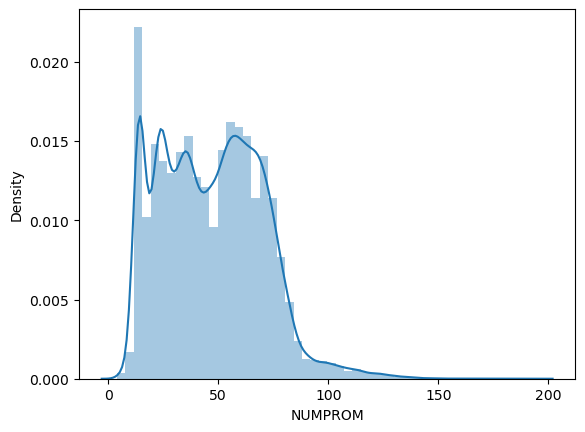

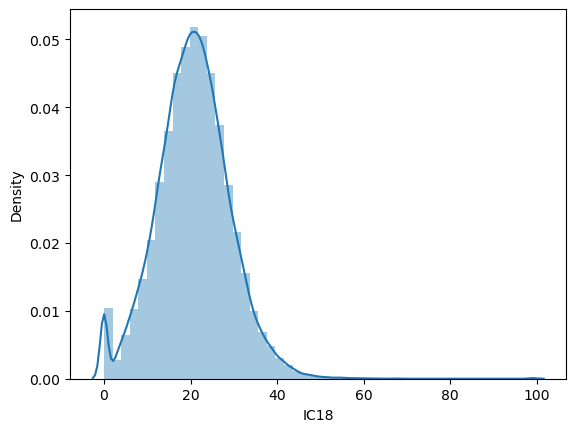

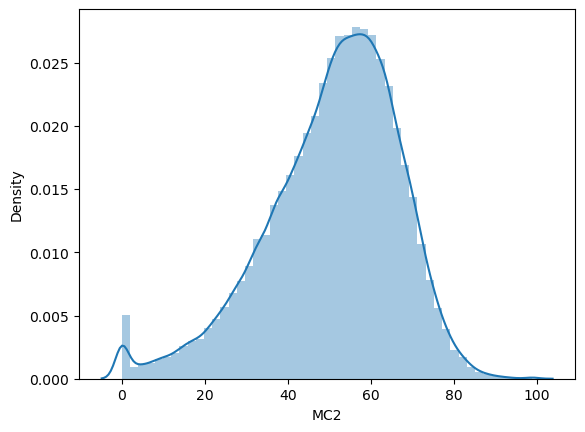

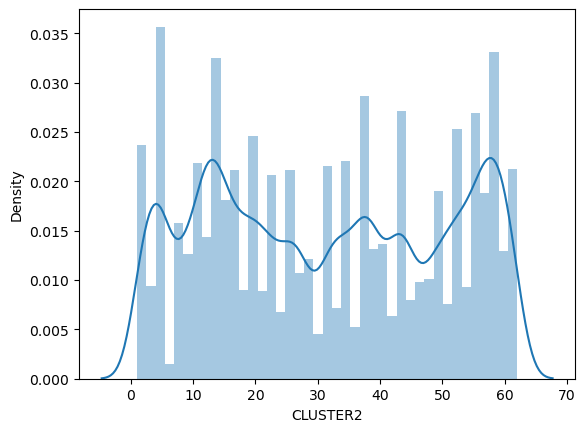

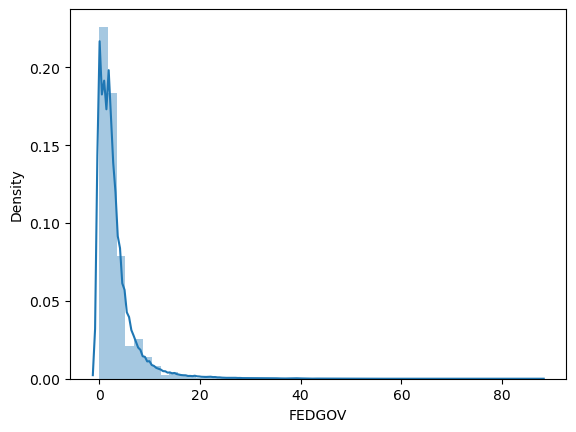

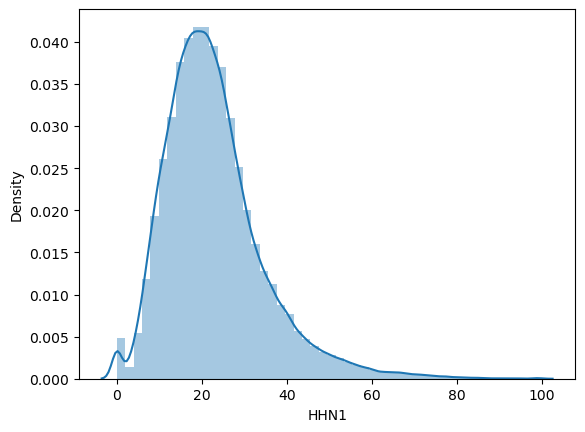

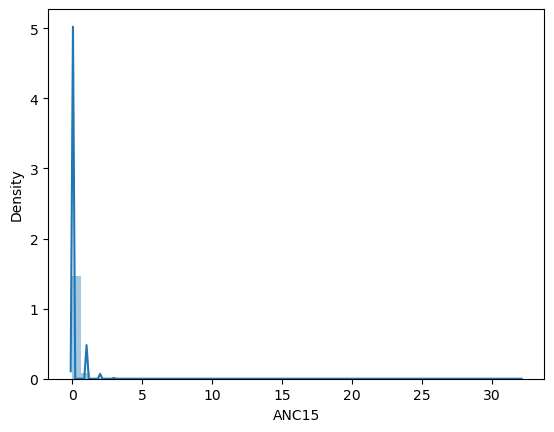

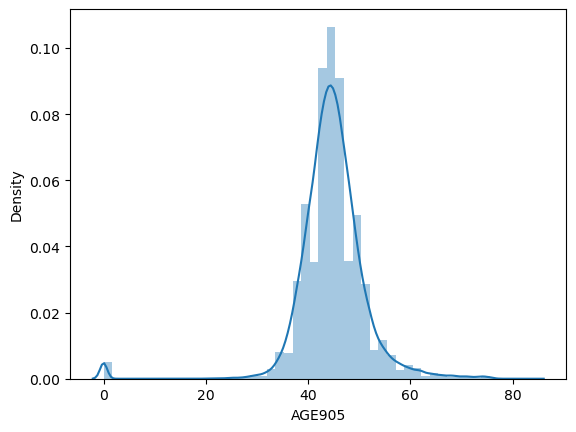

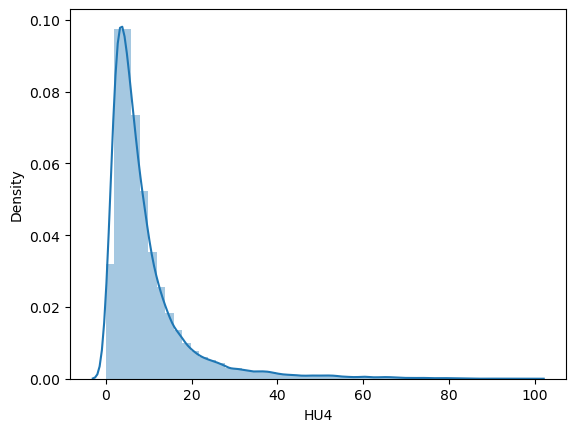

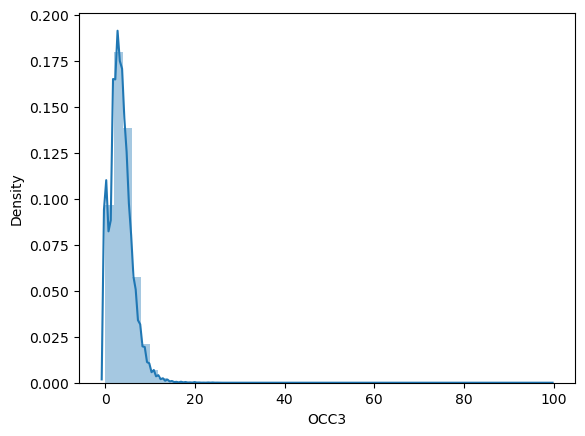

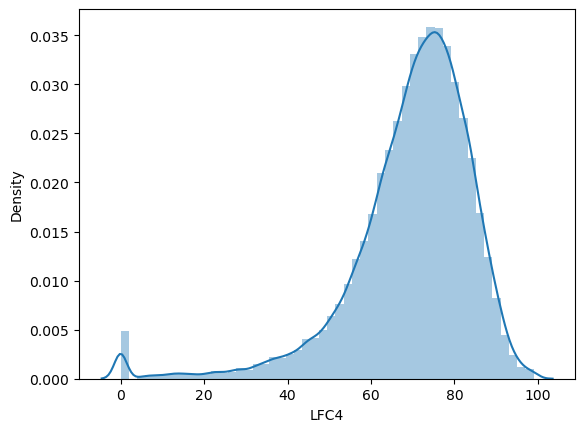

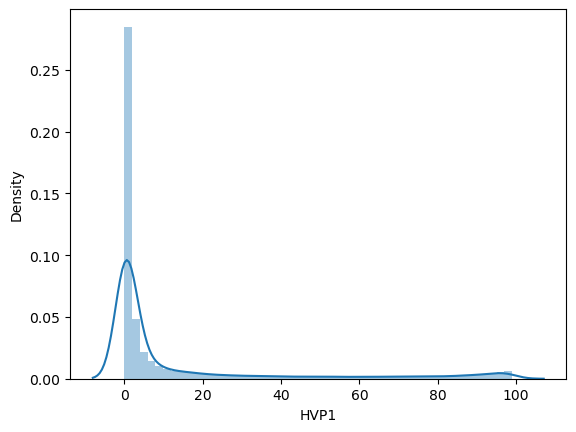

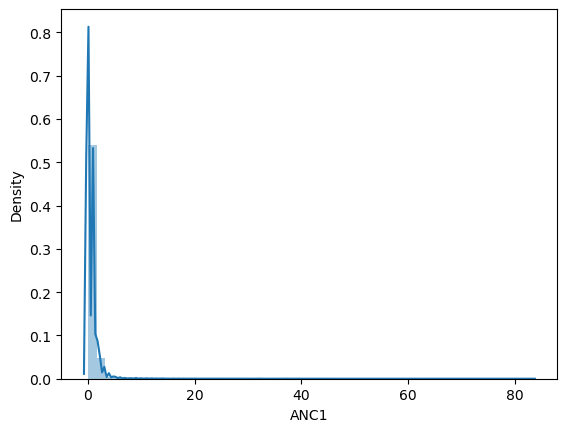

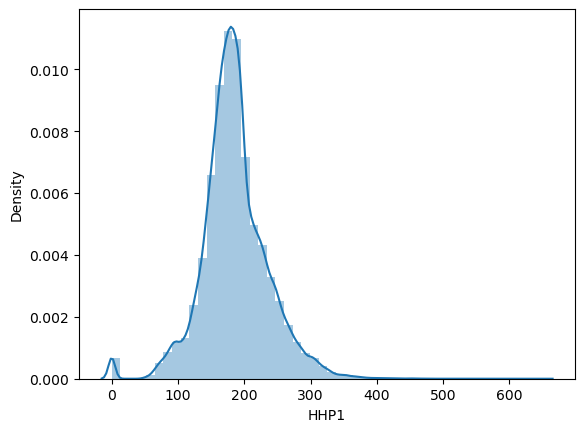

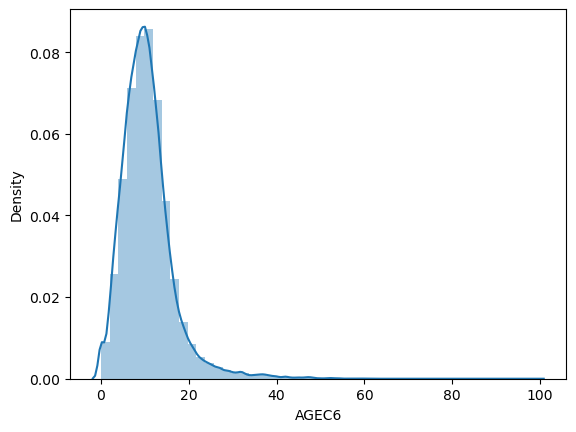

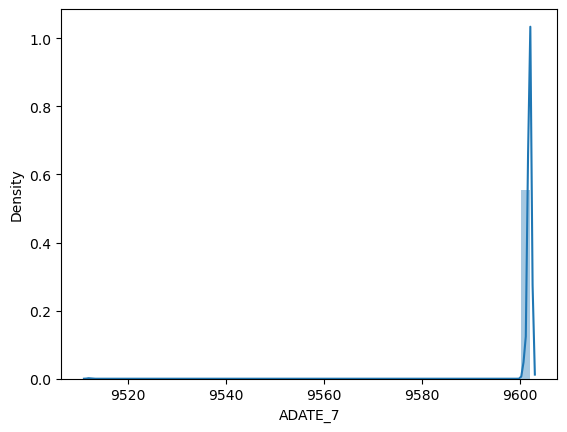

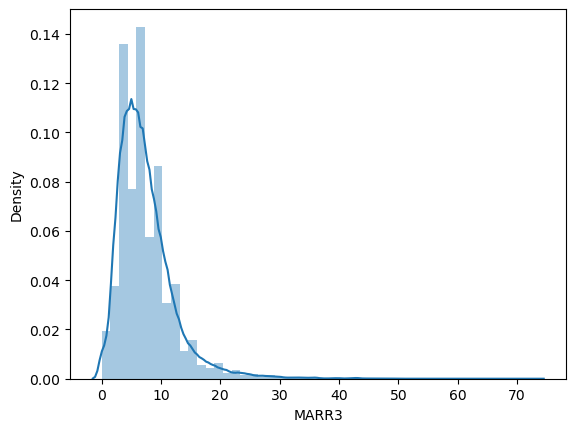

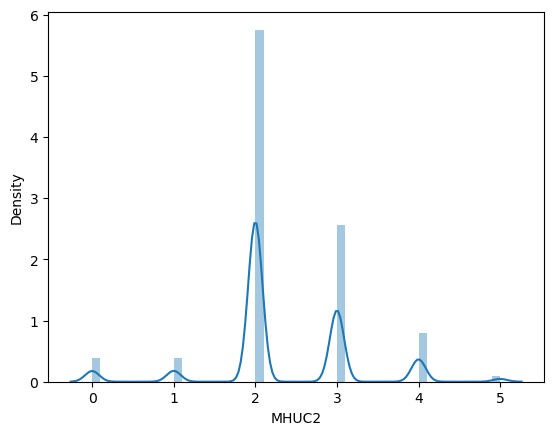

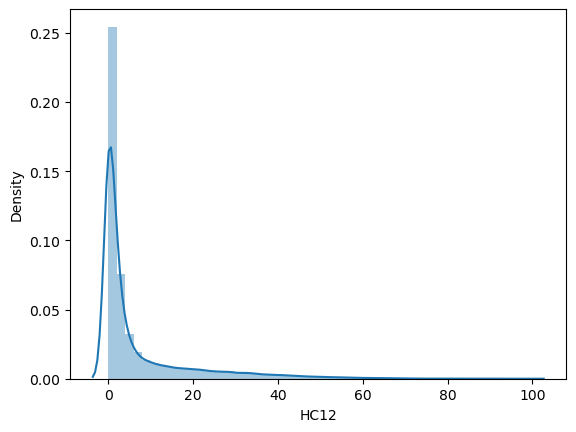

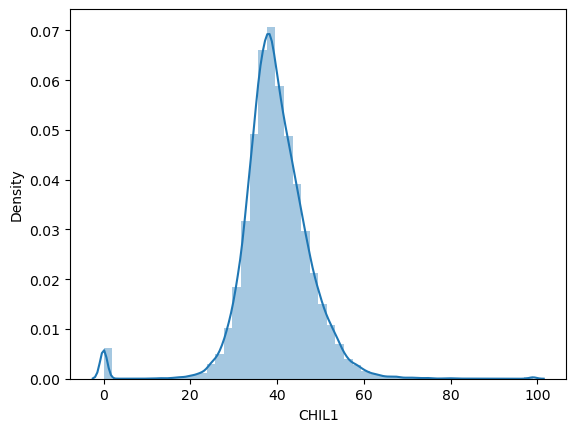

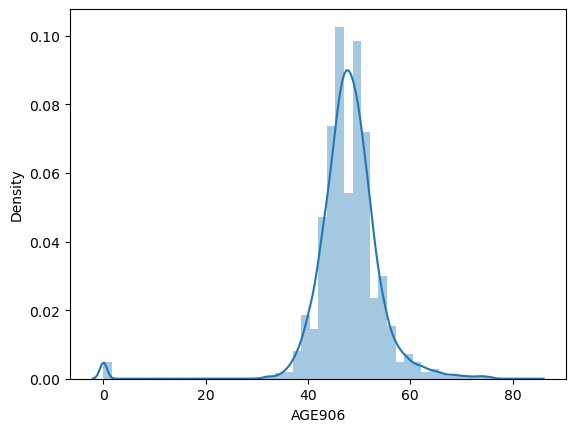

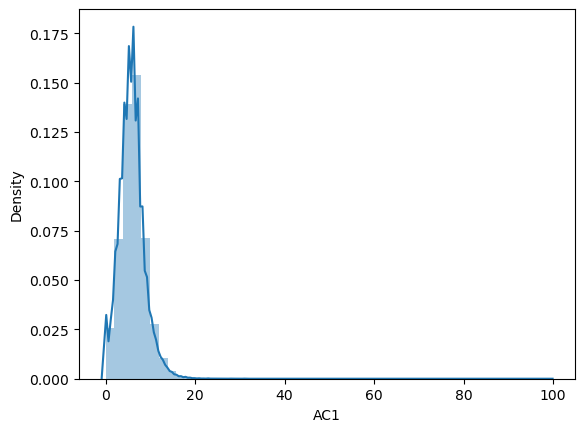

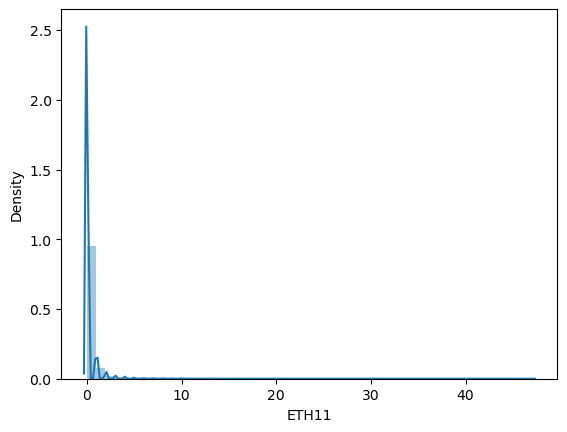

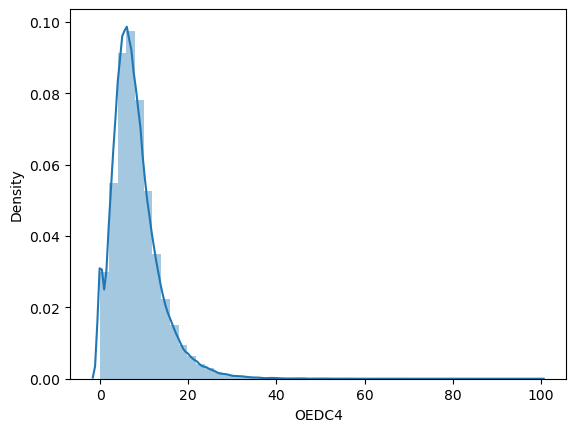

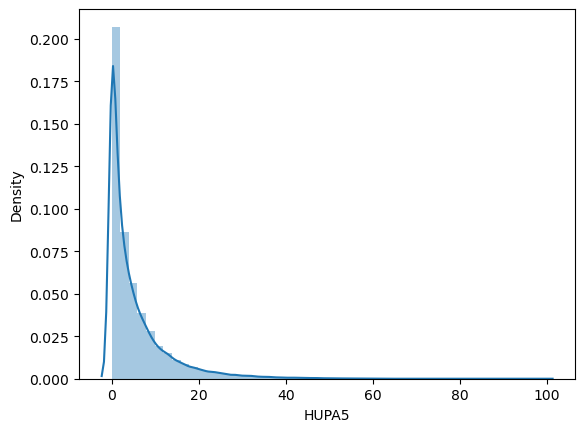

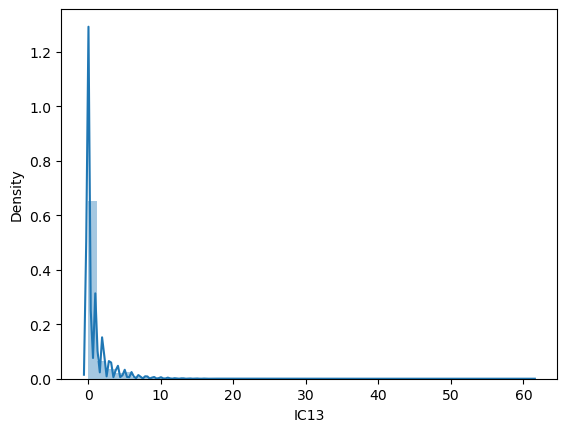

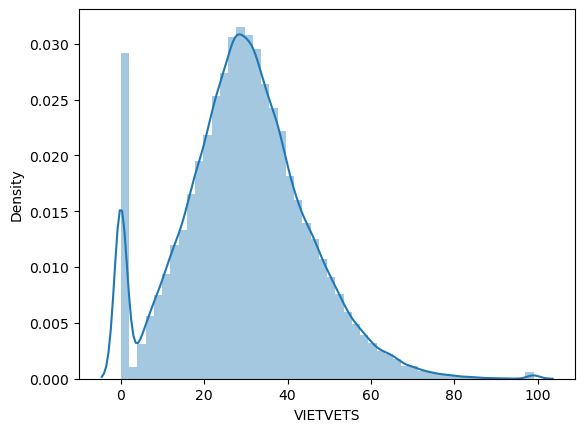

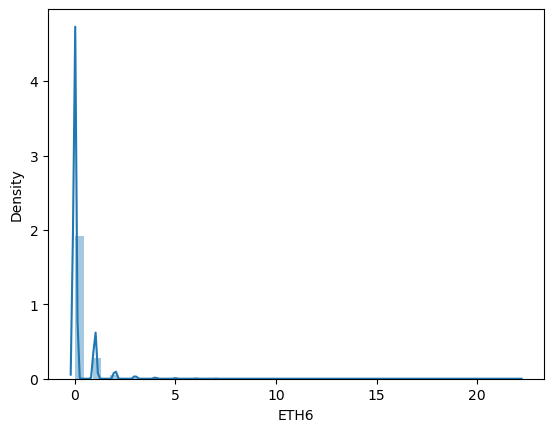

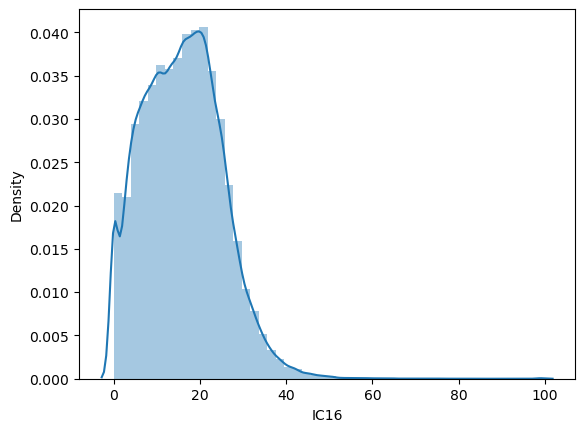

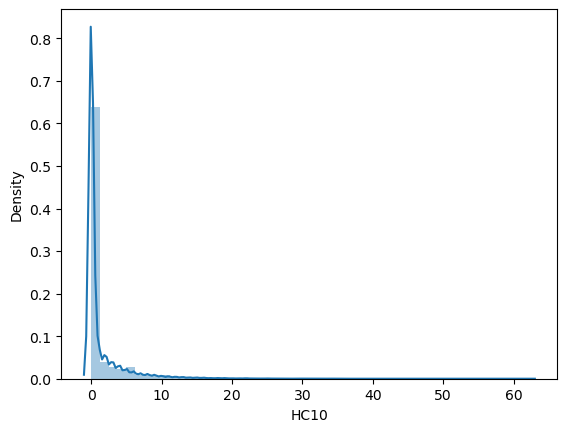

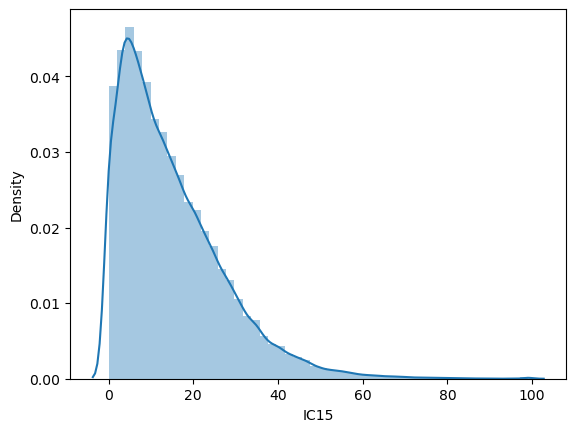

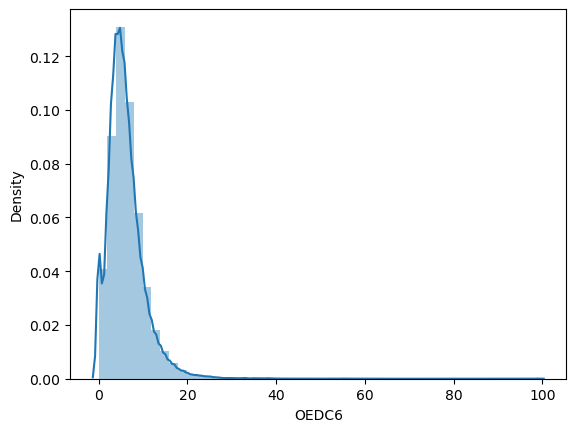

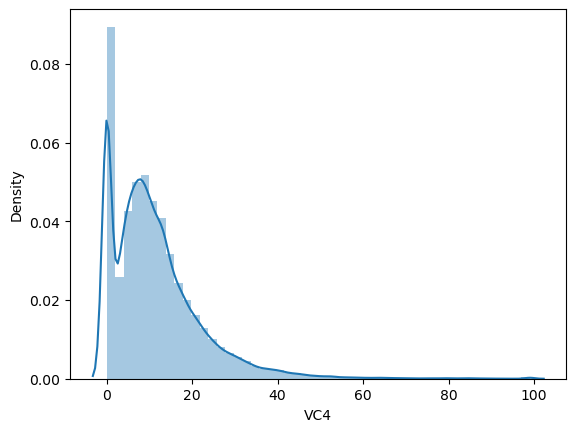

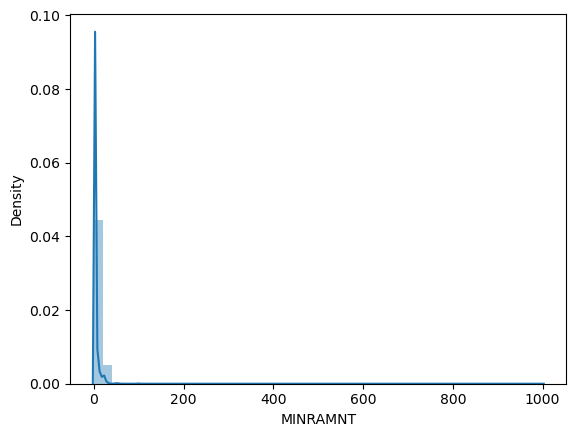

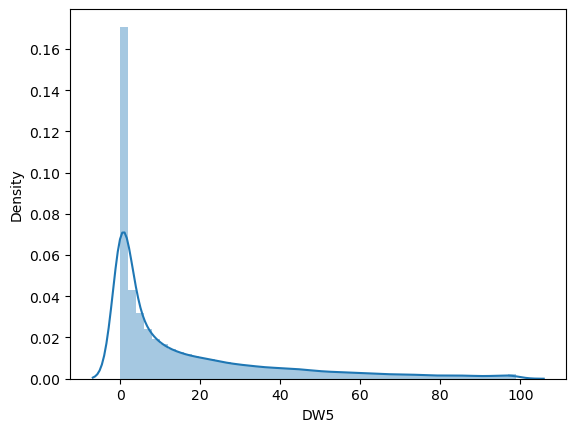

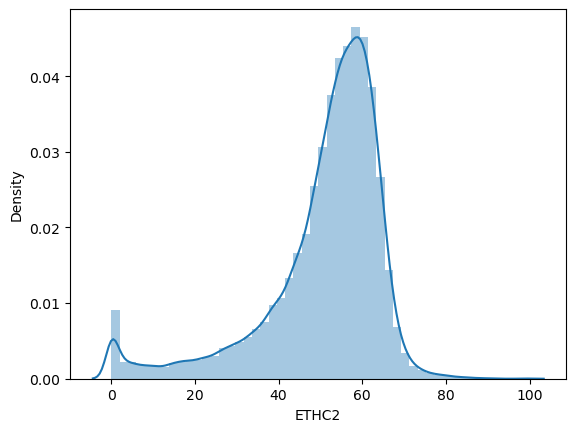

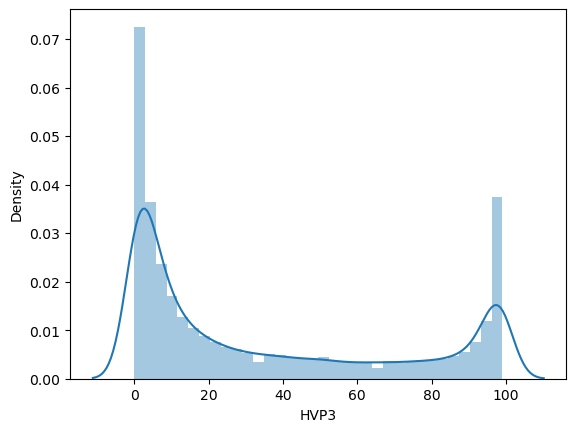

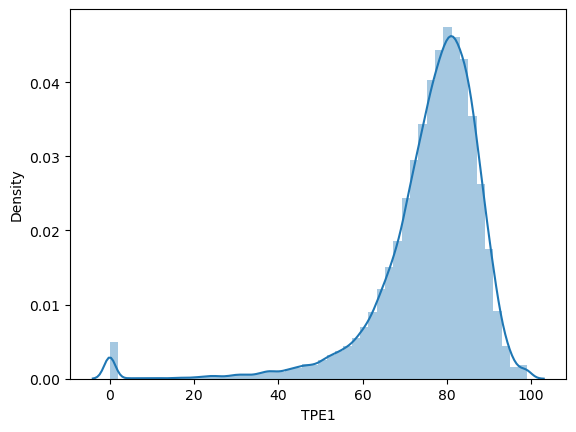

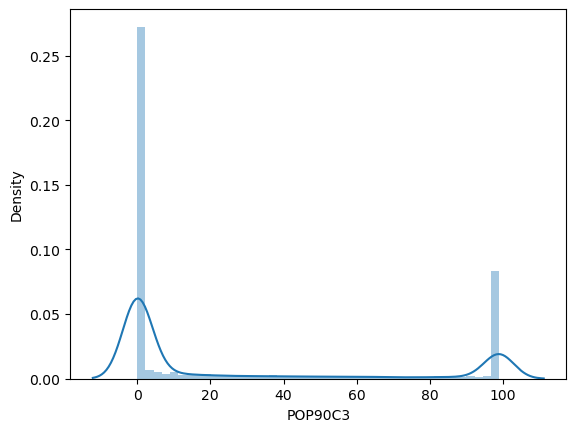

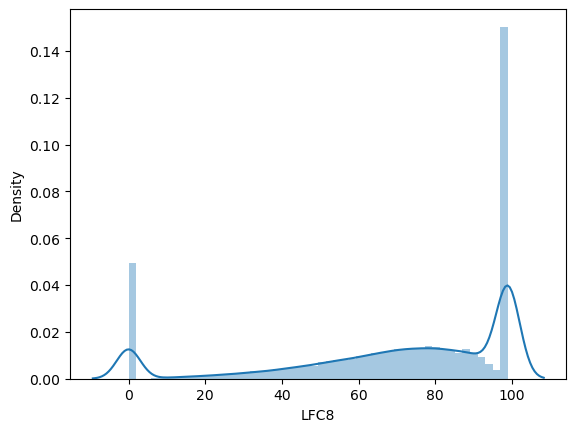

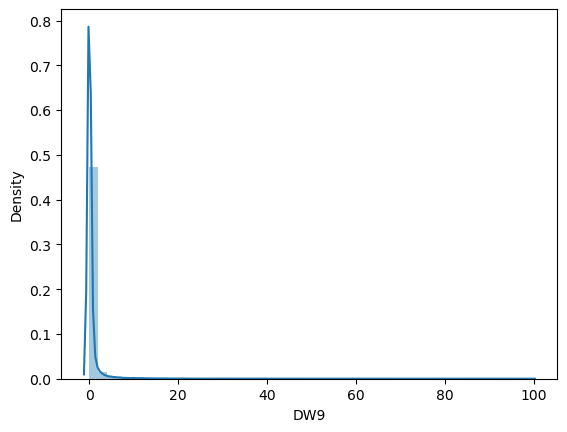

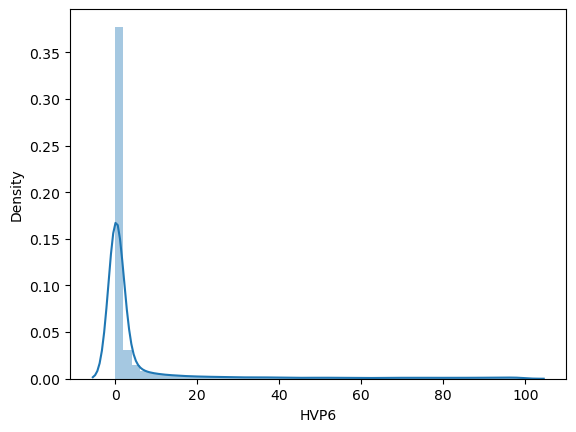

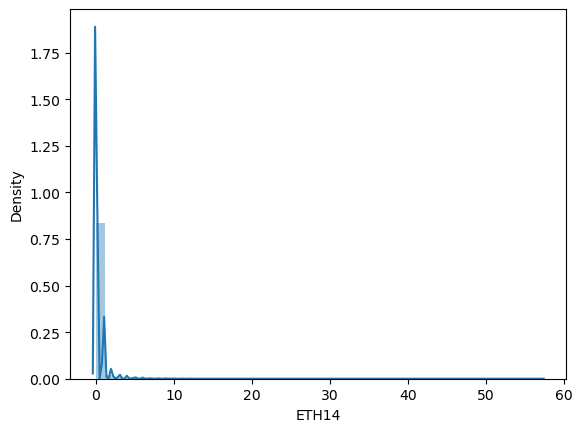

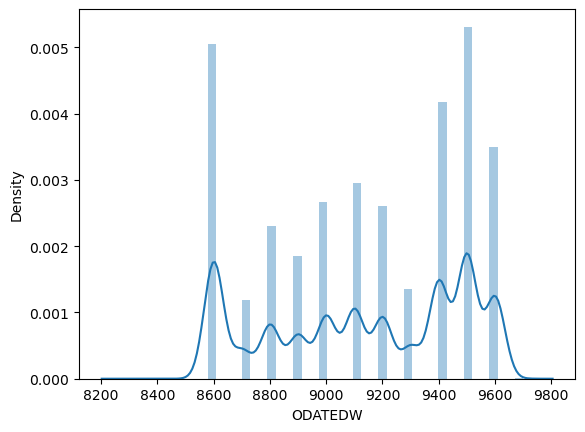

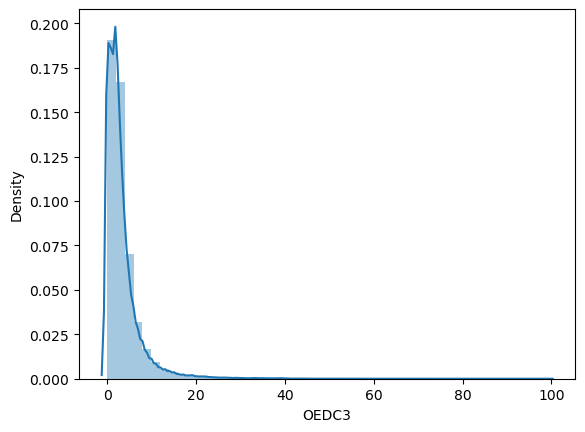

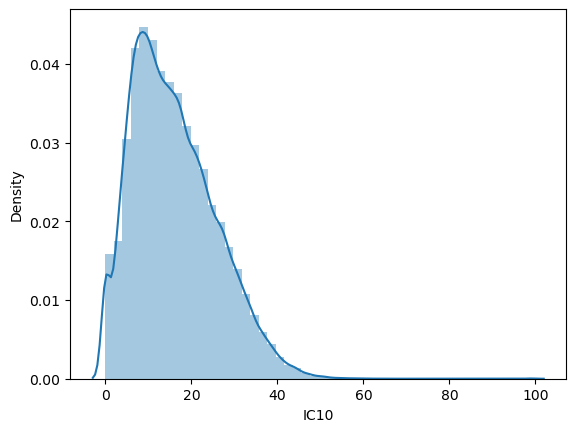

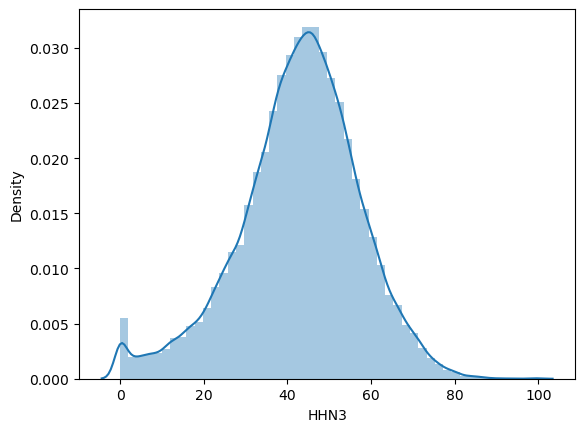

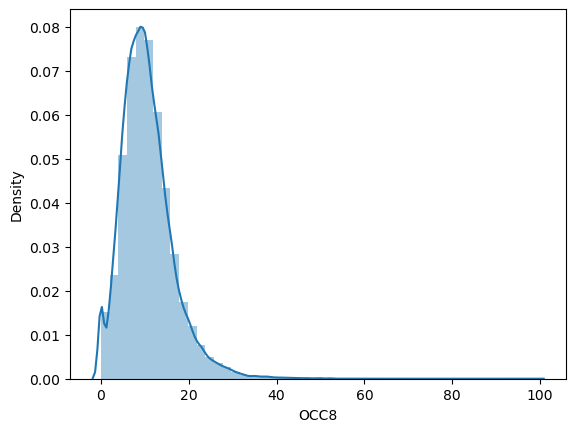

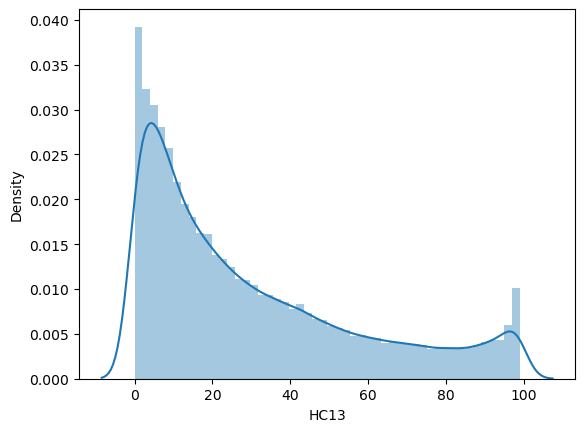

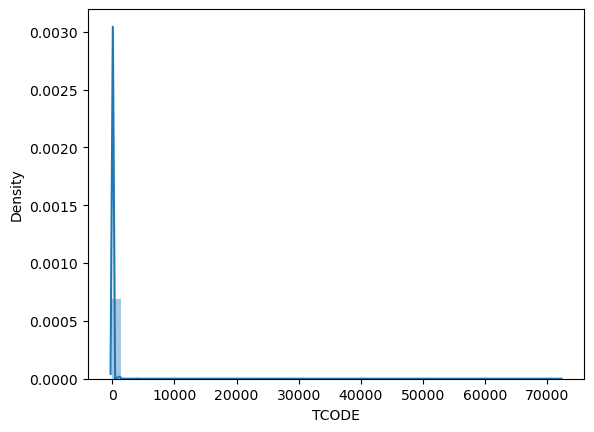

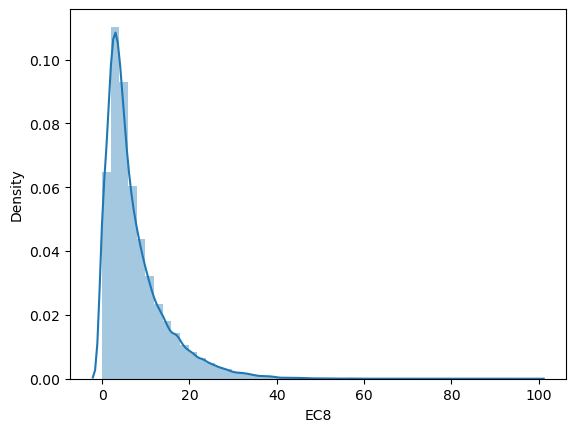

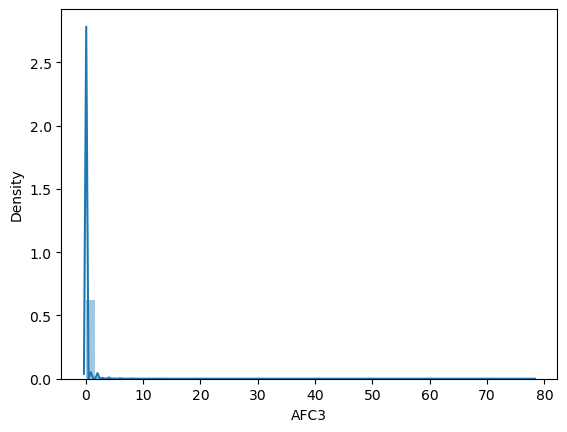

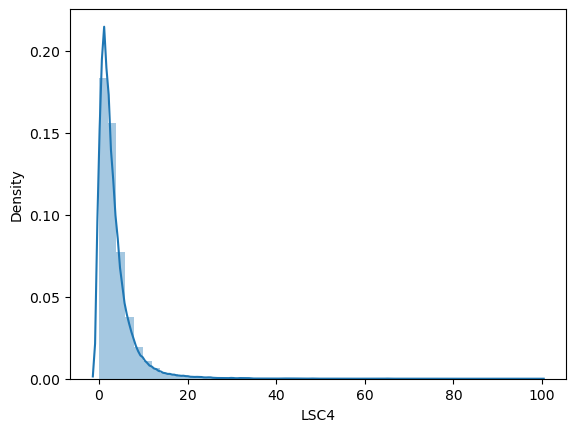

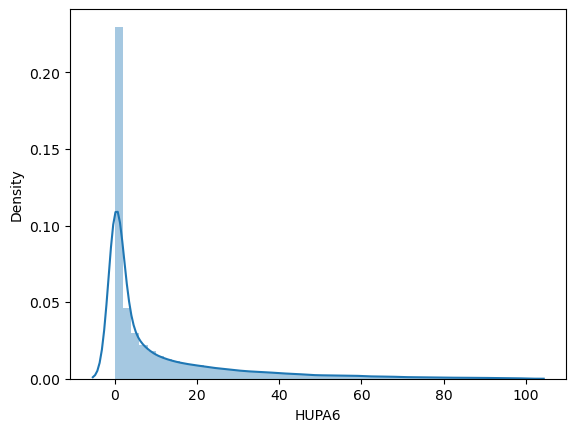

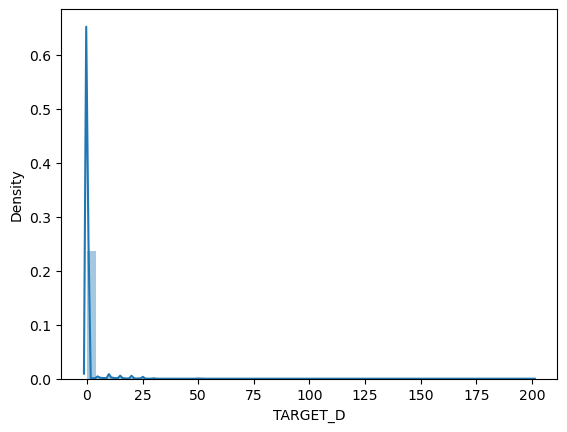

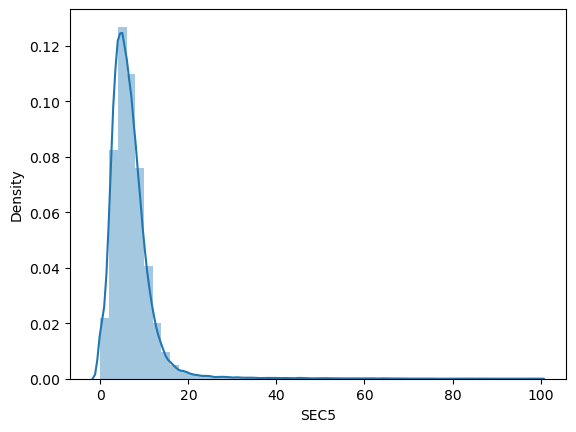

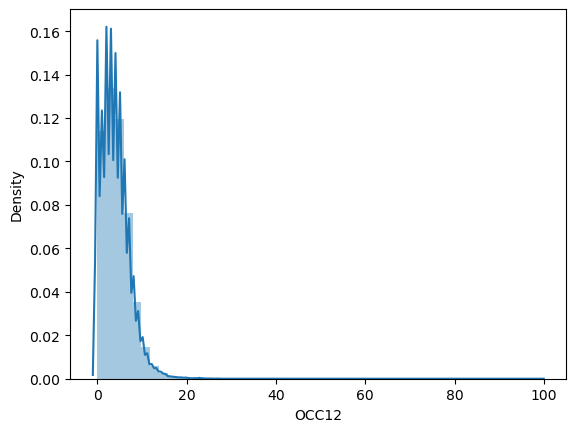

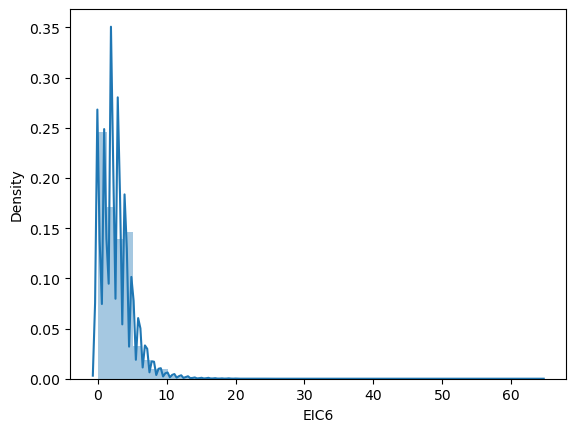

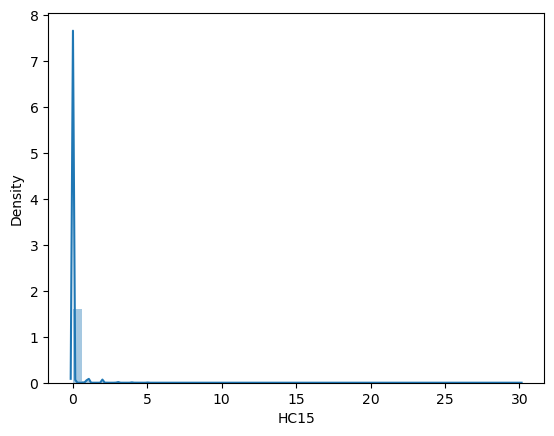

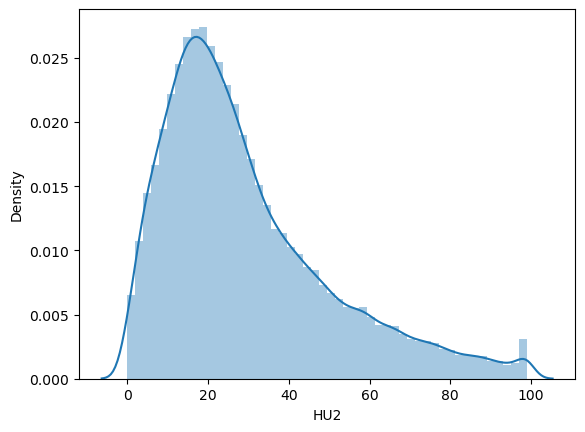

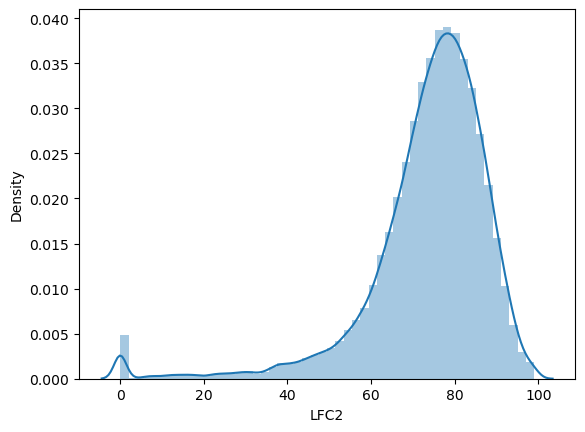

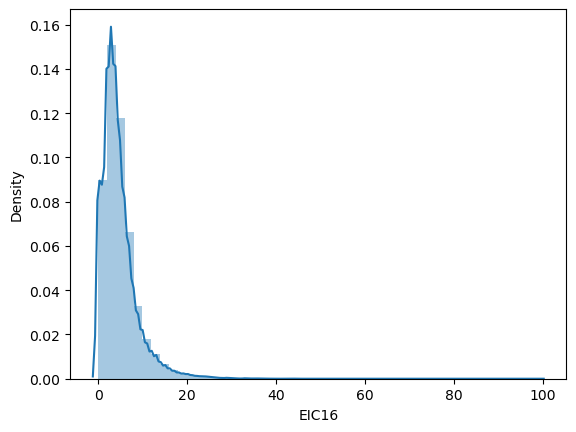

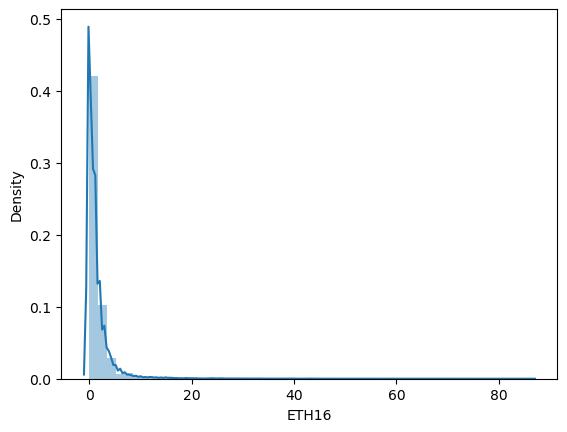

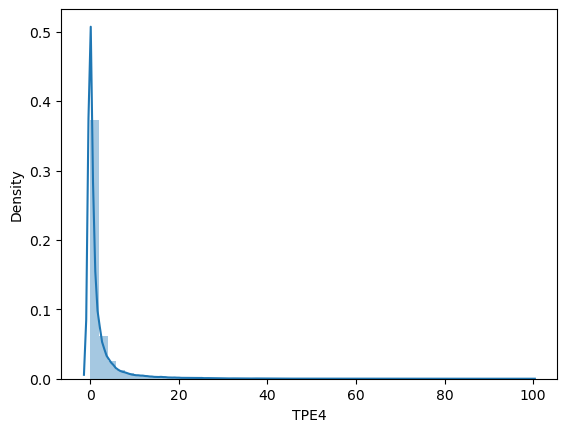

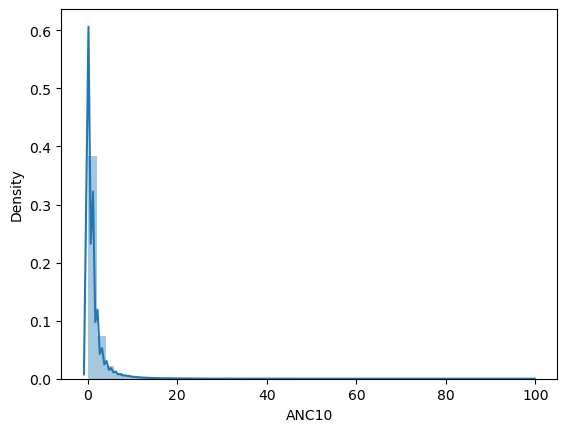

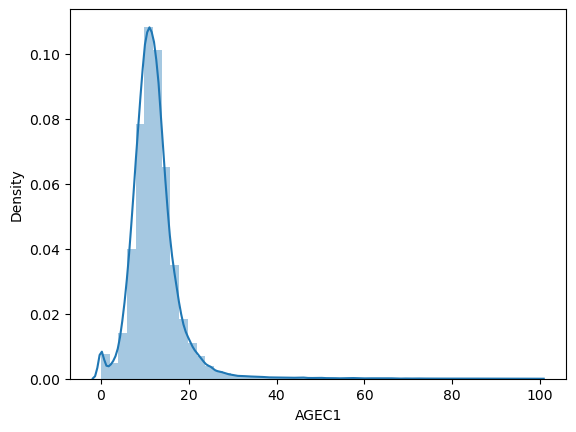

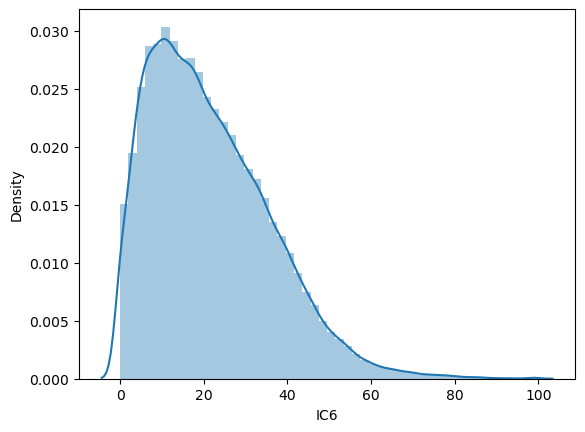

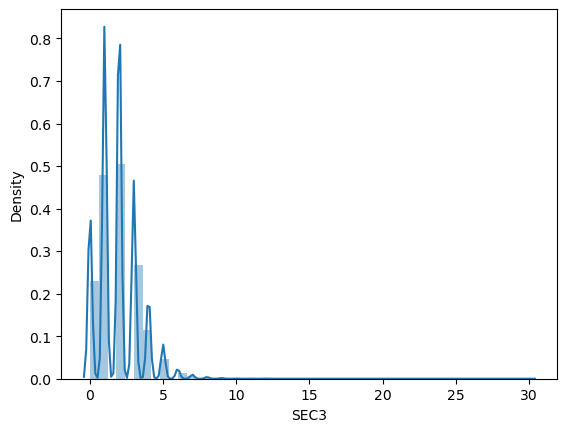

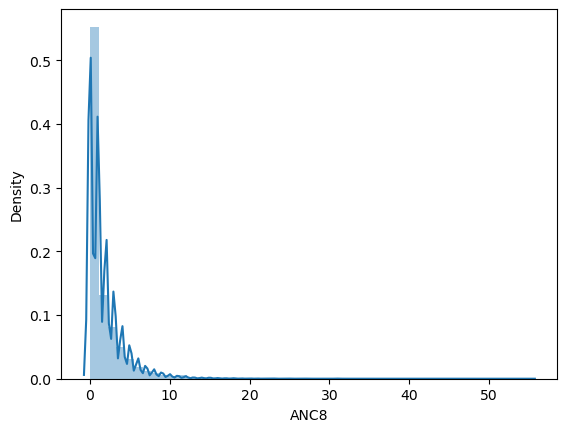

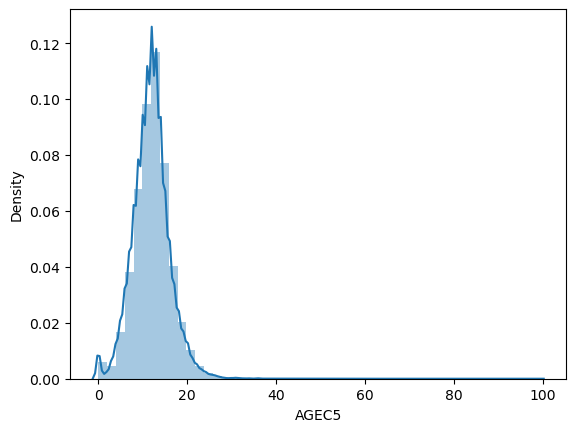

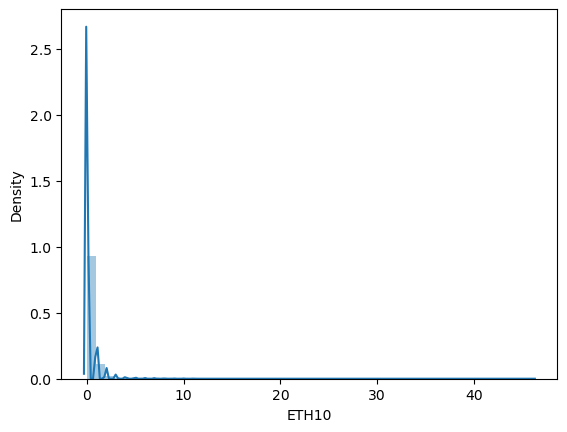

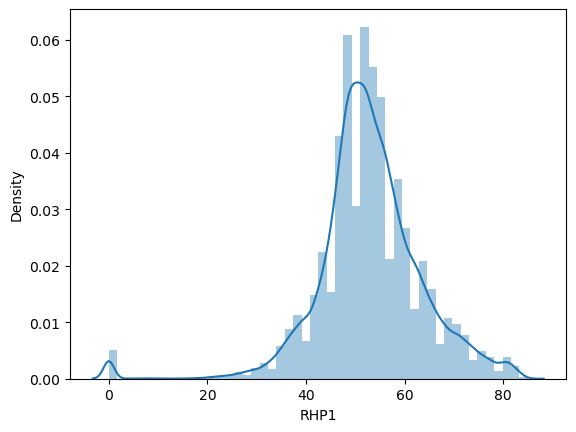

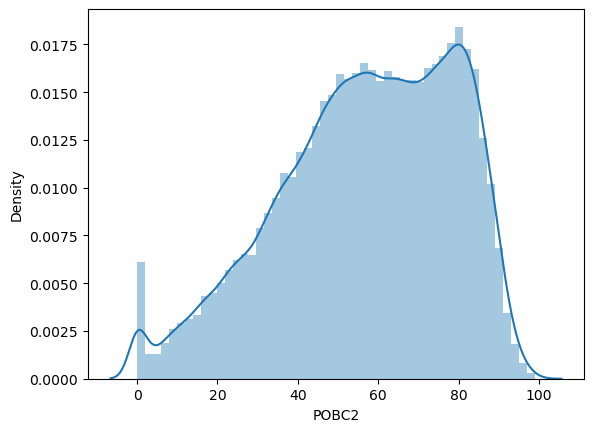

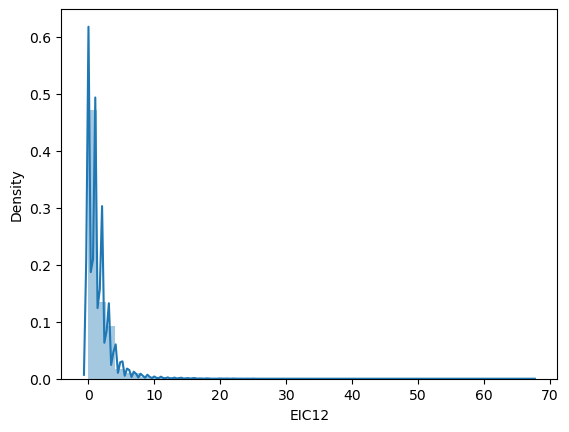

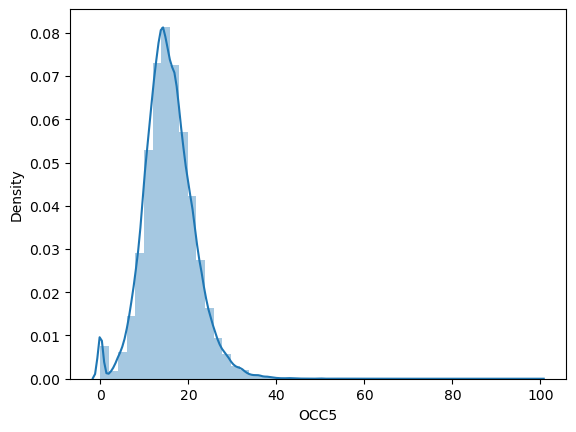

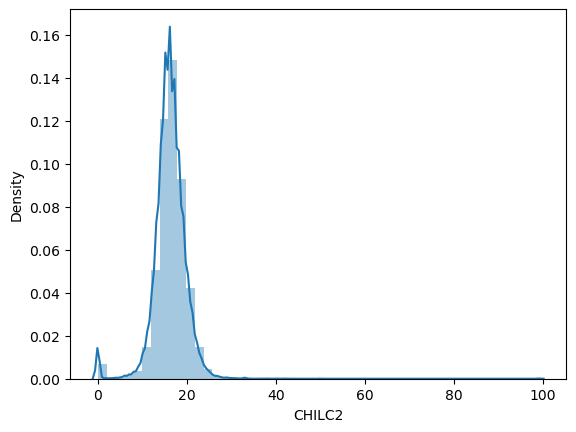

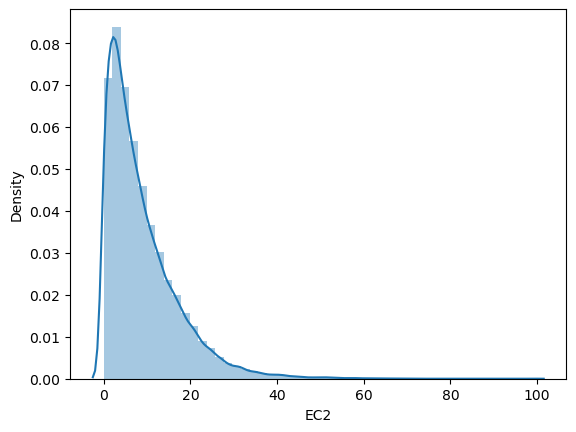

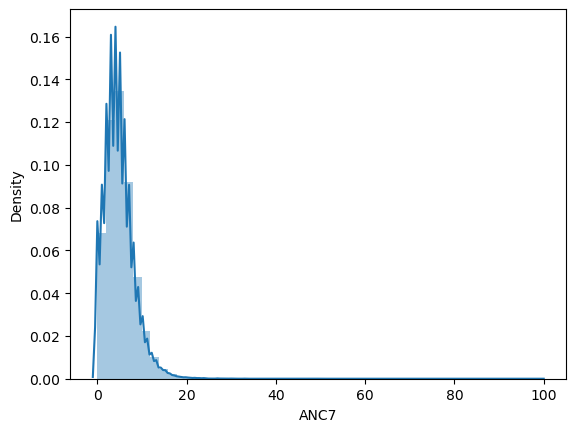

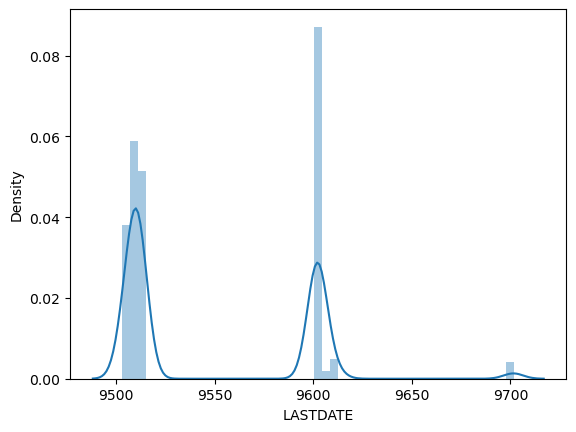

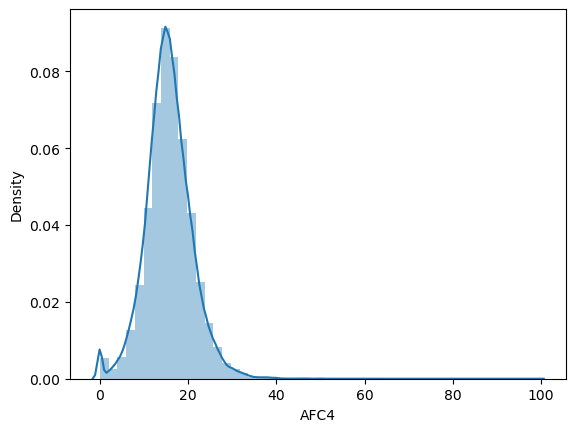

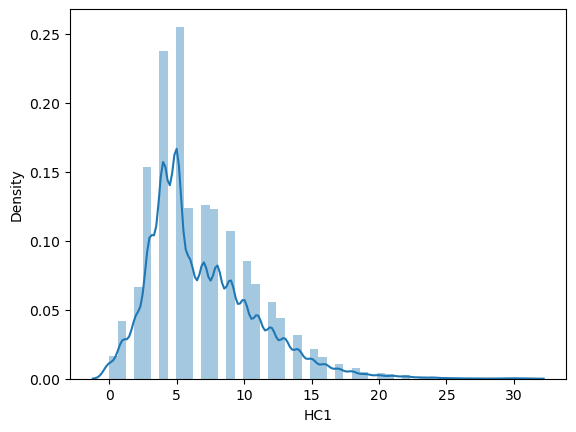

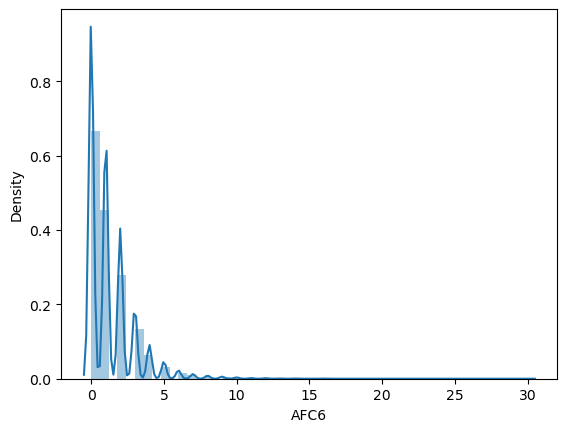

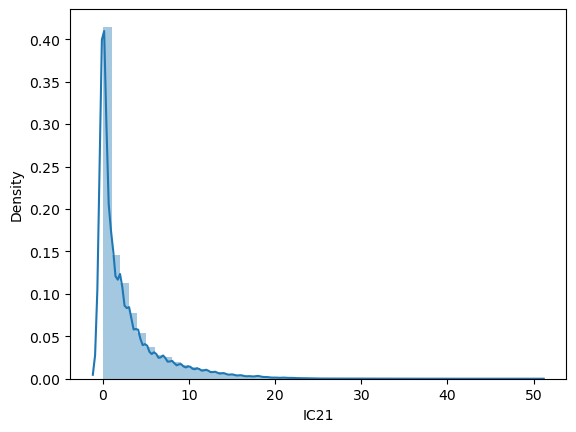

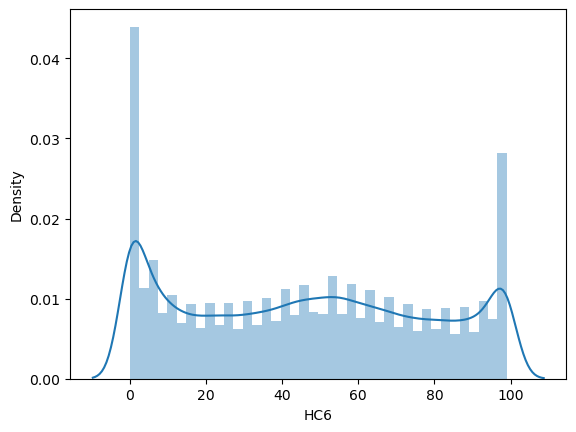

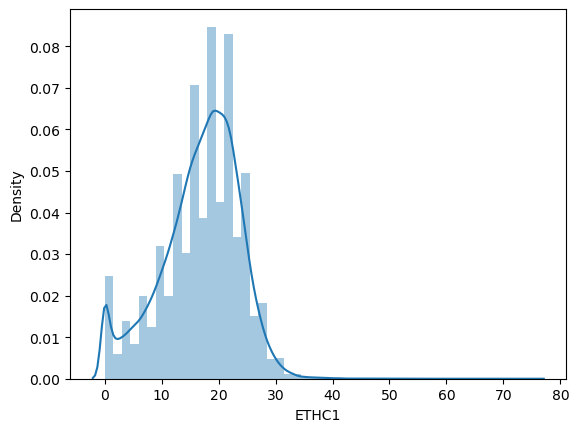

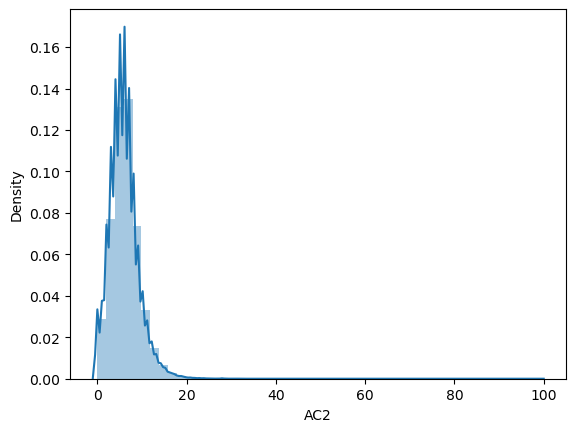

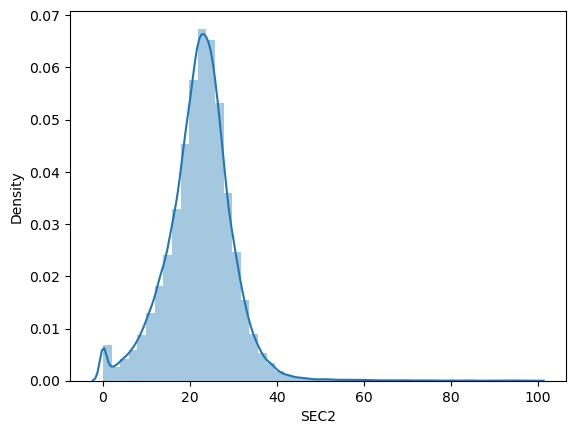

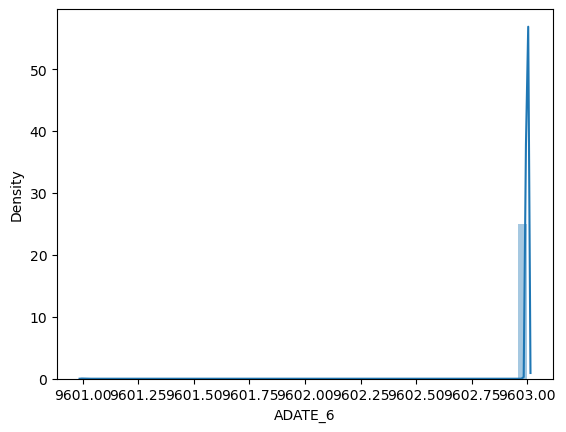

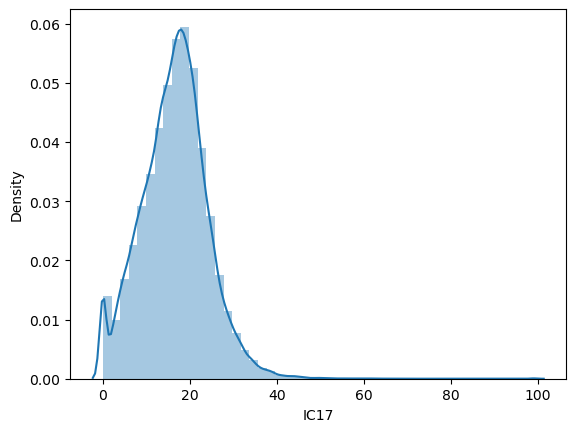

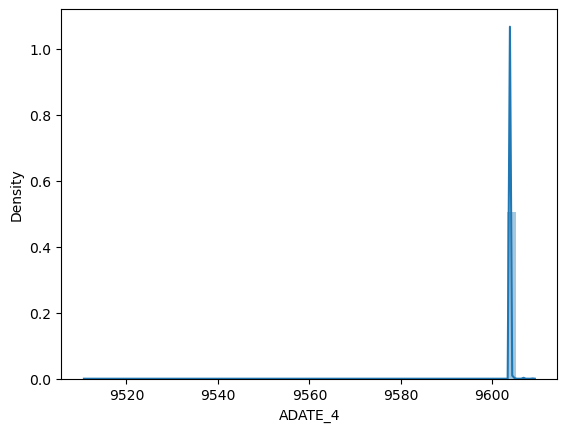

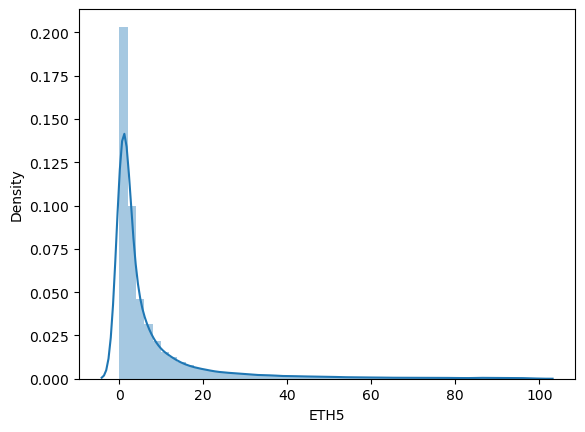

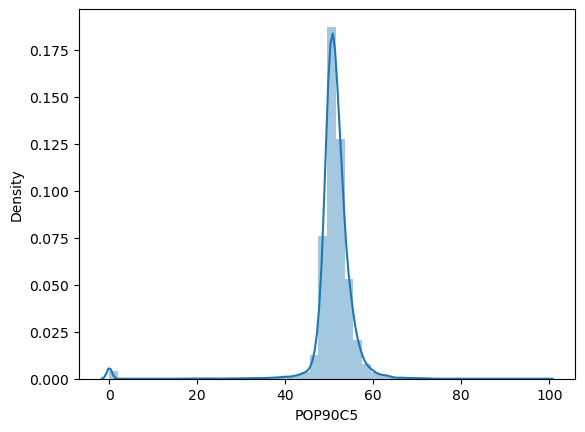

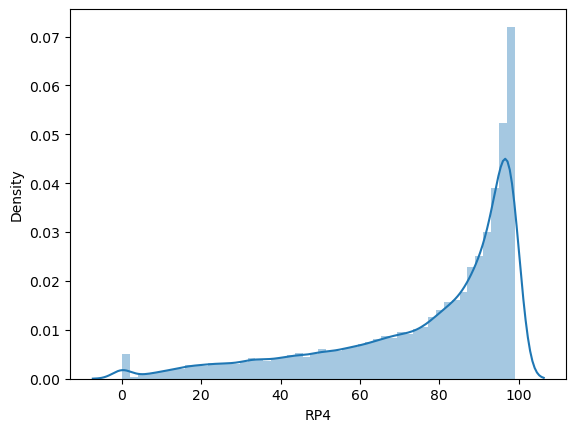

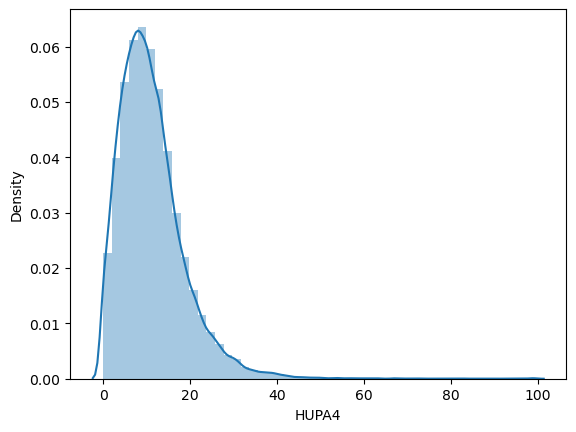

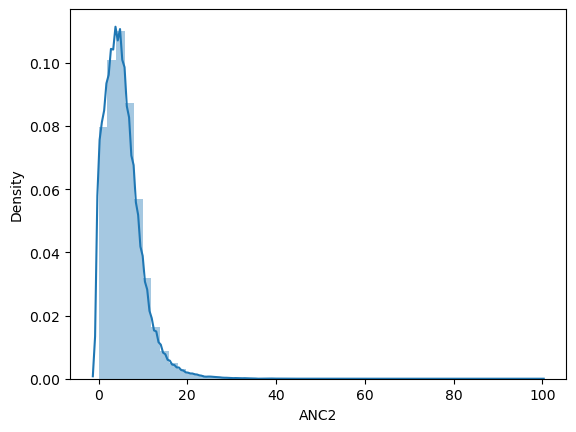

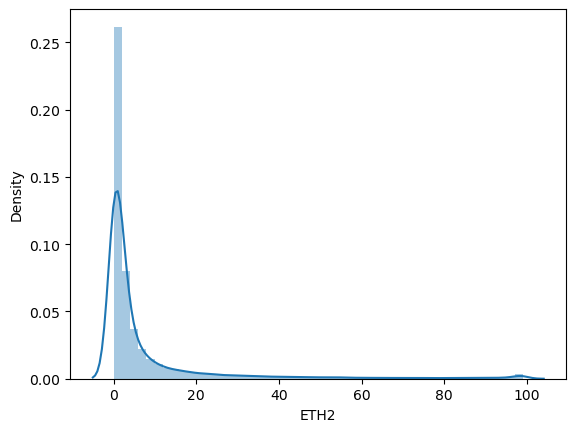

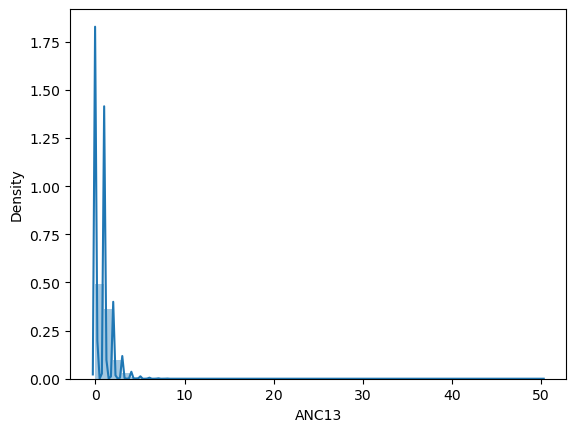

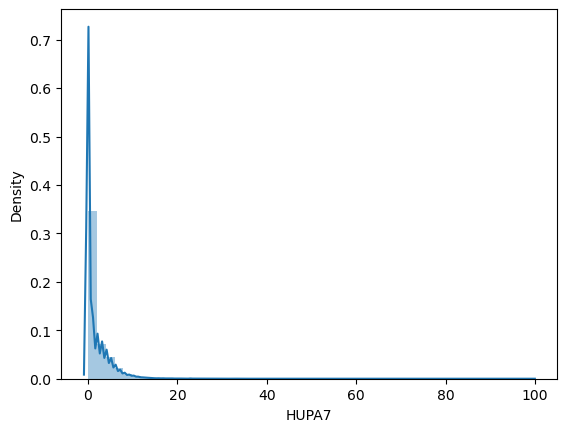

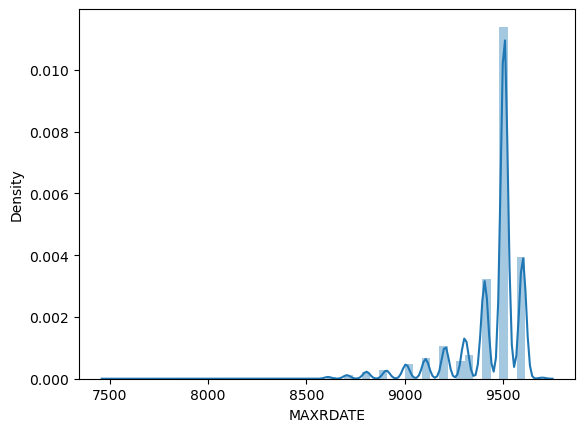

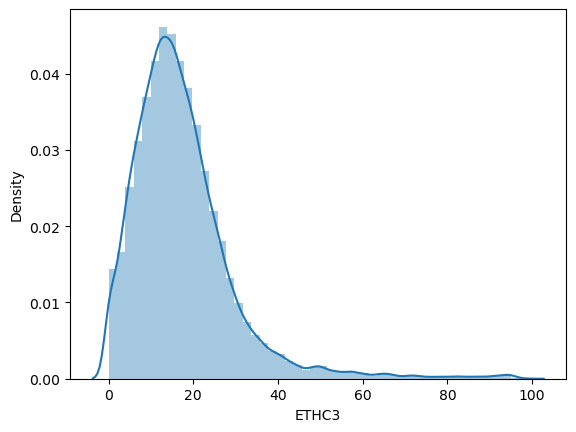

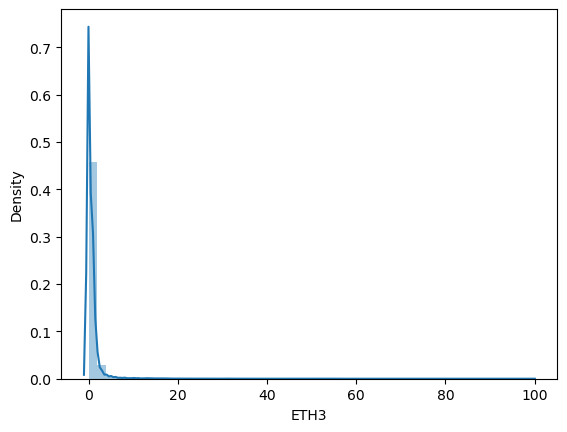

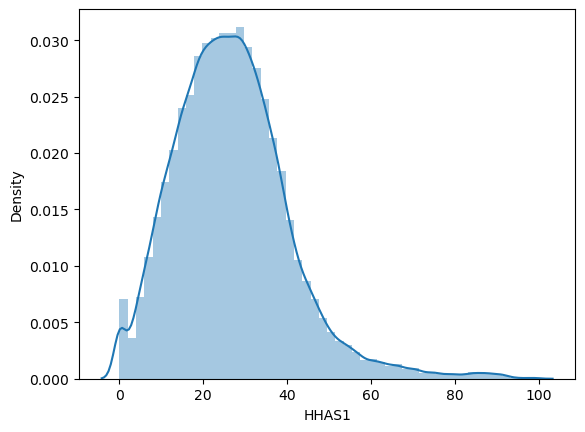

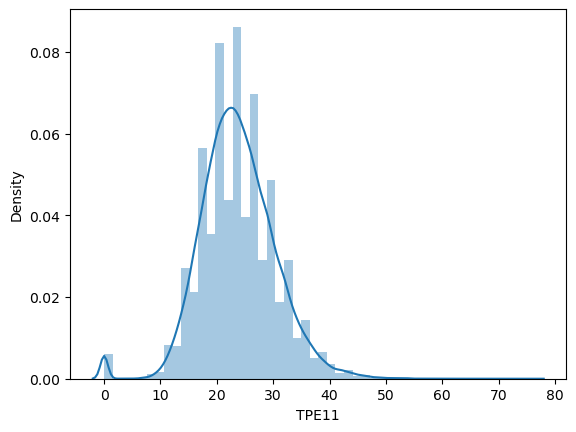

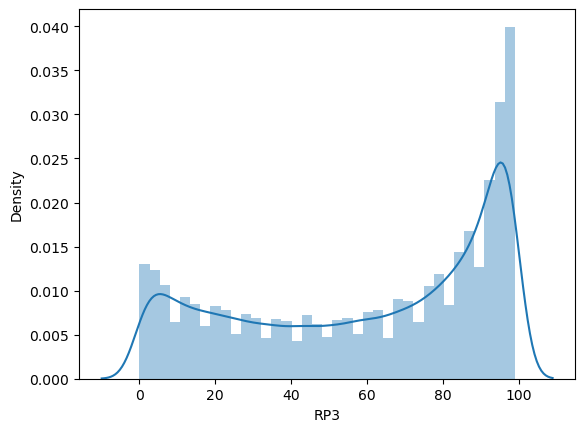

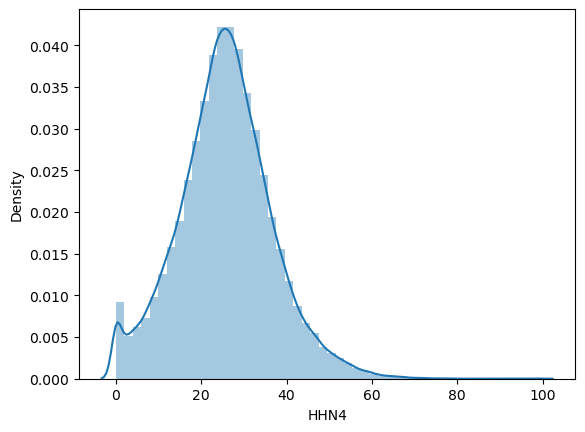

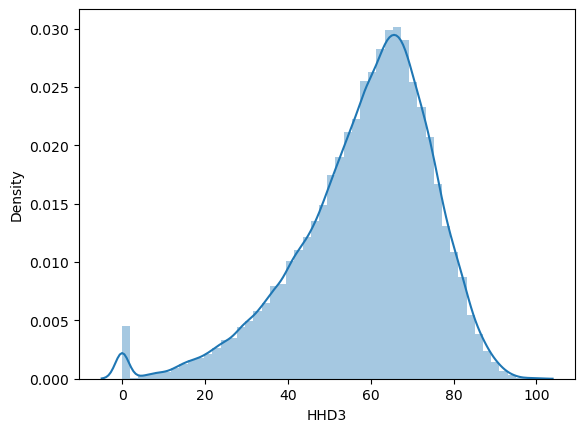

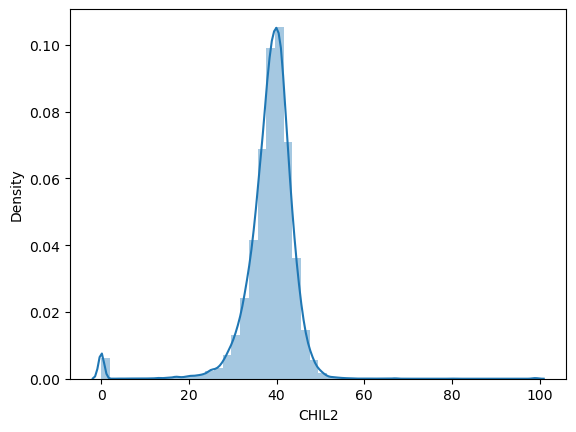

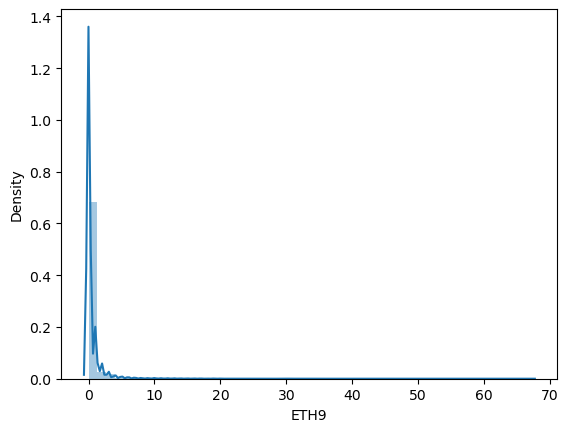

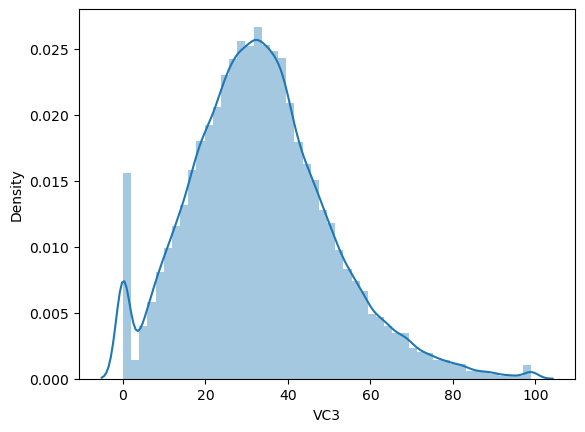

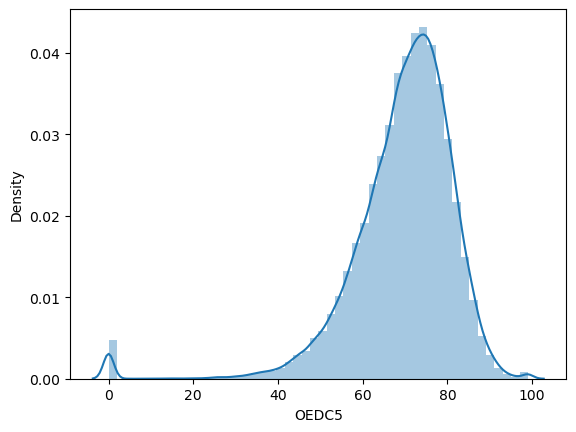

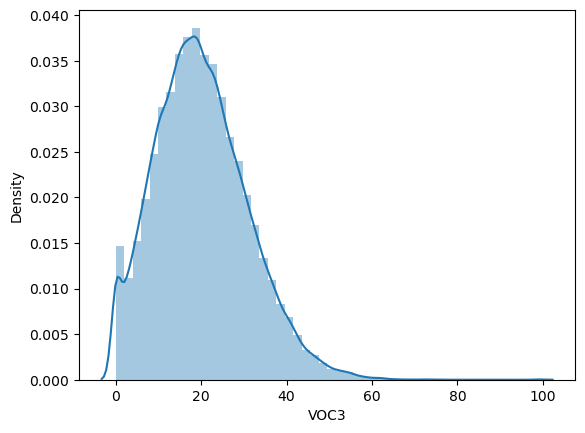

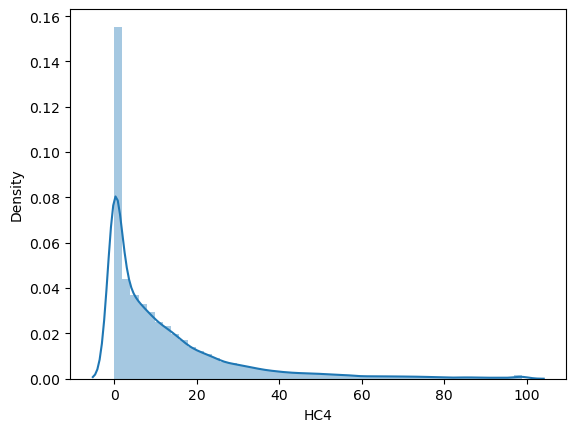

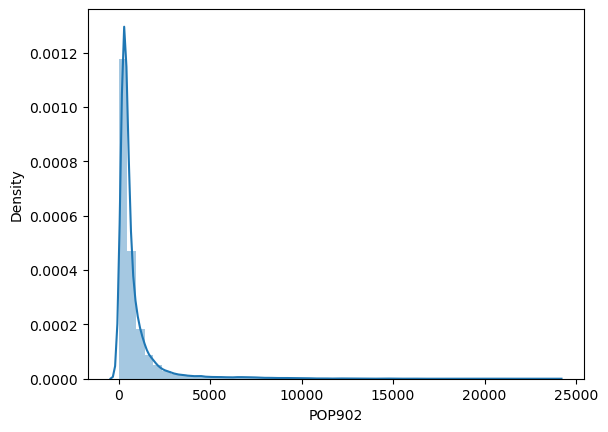

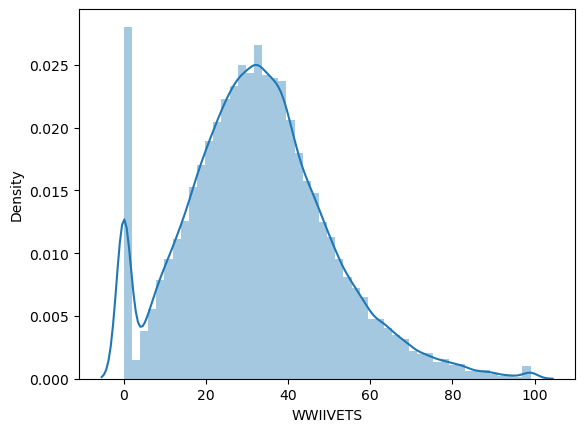

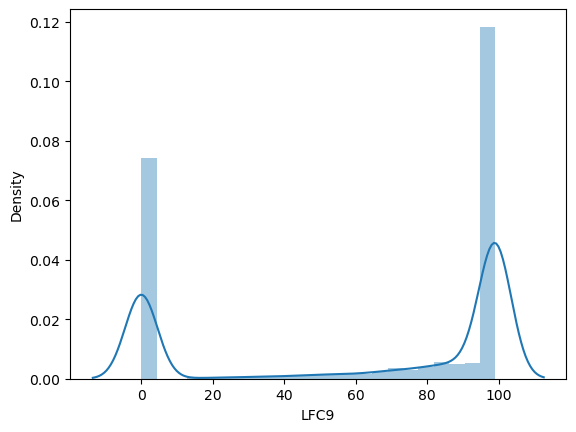

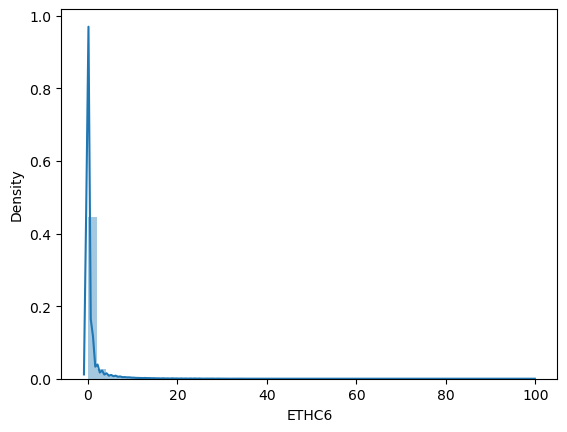

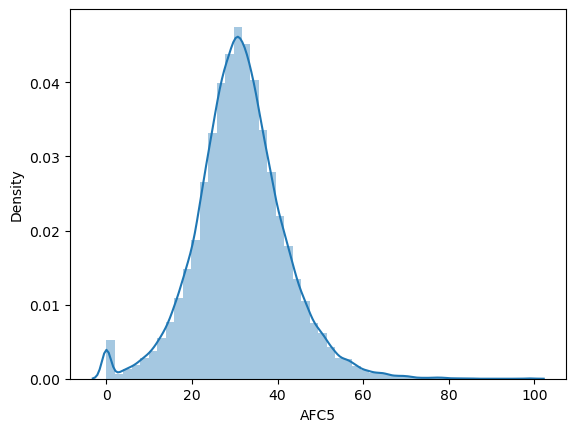

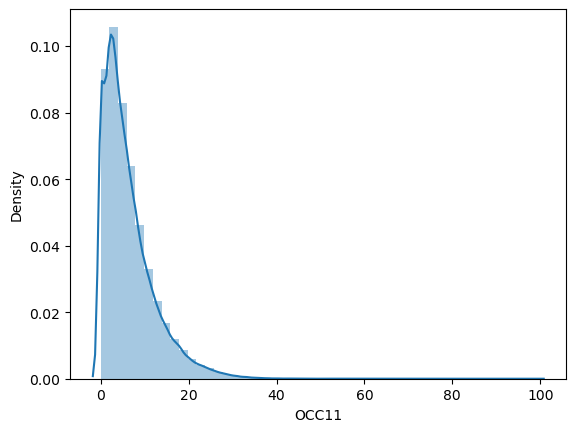

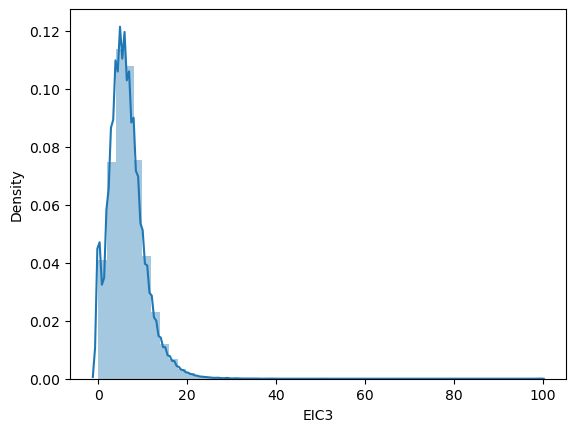

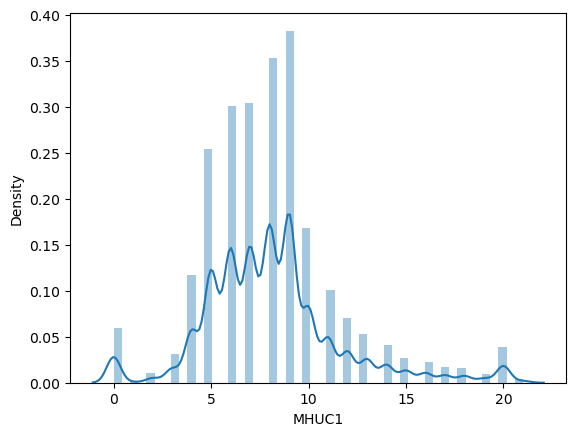

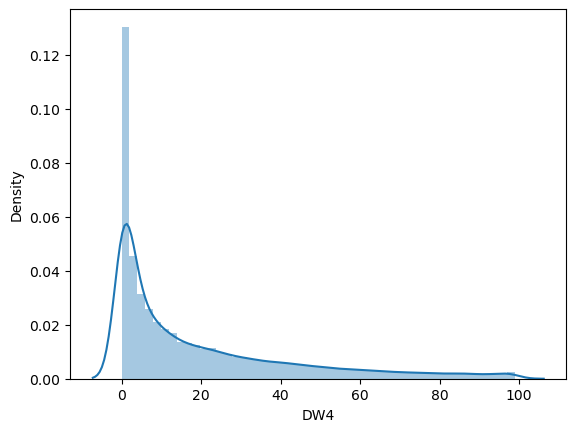

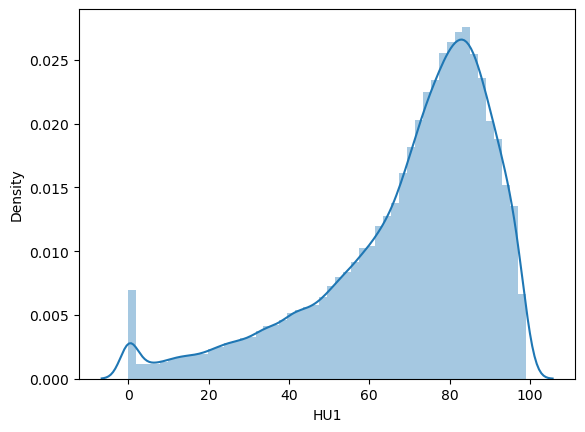

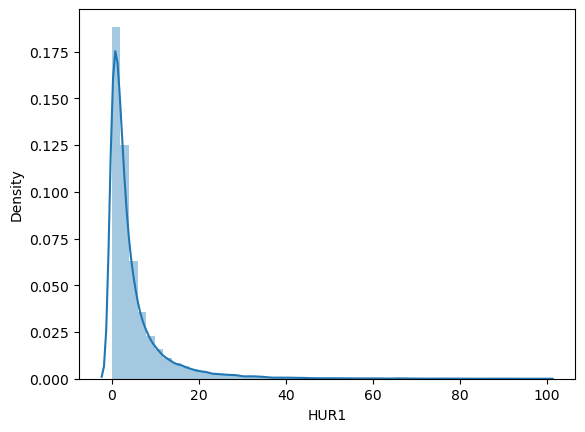

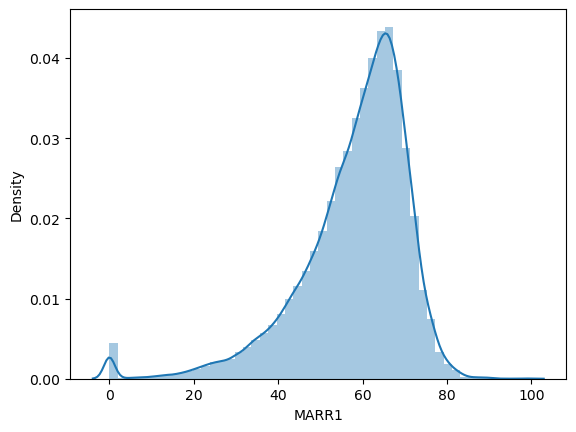

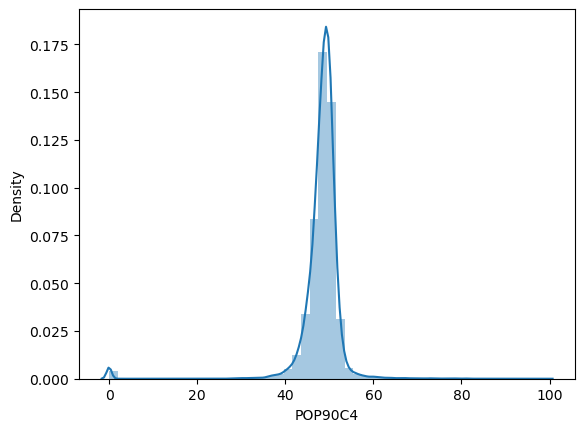

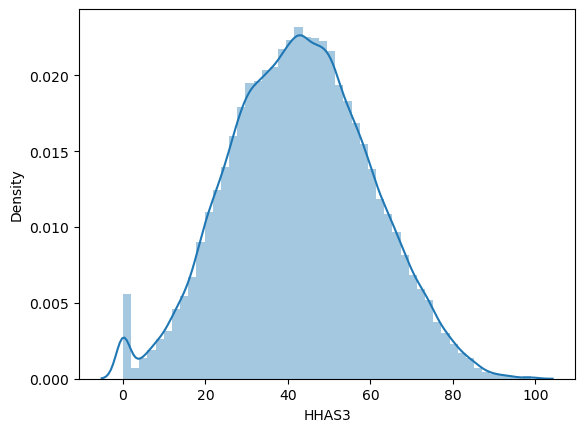

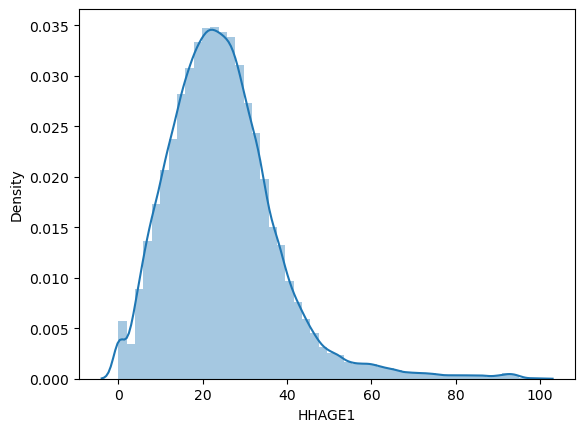

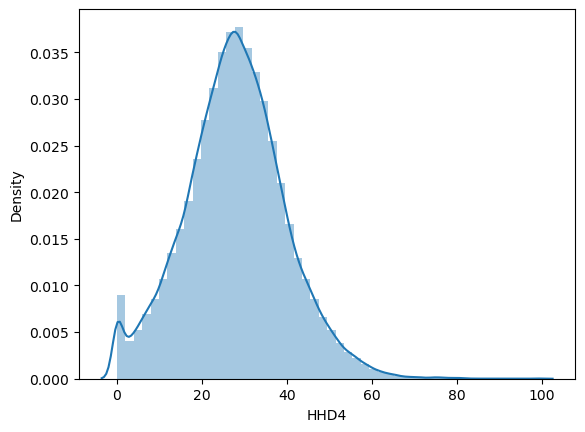

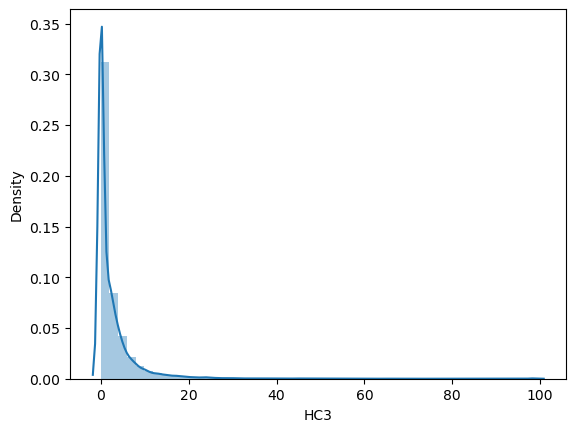

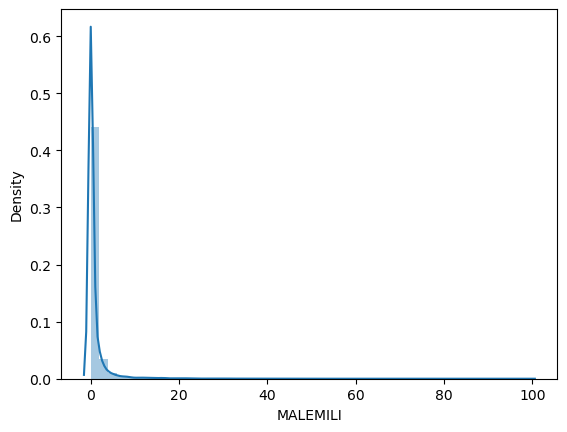

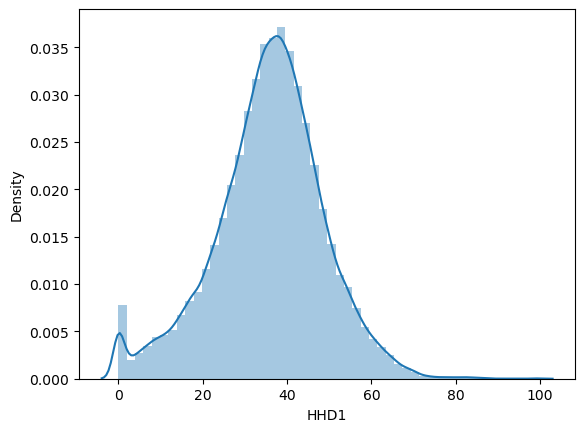

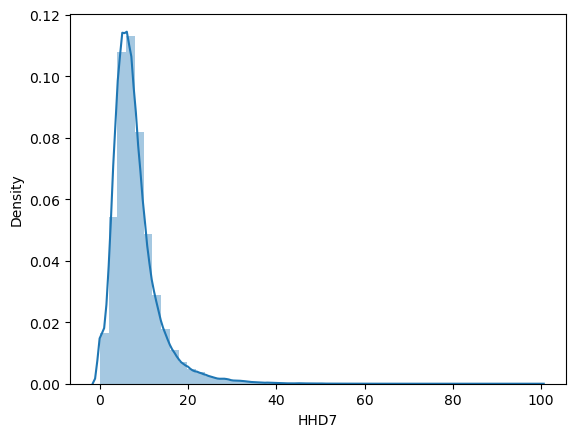

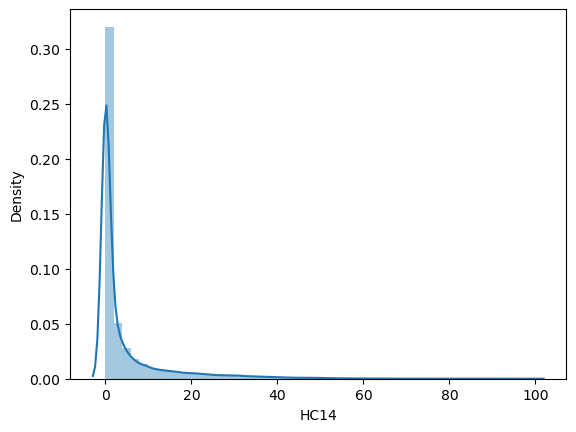

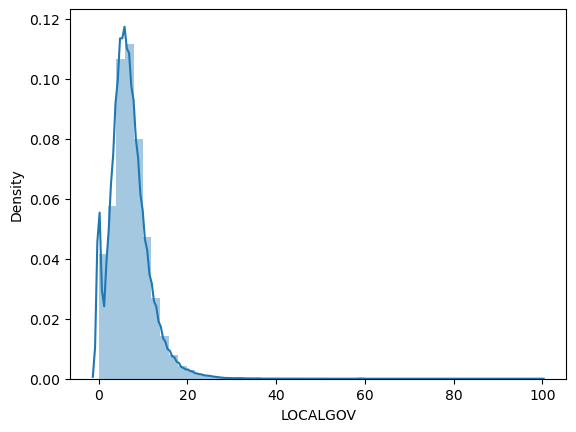

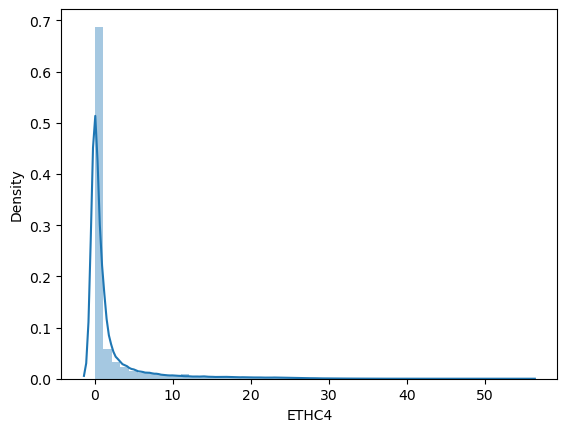

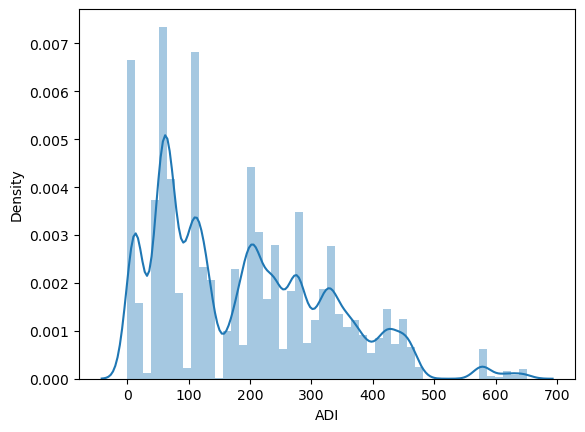

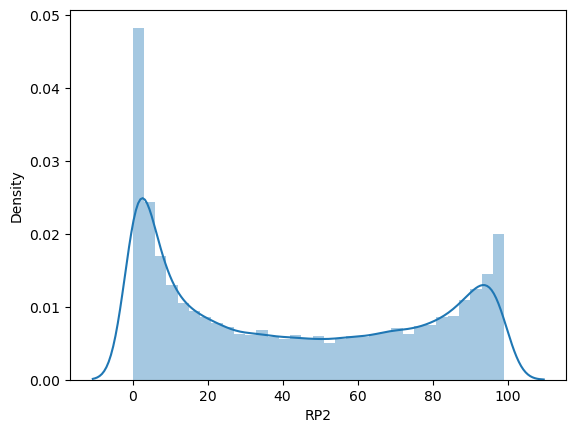

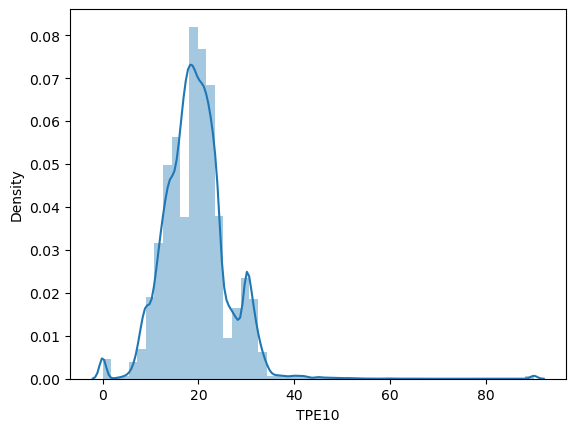

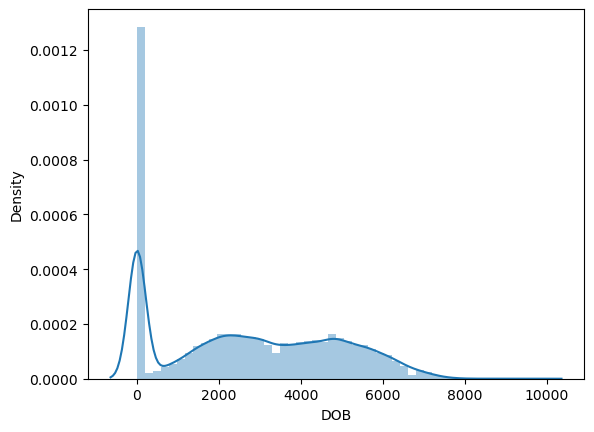

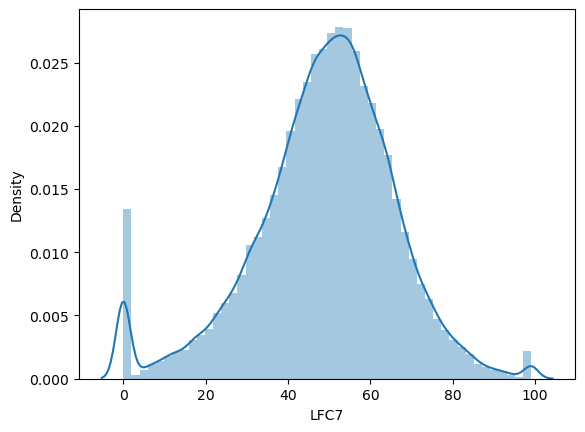

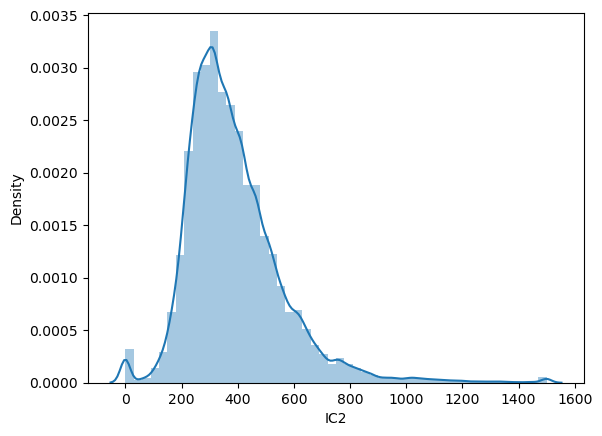

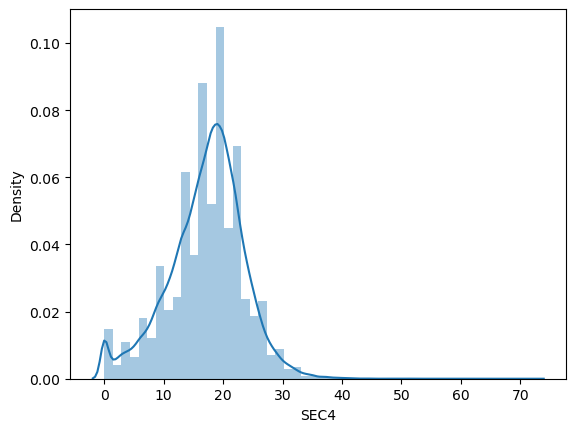

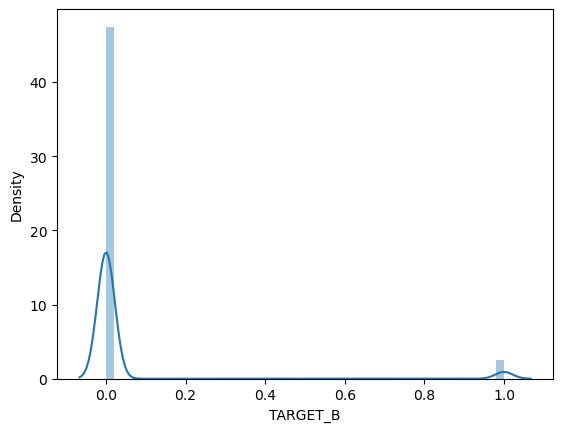

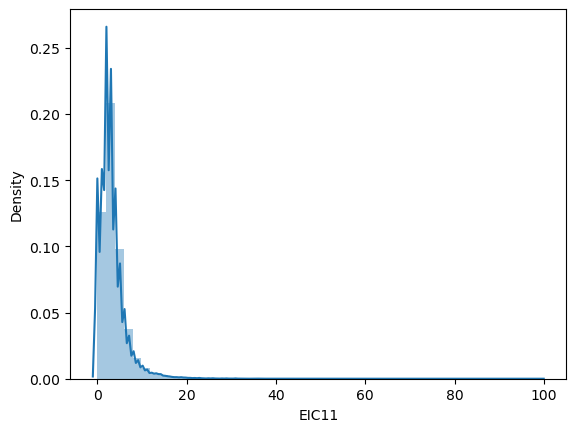

In [64]:
#plotting the numerical variables from o check the distribution of each columns
for col in data_no_nulls.columns:
  sns.distplot(data[col])
  plt.show()

In [62]:
#Check for correlations between columns
df_corr = data_no_nulls.corr().drop(["TARGET_D", "TARGET_B"], axis = 1)
df_corr

HC7    POP903      HHP2      LFC1      OCC9      IC23  \
HC7       1.000000  0.091458  0.242710  0.209718 -0.029045  0.055197   
POP903    0.091458  1.000000 -0.005805  0.029848 -0.021085 -0.008009   
HHP2      0.242710 -0.005805  1.000000  0.480673  0.108264 -0.023235   
LFC1      0.209718  0.029848  0.480673  1.000000 -0.102938  0.023833   
OCC9     -0.029045 -0.021085  0.108264 -0.102938  1.000000 -0.102608   
...            ...       ...       ...       ...       ...       ...   
LFC7      0.180430 -0.011340  0.233989  0.419575  0.035076  0.000874   
IC2       0.244580 -0.025499  0.203059  0.357444 -0.248143  0.730158   
SEC4      0.148216 -0.000935  0.746550  0.347725  0.173428 -0.114911   
TARGET_B  0.010363 -0.002481 -0.005332  0.001437  0.003319  0.014821   
EIC11    -0.012126  0.023571 -0.059680 -0.066767 -0.018026 -0.012525   

              OCC4      HHD9      SEC1     HHD11  ...  LOCALGOV     ETHC4  \
HC7       0.264612 -0.184285 -0.043066 -0.349860  ... -0.066803 -0.121231   
POP903    0.036201  0.035435 -0.002518  0.047604  ... -0.031204  0.024656   
HHP2     -0.032462  0.252572  0.074372 -0.585165  ...  0.079636  0.135594   
LFC1      0.100820  0.056346  0.194928 -0.224062  ... -0.041925 -0.022753   
OCC9     -0.248309 -0.051412 -0.177671 -0.133694  ...  0.041986 -0.050941   
...            ...       ...       ...       ...  ...       ...       ...   
LFC7      0.091405 -0.312494  0.098904 -0.185493  ...  0.020132 -0.252460   
IC2       0.402190 -0.382849  0.402135 -0.172220  ... -0.051273 -0.240315   
SEC4     -0.158239  0.368378 -0.035081 -0.499544  ...  0.093564  0.219205   
TARGET_B  0.013729 -0.021762 -0.001020  0.001772  ... -0.007104 -0.019885   
EIC11     0.000262  0.130566 -0.069065  0.150226  ... -0.025255  0.107489   

               ADI       RP2     TPE10       DOB      LFC7       IC2  \
HC7       0.148838  0.237565  0.223851  0.055458  0.180430  0.244580   
POP903    0.001991  0.028903  0.028782 -0.041590 -0.011340 -0.025499   
HHP2     -0.059357  0.112145  0.333656  0.133816  0.233989  0.203059   
LFC1     -0.115763  0.311687  0.224298  0.140044  0.419575  0.357444   
OCC9      0.148215 -0.331593 -0.160294 -0.057888  0.035076 -0.248143   
...            ...       ...       ...       ...       ...       ...   
LFC7      0.015318  0.100918  0.015999  0.055580  1.000000  0.270863   
IC2      -0.282159  0.603468  0.235341  0.077739  0.270863  1.000000   
SEC4      0.087355 -0.156368  0.133083  0.097456  0.142331 -0.029769   
TARGET_B -0.008455  0.019928  0.000321 -0.001703  0.007210  0.019828   
EIC11     0.107895  0.004026 -0.064525 -0.042434 -0.110299 -0.121549   

              SEC4     EIC11  
HC7       0.148216 -0.012126  
POP903   -0.000935  0.023571  
HHP2      0.746550 -0.059680  
LFC1      0.347725 -0.066767  
OCC9      0.173428 -0.018026  
...            ...       ...  
LFC7      0.142331 -0.110299  
IC2      -0.029769 -0.121549  
SEC4      1.000000 -0.078540  
TARGET_B -0.010906 -0.002176  
EIC11    -0.078540  1.000000  

[326 rows x 324 columns]

In [ ]:
plt.figure(figsize=(16, 12))
sns.heatmap(data_no_nulls, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap for 326 Columns")
plt.show()


In [ ]:
#there are no correlation abouve 0.9. We do not drop any columns